[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


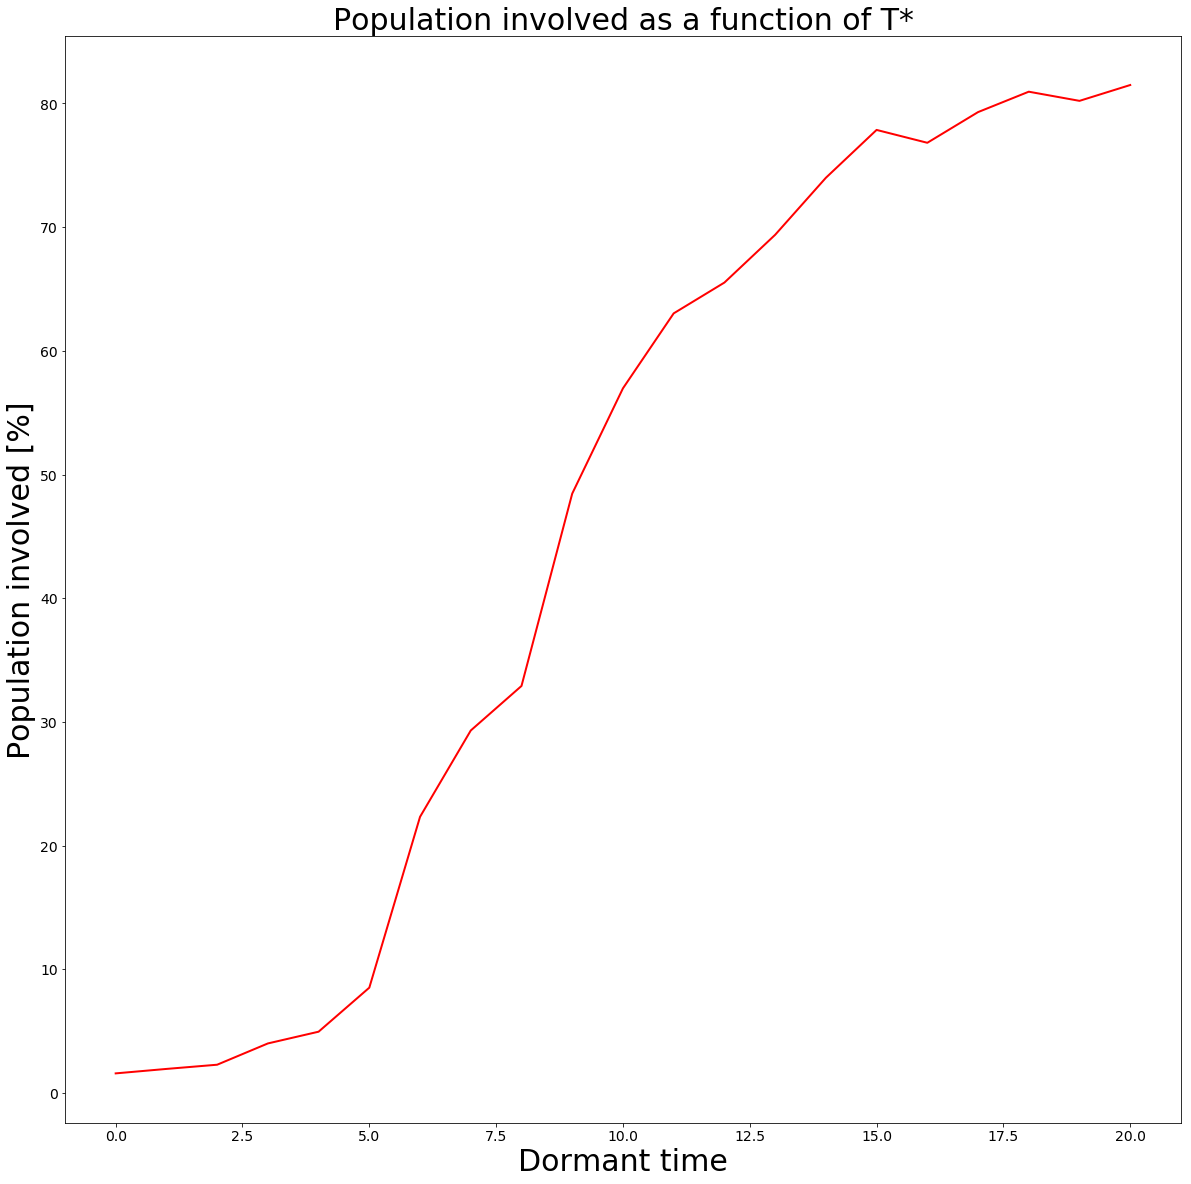

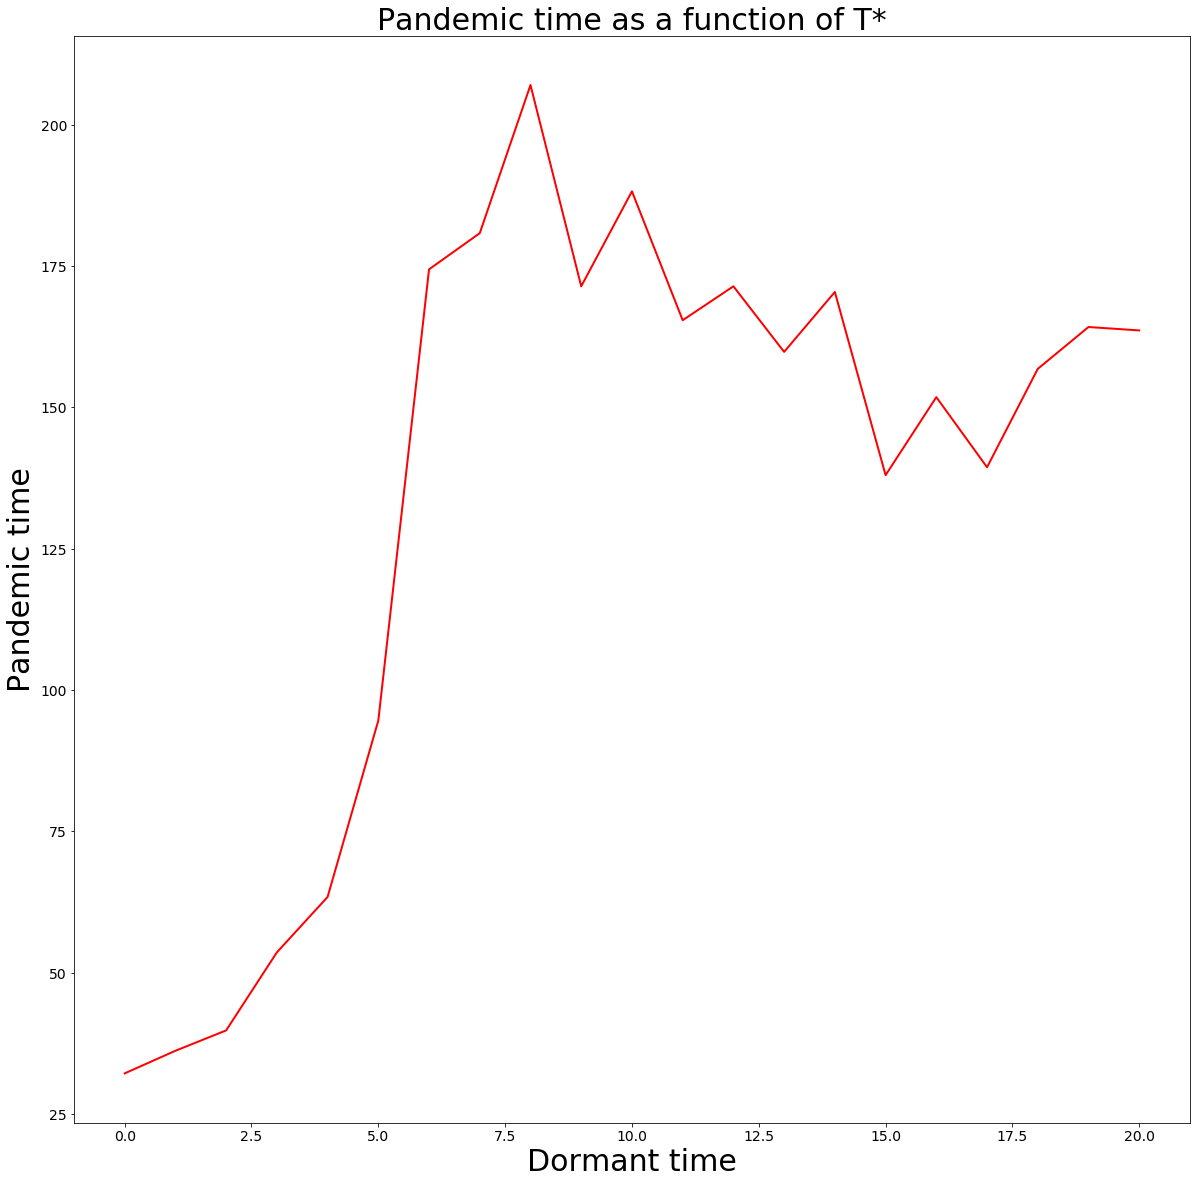

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import os 



N=2000
M=5000
#Tstar=2
T=20
init_infected=0.01
prob_severance=0.4
prob_inf=0.025
#prob_rec=0.05
prob_death=0.01
small_m=2 #the n

def initialize():
    global g, nextg, pos_fix, ever_infected, total_deceased
    g = nx.gnm_random_graph(N,M)
    #g=nx.barabasi_albert_graph(N,small_m)
    pos_fix = nx.spring_layout(g,k=0.5) #always plot at the same positions
    infected=random.sample(range(N),int(init_infected*N))
    ever_infected= len(infected)
    for i in list(g.nodes()):
        g.nodes[i]["state"] = "susceptible"
    for i in infected:
        g.nodes[i]["state"]= "infected"
        g.nodes[i]["time_to_recover"] =T
        #print(g.nodes[i]["time_to_recover"])
    #for i in [123,51,93,1,2,3,5,6,7,8,10,11,12,13]:
        #g.node[i]["state"]="recovered" #maybe implement that some people are immune already & implement dying?
    nextg = g.copy()
    
    
def observe_nodes():
    global g, nextg, pos_fix, ever_infected, total_deceased, counter
    plt.close()
    fig= plt.figure(figsize=(25,25)) # draw_networkx_nodes versus nx.draw
    infected_nodes=[i for i,node in g.nodes(data=True) if node["state"]=="infected" and node["time_to_recover"]<T-Tstar] #g.nodes(data=True) returns a list of tuples of nodes along with their data
    dormant_nodes=[i for i,node in g.nodes(data=True) if node["state"]=="infected" and node["time_to_recover"]>=T-Tstar] #so it returns (n,dict_{n}(data)), in which we can have access to the node and its attributes
    recovered_nodes=[i for i,node in g.nodes(data=True) if node["state"]=="recovered"]   
    susceptible_nodes=[node for node in g.nodes() if node not in infected_nodes+dormant_nodes+recovered_nodes]
    nx.draw_networkx_nodes(g,pos=pos_fix,nodelist=infected_nodes, node_color="red", node_size=[12*(g.degree(i)+5) for i in infected_nodes],label="infected nodes")   
    nx.draw_networkx_nodes(g,pos=pos_fix,nodelist=dormant_nodes, node_color="orange",node_size=[12*(g.degree(i)+5) for i in dormant_nodes], label="dormant nodes")   
    nx.draw_networkx_nodes(g,pos=pos_fix,nodelist=recovered_nodes, node_color="green",node_size=[12*(g.degree(i)+5) for i in recovered_nodes], label="recovered nodes")   
    nx.draw_networkx_nodes(g,pos=pos_fix,nodelist=susceptible_nodes, node_color="blue",node_size=[12*(g.degree(i)+5) for i in susceptible_nodes],label="susceptible nodes")   
    #nx.draw_networkx_edges(g,pos=pos_fix)
    plt.legend(scatterpoints = 1,fontsize=25, loc=1) #Instead of numpoints = 1, use scatterpoints = 1
    plt.title("Epidemic evolution - adaptive network, step "+str(counter),fontsize=30)
    
def observe():
    global g, nextg, pos_fix, ever_infected, total_deceased, counter
    plt.close()
    fig= plt.figure(figsize=(25,25)) # draw_networkx_nodes versus nx.draw
    infected_nodes=[i for i,node in g.nodes(data=True) if node["state"]=="infected" and node["time_to_recover"]<T-Tstar] #g.nodes(data=True) returns a list of tuples of nodes along with their data
    dormant_nodes=[i for i,node in g.nodes(data=True) if node["state"]=="infected" and node["time_to_recover"]>=T-Tstar] #so it returns (n,dict_{n}(data)), in which we can have access to the node and its attributes
    recovered_nodes=[i for i,node in g.nodes(data=True) if node["state"]=="recovered"]   
    susceptible_nodes=[node for node in g.nodes() if node not in infected_nodes+dormant_nodes+recovered_nodes]
    nx.draw_networkx_nodes(g,pos=pos_fix,nodelist=infected_nodes, node_color="red", node_size=[12*(g.degree(i)+5) for i in infected_nodes],label="infected nodes")   
    nx.draw_networkx_nodes(g,pos=pos_fix,nodelist=dormant_nodes, node_color="orange",node_size=[12*(g.degree(i)+5) for i in dormant_nodes], label="dormant nodes")   
    nx.draw_networkx_nodes(g,pos=pos_fix,nodelist=recovered_nodes, node_color="green",node_size=[12*(g.degree(i)+5) for i in recovered_nodes], label="recovered nodes")   
    nx.draw_networkx_nodes(g,pos=pos_fix,nodelist=susceptible_nodes, node_color="blue",node_size=[12*(g.degree(i)+5) for i in susceptible_nodes],label="susceptible nodes")   
    nx.draw_networkx_edges(g,pos=pos_fix)
    plt.legend(scatterpoints = 1,fontsize=25, loc=1) #Instead of numpoints = 1, use scatterpoints = 1
    plt.title("Epidemic evolution - adaptive network, step "+str(counter),fontsize=30)
    
def update():
    global g, nextg, ever_infected, total_deceased, prob_inf
    nextg=g.copy() #we need to declare the relation between g and nextg!
    for i in list(g.nodes()):
        if (g.nodes[i]["state"]=="infected"):
            nextg.nodes[i]["time_to_recover"]+=-1
            
            if(g.nodes[i]["time_to_recover"]==0):
                nextg.nodes[i]["state"]="recovered"
                del nextg.nodes[i]["time_to_recover"]
                continue #if they are recovered, then for this guy don't infect others, omit it

            elif(g.degree(i)>0):
                for j in g.neighbors(i):
                    if (g.nodes[j]["state"]=="susceptible"):
                        if random.random()<prob_inf:
                            nextg.nodes[j]["state"] = "infected" #if random()<prob_inf
                            nextg.nodes[j]["time_to_recover"]=T
                            ever_infected+=1
                        if (g.nodes[i]["time_to_recover"]<T-Tstar and random.random()<prob_severance ):
                            nextg.remove_edge(j,i)
          
            
            #do we want them to get well before they have any chance to infect, once the timer hits 0?
            
            #elif(random.random()<prob_death):
                #nextg.node[i]["state"]="dead"
                #total_deceased+=1
                #nextg.remove_edges_from
                #perhaps in the future, remove_node?
                
    g, nextg = nextg, g                        
                    
    
#script_dir = os.path.dirname("directory")
#results_dir = os.path.join( "Results1/")
#sample_file_name = "sample1511512"

#if not os.path.isdir(results_dir):
    #os.makedirs(results_dir)

#plt.plot([1,2,3,4])
#plt.ylabel("some numbers")
#plt.savefig(results_dir + sample_file_name)   
        
#initialize()

#counter=0
#infected_nodes = [n for n,v in g.nodes(data=True) if v["state"] == "infected"]  
#while(len(infected_nodes)>0):
#    update()
#    observe()
#    plt.savefig("evolution_adaptive_Tstar4_pinf5/with_edges/evol_adaptive_Tstar="+str(Tstar)+"_step_"+str(int(counter))+".png")
#    plt.clf()
#    plt.cla()
#    observe_nodes()
#    plt.savefig("evolution_adaptive_Tstar4_pinf5/without_edges/evol_adaptive_Tstar="+str(Tstar)+"_step_"+str(int(counter))+".png")
#    counter+=1
#    infected_nodes = [n for n,v in g.nodes(data=True) if v["state"] == "infected"]  

repetition=5
#print(np.array([1,2]))
Tstar_range=np.arange(T+1)
print(Tstar_range)
pandemic_time=np.zeros(Tstar_range.size)
total_population_involved=np.zeros(Tstar_range.size)
for i in range(Tstar_range.size):
    print(i)
    Tstar=Tstar_range[i]#    
    counter=0
    for j in range(repetition):
        initialize()
        infected_nodes=[n for n,v in g.nodes(data=True) if v["state"] == "infected"] 
    #script_dir = os.path.dirname("directory")
    #results_dir = os.path.join("Results_prob_inf_"+str(round(prob_inf,3))+"/")
    #if not os.path.isdir(results_dir):
    #    os.makedirs(results_dir)
        while(len(infected_nodes)>0):
            update()
        #observe()
        #file_name = "evol_prob_"+"_"+str(int(counter))+".png"
        #plt.savefig(results_dir+file_name) 
        #plt.close()
            counter+=1
            infected_nodes = [n for n,v in g.nodes(data=True) if v["state"] == "infected"]  
        #plt.show()
        total_population_involved[i]+=ever_infected    
    total_population_involved[i]/=repetition   
    pandemic_time[i]=counter/repetition
    

fig= plt.figure(figsize=(20,20))
plt.plot(Tstar_range,100*total_population_involved/N,color='r',linewidth=2)
plt.title("Population involved as a function of T*",fontsize=30)
plt.yticks(fontsize=14)
plt.ylabel("Population involved [%]",fontsize=30)
plt.xticks(fontsize=14)
plt.xlabel("Dormant time",fontsize=30)
plt.savefig("Pandemic_time_with_severance_pinf_0.025.png")
plt.show()

fig= plt.figure(figsize=(20,20))
plt.plot(Tstar_range,pandemic_time,color='r',linewidth=2)
plt.title("Pandemic time as a function of T*",fontsize=30)
plt.yticks(fontsize=14)
plt.ylabel("Pandemic time",fontsize=30)
plt.xticks(fontsize=14)#
plt.xlabel("Dormant time",fontsize=30)
plt.savefig("Pandemic_time_adaptive_with-severance_pinf_0.025.png")
plt.show()

#plt.clf()
#fig2=plt.figure(figsize=(20,20))
#plt.plot(probabilities,100*total_population_involved/N,color='r',linewidth=2)
#plt.title("Population involved as a function of infection probability",fontsize=30)
#plt.yticks(fontsize=14)
#plt.ylabel("Population_involved [%]",fontsize=30)
#plt.xticks(fontsize=14)
#plt.xlabel("Infection probability",fontsize=30)
#plt.savefig("Population_involved_adaptive_try1.png")
#plt.show()

    
    
          #print (selected_nodes)

      #print(random.random())
  
    #plt.savefig("try.png")
    
    #g.nodes()
    
        #fig= plt.figure(figsize=(25,25))
#nx.draw(g, node_color = ["r" if g.node[i]["state"]=="infected" else "b" for i in range(N)],
#pos = g.pos)
#g=nx.karate_club_graph()  
#positions = nx.spring_layout(g)
#nx.draw(g, positions, with_labels = True)
#plt.title("showing node names")
#plt.show()

#listtest=random.sample(range(100),k=42)
#np.sort(np.asarray(listtest))data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABGoAAARdCAYAAAAJyKQTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdd5xU1fnH8e/ZvrNLE5AqxaCogFjWKCpgjQXR2BU1orFhbzEJJupPjS2KGoK9GxEVlYgaTRB7QRbEWCiKoCJdQbaz5f7+eNiwwMzubJl77+x83q/XvIC5Z2eeHdjhzvee8xzneZ4AAAAAAAAQvLSgCwAAAAAAAIAhqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAA0CDn3L+cc6fHONbHOec55zIS8Lz3Oef+3NKP2xTN/T6dc6c45/7d0nUBAIDWxXmeF3QNAADAB865xZK6SKquc/djnudd2MzH7SNpkaRMz/OqmvNYYdaY7zNVXhMAANDyWvzKFwAACLWRnudNC7oIAAAARMfSJwAAIOfcaOfc+8658c65n51z85xzB9Y5/pZz7qwNv093zt3unFvtnPtG0ojNHqudc+5h59wy59wPzrkbnXPpmz3Pnc65tc65b5xze2+4/3vn3Mq6S6ycc485526s8+ejnHNznHPrnHMLnXOHxvh+ujvnnnfOrXLOLXLOXVzn/jLn3FZ1xu664XvJdM6lOef+5Jz7dkMtTzjn2sV4jsXOuYPq/Pk659w/NvzxnQ2/rnXOFTvnhmz4Ht+rM35v59zMDa/3TOfc3pu93jdseK2KnHP/ds51ivkXCAAAWg2CGgAAUGtPSd9I6iTpWkkv1A006jhb0hGSdpVUIOm4zY4/LqlKUr8NY34l6azNnue/kjpKmihpkqQ9Now/VdLfnXP5mz+pc+6Xkp6Q9DtJ7SUNk7Q4yrg0SVMlfSqph6QDJV3qnDvE87ylkj6UdGydLxklabLneZWSRm+47S9pW0n5kv4e5TVoyLANv7b3PC/f87wPN6txK0mvSPqb7HUYJ+kV51zHzeo6Q9LWkrIkXdmEOgAAQJIhqAEAILVM2TCTpfZ2dp1jKyXd5Xleped5z0iar81my2xwwoZx33ue95Okm2sPOOe6SDpM0qWe55V4nrdS0p2STqrz9Ys8z3vU87xqSc9I2kbS9Z7nVXie929J62WhzeZ+K+kRz/P+43lejed5P3ieNy/KuD0kdfY873rP89Z7nveNpAfr1DBR0skb6nUb7p+44dgpksZ5nveN53nFkv4o6aQENEoeIekrz/Oe9DyvyvO8pyXNkzSyzphHPc9b4HlemaRnJe3SwjUAAIAQokcNAACp5df19Kj5wdt0l4FvJXWPMq67pO83G1ert6RMScssA5FkF4bqjl9R5/dlkuR53ub3bTGjRhbovBqj9rp6S+runFtb5750Se9u+P1kSeOdc90lbSfJq3Os+2bfz7ey86UucTxvY2z+PLXP1aPOn5fX+X2por8mAACglSGoAQAAtXo451ydsKaXpJeijFsmC01UZ1yt7yVVSOqUgN2Ovpf0izjHLfI8b7toBz3PW7thm+wTJO0o6ek63/NSWdBTq5dsGdcKST03e6gSSZE6f+5a92kaqHHz56l9rtca+DoAANDKsfQJAADU2lrSxRua6h4vCzGizWB5dsO4ns65DpL+UHvA87xlkv4t6Q7nXNsNzXl/4Zwb3gL1PSzpDOfcgRset4dzboco4z6WtM4593vnXO6G5scDnXN71BkzUdJvZL1qJta5/2lJlznn+m7ok3OTpGdihE5zZMuiMp1zm/fqWSWpRtbnJppXJW3vnBvlnMtwzp0oaSdJLzf4KgAAgFaNoAYAgNQydcMuRLW3F+scmyFbCrRa0l8kHed53o9RHuNBSa/LmvXOlvTCZsd/I2t++6WkNbKlRt2aW7jneR/LmuveKelnSW9ry1kp2tD7ZqSsp8uiDd/PQ5Lq7t70kux7XeF53qd17n9E0pOyXZsWSSqXdFGMkv4sm+GzRtL/qU7g43leqew1fH9DL6C9NqvxR1lD5isk/SjpKklHeJ63uqHXAQAAtG5u06XoAAAgFTnnRks6y/O8fYOuBQAAIJUxowYAAAAAACAkCGoAAAAAAABCgqVPAAAAAAAAIcGMGgAAAAAAgJAgqAEAAAAAAAiJjPoOdurUyevTp49PpQAAAAAAALR+s2bNWu15Xudox+oNavr06aPCwsLEVAUAAAAAAJCCnHPfxjrG0icAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAgAJ98Ih19tLTbbtINN0hlZUFXBAAAgDDICLoAAABSzWefSfvua+GM50lz50pvvilNnx50ZQAAAAgaM2oAAPDZrbdK5eUW0kj2+xkzpC++CLYuAAAABI+gBgAAny1ZItXUbHpfRoa0YkUw9QAAACA8CGoAAPDZiSdKkcim99XUSHvtFUw9AAAACA+CGgAAfHb22dLIkVJOjtS2rd1eeGHL8AYAAACph2bCAAD4LCNDmjRJ+v57adkyafBgKTs76KoAAAAQBgQ1AAAEZJtt7AYAAADUYukTAAAAAABASDCjBgAANGjZMun99+33e+8tde8ebD0AAACtFUENAACIad06afRo6dVXN/bRqaiQDj9cevRRqV27QMsDAABodQhqAABAVOvXS8OGSfPmWThTUbHx2KuvSkOHSjNn0ggZAACgJdGjBgAARDV5srRw4aYBTa2KCumbb2wMAAAAWg5BDQAAiOrvf5eKi2MfLymRxo/3rx4AAIBUQFADAACiWras4THLlye+DgAAgFRCUAMAAKLq1avhMT17Jr4OAACAVEJQAwAAorr4Yik/P/bxvDzpkkv8qwcAACAVENQAAICojjpK2nlnKSdny2M5OdLAgdLRR/tfFwAAQGtGUAMAAKLKyJCmTZNGjbJgpl07u+XkSCefLE2fbmMAAADQcji9AgAAMeXmSg8/LN1xhzRzpt23xx5S+/bB1gUAANBaEdQAAIAGtW8vHXxw0FUAAAC0fix9AgAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAADAJioqpMcek/bfX9pnH+nuu6V164KuCgCA1JARdAEAAAAIj5ISC2e+/tp+L0lz5ki33y59/LHUrVuw9QEA0NoxowYAAAD/c+ON0rx5G0MaSSotlZYvly68MLi6AABIFQQ1AAAA+J8HH7SlT5urqpJeftlCGwAAkDgENQAAAPifoqLYx9LSpOJi/2oBACAVEdQAAADgf3baKfax/HypU6f4H8vzpP/8Rzr+eGn4cOn666WVK5tfIwAArRlBDQAAAP7nxhulSGTL+yMR6U9/slk18fA8afRo6eijpcmTpXfekW6+WdpuO2tODAAAoiOoAQAAwP+MGCHdcYeUlye1bWu3nBzp0kuliy+O/3GmTpWef37TpsTl5bbN97HHWpADAAC2xPbcAAAEZMECqbDQfl9QIG2/fbD1hJnnSc4FXUXqOO886Te/kd5+W6qslIYNk9q3b9xjjB+/aUhT18qV0iefSLvt1vxaAQBobQhqAADw2WefSWefLX36qZSZafdVVUk77yw99JA0cGCw9YVFYaHN7Jg61XYays6WDjhAuuoqCw4IbhIrEpEOO6zpX798eexj6enSqlVNf2wAAFozlj4BAOCjOXOkvfeWZsywZSBFRXYrK5M+/tiOffpp0FUGq7JSGjXKms8++6zNyvA8e73+9S9bmnPwwbFnayAchgyRMmJcEqyokAYN8rceAACSBUENAAA+8TzphBNib2/seRbanHhi6vbv8DzptNOkKVNsFk1NzZbHS0qk996z2R5VVcHUiYZdcYWUlbXl/Tk5FrZ17+5/TQDCp7pamjlTmjZN+vLLoKsBwoGgBgAAn8yYIS1d2vC4JUtsdk0qeu896eWXbYZRfSoqpNmzpeee86cuNF7//tILL1hvm7ZtpTZtLKQ56CDpiSeCrg5A0GpqpNtvl7p2lQ48UDruOGmPPaQddrCwHkhlBDUAQm/5cvsPe9o0WxIBJKt33rGAoSEVFTY2Ff31rzaTJh4lJdJttyW2HjTPIYdY4+Bnn5UeeED6/HPrORRt+28AqaOmxmaPXnuttHq1zSb9+Wd7/58/XzrlFOmuu4KuEggOzYQBhFZlpXTuudLEidZEVJLS0qTHH5eOPDLY2oCmqKzccilPNJ6Xmkt6amqsB01jln3NnSutWCF16ZK4utA8mZkW2AAtZdkyCwA7dJB69Qq6GjTFxIn2fh8rmC8tlcaOlQ491GbYAKmGGTUAQuvyy6VJk2x2wbp1dlu7Vjr5ZFvyACSbgQOlvLyGx0UiqbnzU1FR43dyysqSfvwxMfUACJdp06S99pL69rWd3/r3lwYMsBlbSC4339xwQ/jKSunuu/2pBwgbghoAobRunW1THK1PRVmZdNNN/tcENNeIERu3465PVlbztkVOVpGINZVsjKqq+MIvAMnt/vulo46yXl+1F3DKy6357BlnSL//fdAVIl4//yx99VXD46qqpJdeSnw9QBgR1AAIpQULou8WItmyiBkz/K0HaAkZGdI990i5ubHHRCI2Jta2xq1ZZqY0eHDjvqZ9e2mbbRJTD4BwmDtXuuyy+pfJTJgg/fvf/taFpikvl9LT4xu7fn1iawHCiqAGQCh17Fh/4+COHf2rBWhJJ55oV4YjESk/f+P9eXl2u/9+28I7Vf3+95u+LvXJzbUlkmmczQCt2rhxDW8mUFJiy2kQfh07xh/UbLttYmsBwopTGwCh1LevrT2P1q8iEpEuvND/moCWctpp0qpVtvZ+9Gi7jR9vzTFPPTXo6oJ19NE2Q6ahGUXO2Wyas87ypy4AwXnxxfgarL/7bmo2Yk82GRm2XK2hpcD5+dKVV/pTExA2zqtna4WCggKvsLDQx3IAYKO5c6V99rGeNOXldl9enrTvvtLLL6fm0hAgFaxYIQ0dKi1ZEr1PVXa27fby7rtSv37+1wfAX23aSMXFDY/LyJDWrIl/Vh6Cs2SJNGiQ9auJ9nE0M9Mu2M2eHV9vNyAZOedmeZ5XEO0YM2oAhNaOO0rz50t//KPt8nDIIbY19yuvENIArVmXLnZyfuONUrduFtC2a2cfvrbayt4TPv+ckAZIFd26xTcuO5vm4smiZ08L27fe2oK4Ws7Z3+HgwdJbbxHSIHUxowYAAIRWTY00b560dq2dzO+4I0EtkGomTJCuuip2M2HJNiAYM0a66y7/6kLzVVZKU6dKjz1ms6F697a/x733jr78HWhN6ptRQ1ADAAAAILSKiqQddpCWL7fwNpq2bW2mHbvAAUgWLH0CAAAAkJTatJHee8+Wy9RdJiNtXBL55puENABaDyYPAwAAAAi1vn2lr7+WpkyR7rlHWrbMmoqffbZ00km2IyQAtBYENQAAAABCLzNTOv54uwFAa8bSJwAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAIiYygCwCAsFu/XnrxRWnOHKlbN+nkk6XOnYOuCgAAAEBrRFADAPVYsEAaNkwqLZWKiqTcXOkPf5AeftgCGwAAAABoSSx9AoAYPE865BBp5UoLaSSprMxuv/2ttHBhsPUBAAAAaH0IagAghnfekVavtsBmc1VV0oQJ/tcEAAAAoHUjqAGAGL75JnpII0mVldIXX/hbDwAAAIDWj6AGAGLYdlvJuejHMjOlAQP8rQcAAABA60dQAwAxDB0qdeoUPazJyJDOP9//mgAAAAC0bgQ1AP6ntNR6slRXB11JOKSlSa+9Zltx5+fbfTk5dnvoIalfv2DrAwAAAND6sD03AM2YIY0da81z09Ol7Gzp3HOlP/1Jats26OqC1b+/9N130osvSnPmSN2727bcnTsHXRkAAACA1sh5sTplSiooKPAKCwt9LAeA3155RTrhBJtNU1d2ttS7tzRzJmENAAAAALQk59wsz/MKoh1j6ROQwsrLbXbI5iGNJFVUSN9+K117rf91AQAAAECqIqgBUtjzz8feflqysOahh6T16/2rCQAAAABSGUENkMI+/1wqLq5/TE2NtGqVP/UAAAAAQKojqAFSWNu2ts10fSorpbw8f+oBAAAAgFRHUAOksGOOaTio2W03qX17f+oBAAAAgFRHUAOksP79pV/9SsrJiX48EpFuvtnfmlJFYaF02mnS7rvb38Fzz9nsJQAAAACpjaAGSHFPPy0deKCUm7txdk1enoU0Dz8s7b9/sPW1Np4nnXuuNHy4NHGiNHu29J//SGeeKe28s7R6ddAVAgAAAAhSA4seALR2kYj08svSl19KzzwjrVkjDRpk23bn5wddXevz979L//jHlluiFxdLCxdKv/619N57wdQGAAAAIHjOq2dv3oKCAq+wsNDHcgCg9aqpkXr0kJYvjz0mN1f6+GNp4ED/6gIAAADgL+fcLM/zCqIdY+kTAPjkm2+kdevqH1NdLf373/7UAwAAACB8CGoAwCfV1VJaA++6NTU2DmiO0lLp/vulwYNtFtdee0mTJtGwGgAAIBnQowYAfNK3r5SeXv+Y7Gxp7739qQet06pV0pAhtsSupMTuW7pUOussafx4ado0W2IHAACAcGJGDQD4JCtLuvDC2B+S09Js9gNBDZrjpJOk777bGNLUKimxXcYuuyyYugAAABAfghoA8NE119gylLy8Te/PyZG22kp65RXJuWBqQ/JbuFD64IPYS5zKy6UnnpCKivytCwAAAPEjqAEAH2VlWbPgBx6QdttN6tBB6t1bGjtWmjtX6tcv6AqRzN5/X8poYFFzVpb06af+1AMAAIDGo0cNAPgsI0MaNcpuQEuKZzaW5zFrCwAAIMyYUQMAQCsxfLhUVVX/mOpqaddd/akHQMv4+mvpooukHXaQ+vSRCgpsZ7fi4pZ5/PJy6csvpTlzrBE5ACBYBDUAALQSvXpJBxxgu4dFk5srnXOOFIn4WxeApqmokE44QRo0yIKZ+fOlb7+VZs2SrrhC6tJFmjix6Y+/eLF0ySVS587WP234cAuC9t5beuklm4EHAPCf8+p5By4oKPAKCwt9LAcAADTH2rXSsGHSokWbXm3Pz7cPX1OnWp8aAOFWVSUdcoj04YdSWVnscZGIdO+90m9+07jHnz5dOuooC4OiNSDPy5OOPFJ68kkpPb1xjw0AaJhzbpbneQXRjjGjBgCAVqR9e7va/vDD0tChUv/+0qGHSs89J/3rX4Q0QLJ46CHpo4/qD2kkqbRUOvdcadWq+B/7s8+kkSMtzI21S1xJifTPf9qSKwCAv5hRAwAAAISI50nbbmtLk+KRmytdc430hz/EN37ECAtu41nalJ1tPXJ69ozvsQEA8WFGDQAAAJAkPvuscTNkysqk++6Lb+zSpdIbbzSu/8yECfGPBQA0H0ENAAAAECJLl0oZGY37mniDnbffljIz43/cigpbAoWGeZ40Y4b0xBN2+/BDGjIDaJpG/hcAAAAAIJGa0ksq3vCluFiqqWncY5eUNL6eVOJ50qOPSjfcIK1evemxjh2lP/7RdtxzLpj6ACQfghoAAAAgRAYNspksjbHbbvGN69Ch8bs4tW/fuPGpxPOkM86QJk+OHmgVF0uXXy69+aZtpZ7GegYAceCtAgAAAAiRzp2lww6LfwZGmzbSVVfFN/bgg2Pv9BRNJCKdfnr841PNTTfZrnr1zToqLZWmTpWuvda/ugAkN4IaAAAAIGT+/GfbzakhGRlS9+7Sr34V3+O2ayedcEL8s2pqamzGCLZUXi7deqsFMQ0pLZXuvDO+sQBAUAMAAACEzK67So89Vn9Yk5UldesmTZ/euCU1N91ky5kamrETiUi33GLLpbClyZMb3yx40qTE1AKgdSGoAQAAAELo+ONtK+3hw6WcHFviFIlIbdtKeXnSWWdJn3xiM2oao0cP6f33pS5dpPz8LY9nZlpA9Oc/S5dc0jLfS2v03nvWgyZeJSXSO+8krh4ArQfNhAEAAICQGjJEeustadEi6YMPbOlM58621CkSafrj9u8vffON9MwztnxnwQKbHRKJSKNHSxdfLG2/fUt9F61TWZk/XwMg9RDUAAAAACHXt6/dWlJuroUyo0dbL5qqqqZtDZ6q+vSx2UfxNmfOyJB6905oSQBaCZY+AQAAACkuLY2QprFOO61xW51nZtKYGUB8CGoAAAAAoJH69ZMKCuJr5JyWJg0cKO24Y+LrApD8CGoAAAAAoAmefNK2PK8vrHHOGkFPnOhfXQCSGz1qAITC6tV2ArN4sW01esopjd/FAgAAwE99+kgff2zNnVet2nIXqDZtbHvz11+3GTgAEA+CGgCBu+km6YYb7IpTWZmUnS1dc4103nnSHXfEN6UYAAAgCP36SV9/bVupjxsnzZtnO2j17y9ddpmFOJzLAGgMghoAgbrvPukvf5HKyzfeV1Fhvz7wgF2Juv76YGoDkllNjTR9ujRzprR+vc1UO+44aautgq4MAFqftDTp4IPtBgDN5TzPi3mwoKDAKyws9LEcAKmkulrq2tWWPcUSiUgrV0p5ef7VBSS7Rx6R/vQnqajIZqlVV9vPUk2NdPTR0t/+JnXqFHSVAAAAqcs5N8vzvIJox5iEByAwM2dunD0TS3q6NG2aP/UArcHvfidddJG0bJn1SqiutvtLS23m2uTJ0i67SMuXB1snAAAAoiOoARCYoqKG12x73paN+QBE9+yz0j33WCgTS2WltGKFdNhh9vMFAACAcCGoARCY/v0bnlHjedIOO/hTD5Dsrrmm/pCmVlWV9NVX0owZia8JAAAAjUNQAyAwvXpJe+5Z/6yabbaRdt/dv5qAZDV7trRkSfzjy8psVzUAAACEC0ENgEA98ojUvr31oqkrLc12fHr66WDqApLNZ581bnxNjfTJJ4mpBQAAAE1HUAMgUNtuK82ZI40aJeXk2C0rS/r1r63Z8C67BF0hkBxqmwYn+msAAACQWBlBFwAA22wjPfGE9OCD0po1Urt2Um5u0FUByaV374abc2+ub9/E1AIAAICmY0YNgNDIzpa6diWkAZpiv/3sZyhebdpIl1ySsHIAAADQRAQ1AAC0Aunp0hVXxB905uZKI0YktiYAAAA0HkENAACtxJVX2k5qDYU1eXnSK69IGSyABgAACB2CGgAAWomMDOm116QTTrBlUDk5G485J+XnS336SO+8IxUUBFYmAAAA6sG1NAAAWpHsbOmxx6RbbpEeeEB66y2posKaDZ97rjRsmIU2AAAACCfneV7MgwUFBV5hYaGP5QAAAAAAALRuzrlZnudFnePM0icAAAAAAICQIKgBAPiuulp64QVp6FCpZ09pl12k++6TSkqCrgwAAAAIFkufAAC+Wr9eOvxw6aOPNg1m8vKkzp3t/i5dgqsPAAAASDSWPgEAQuPqq6UPPthy9kxJibRkiXTsscHUBQAAAIQBQQ0AwDfl5bbEqaws+vGqKmn2bGnuXH/rAgAAAMKCoAYA4JsvvpDS4vif5913E18LAAAAEEYZQRcAAEgdzrXMGCBo69ZJr74qrVol5eZK++4r7bBD0FUhLNavl775xmYRbr211L170BUBAJIJQQ0AwDcDBkj19LCXJNXUSPvv7089QGOtWiVddZX0zDNSRoZ9IE9Pt3/XAwZIf/2rtN9+QVeJoPzwg3T33dL999u/Cefs38iAAdLvf289uOKZVQgASG38VwFEsXy5NG+eXQkD0HKys6ULL5QikejHMzOlIUOk7bbzty4gHt9/Lw0eLD31lPVZKiqSKiqk0lL7c2Gh7Wj25JNBV4ogzJgh7bSTBTXr1tm/j3Xr7Fxi1izpjDOko46y4AYAgPoQ1AB1LFgg7b231KeP9Mtf2lbB11xjV/gBtIzrr7cZM3l5m96flyf17Ss9+2wwdQH1qa6WDjhAWrlSqqyMPa6sTDr3XGnmTP9qQ/AWLpQOPtiCmVhBTEmJ9MYb0ujRvpYGAEhCBDXABitX2pX8jz6yK6RFRVJxsXTHHdKVVwZdHdB6ZGRIL70kTZ4sHXKI1K+ftNde0r33Sp9+KnXqFHSFwJZee01ascICm4aUl1sgidRx7bUWxDSkrEyaMoWd7QAA9XNePc0CCgoKvMLCQh/LAYJz3XXSrbdGX+6UkyMtXSp16OIC80AAACAASURBVOB7WQCAENhvP+ntt+Mfn50tffut1KVLwkpCSKxdK3XrFv9y6YwM6be/le67L7F1AQDCzTk3y/O8gmjHmFEDbPDyy7FPsrKybKYNACA1zZnTuPE5OdLnnyemFoTLBx/YeUK8qqrsnAMAgFgIaoANcnObdxwA0HpVVTX+a2gamxqKixvezW5zZWWJqQUA0DoQ1AAbnHXWls1Na6WnS/vs4289AIDwaOwSpqoqqUePxNSCcNlqK9uGuzHatk1MLQCA1oGgBtjg5JOlgQO3nDkTiUgPPmjbBgMAUtP558feVj6abt2kQYMSVw/CY999G7c7ZHa2dOqpiasHAJD8CGqADbKypLfesp06tt1W6tjRdqSZNk069tigqwMABOnMM+Nf3pKXJ111VeNnWSA55eTYrNx4+9Q4J40Zk9iaAADJjaAGqCMnx7biXrhQWr3atmMdMiToqgAAQevQQXrssfj6mQ0dasEOUsfVV0udOklpDZxZRyIW4nXv7k9dAIDkRFADAAAQhxNOkJ56SmrTRsrP3/RYVpaF/ccfL730kvU2Q+ro1Ml2f9pmmy3/bUj27yE3V7roIum663wvDwCQZAhqAAAA4nT00dLKldI991hvku23lwYPli69VFqwQHr8cXqaparevaX586X775d23tlm16SlWUAzerQ0c6Z0yy0siQMANMx59Sy4Ligo8AoLC30sBwAAAMnmhx+k8eOlF16wHa+GDZMuv9wCi1RVUyNVVlrzYAD+8jzpww9tFmRJiXT44dKvfx1/LynAD865WZ7nFUQ9RlADAACApnrzTWnkSAtoKirsvvR0+0B0yy3SxRcHWx+A1FJTI51yijR1qlRaaqFNfr7UtauFN506BV0hYOoLalj6BAAAgCb56SfpyCPtinVtSCNJ1dVSWZn0xz/aByMA8Mujj1qvsJKSjbv1FRdL334r/fa3wdYGxIugBgAAAE3y8MMWysRSVibdfLN/9QDAuHE2k2ZzlZXS669La9b4XxPQWAQ1AAAAaJKXX7YwJhbPk95+2796AGDZstjHsrKsITwQdgQ1AAAASBh2OQLgp+23j32sqkrq0cO/WoCmIqgBAABAk4wcKUUisY87Jw0f7l89AHD11dHfl3JzpdNOs8bCQNgR1AAAAKBJzjxTSqvnbDI31xoKA4BfRo60sCY72wKb7Gx7Lxo+XLr77qCrA+KTEXQBAAAASE5bbWVb4I4caY06a3d+ysiQMjOl226T9tor2BoBpJ6xY22Hp5desj5a++8vDRoUdFVA/AhqAAAA0GT77SfNny9NmCA9/7wFNsOHS5dfLg0cGHR1AFJVly7S2WcHXQXQNM6r3Vw+ioKCAq+wsNDHcgAAQBCqq+2qYyRS/1IWAAAANJ9zbpbneQXRjnEqBgBAClu0SBo9WsrLkzp0kNq2lS68UFqxIujKAAAAUhNBDQAAKerLL6Vdd5X+8Q/rLVJVJZWUSA88IA0eLC1ZEnSFAAAAqYegBgCAFHXiidK6dbbsqa7KSmn1aumss4KpCwAAIJUR1AAAkILmzJG++UaK1aquulp6+21p6VJ/6wIAAEh1BDUAAKSgzz5ruGlwdrY0b54/9QAAAMAQ1AAAkILy8iTn6h9TU2O7QAEAAMA/GUEXAAAA/HfQQdY8uD6ZmVJB1E0jEQ/Pk955R3rpJam4WNphB+m006ROnYKuDAAAhBlBDQAAKahtW+n886V775VKS7c8HolI11wjZXCm0CRz50ojR0rLl9vr63lSbq40dqw0Zox0++0NLz2DKSmxHcoqK6XevaUePYKuCACAxOIUAQCAFHXrrdJJJ0k5OTZ7RrK+NDk50iWXSBdfHGx9yWrRImnvva1Zc0nJxobNZWVSebl0//3SBRcEW2My+P576ZxzpM6dbQbY4YdL/fpJw4dLb74ZdHUAACSO82Jt9yCpoKDAKyws9LEcAADgt4ULpccfl5YskX7xC2n0aGYtNMcJJ0jPP289fmLJzZU++UTq39+/upLJ559Lw4ZJRUXRl+hFItItt0gXXeR/bQAAtATn3CzP86IuMieoAQAAaCFr1kjdu9vMmfpkZNhskQkT/KkrmZSWSn36SKtW1T8uEpGmTpUOOMCXsgAAaFH1BTUsfQIAAGghCxbY8rGGVFVJM2Ykvp5kNGmSLRNrSGmpdN11CS8HAADfEdQAAAC0kPT0jT1p4hmLLY0bZ7tkxWPmTFuyBwBAa0JQAwAA0EIGDJCqqxsel5MjHXpo4utJRt9/H//Y7Gxp8eKElQIAQCAIagAAAFpIbq50xhlSVlbDY8eMSXw9yagxM408L77XGgCAZEJQAwAA0IJuuMF2zYoVIEQi0m23SV27+ltXshgyRHIuvrGVldJOOyW2HgAA/EZQAwAA0ILat7feKYcfbkuc8vMtnGnTRurSRbr/fraVrs+VV0p5eQ2PS0+XRo2y1xcAgNYkI+gCAAAAWpuOHaUXX5SWL5emTbNdjLbdVtp/fymNy2T12m8/6Ze/lD74oP5tztu0ka65xreyAADwDUENAABAgnTtKp16atBVJBfnpJdeko480rYwLy3ddCetvDzrBfTGG1KvXsHVCQBAonBNBwAAAKGSl2czkaZOtd2xOnSwJU477STddZft9LTzzkFXCQBAYjCjBgAAAKHjnC0V23//oCsBAMBfzKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAgJghoAAAAAAICQIKgBAAAAAAAICYIaAAAAAACAkCCoAQAAAAAACAmCGgAAAAAAgJAgqAEAAAAAAAiJjKALAIDWYs0a6cknpdmzpaws6bDDpJEjpQzeaQEAAADEiY8PANBMnifddJN0441SWppUWmr3T5pkgc3zz0vDhwdbIwCgaTxPevdd6Y03pPJyacAA6fjjpdzcoCsDALRWBDUA0Ex/+Yt08812Al9XUZH9evjh0vTp0p57+l8bAKDp5syRjjlGWrnSQnjPk/LzpfPPl265RbrwwqArBAC0RvSoAYBm+PFHC2pqZ9FEU1pqJ/UAgOTxxRfS0KHSokVSSYmFNJJUXGx//v3vpXHjgq0RANA6EdQAQDM88ojkXMPj5s61GwAgOVxwgQUysZSWSldfbf3JAABoSQQ1ANAMM2dKZWUNj8vMlD7/PPH1AACab/FiacaMjbNoYklLs8AeAICWRFADhNTKldL110vbbSf16CGNGCG9+WbDJ43wV2Zm/GPZ/QkAksOcOdYMviGlpdJ77yW+HgBAauFjAxBCc+ZI++0nVVRsbFC7dKn09tvS6NHS+PHxLbdB4h16qPTSS9azoD4VFdJee/lTE2KrqpJ++knKyZHatg26GgBhldaIS5mNGQsAQDz4rwUImcpK6Ve/kn7+ectdhEpKpMcek55+OpDSEMXxxzd8kp6eLh18sNStmz81YUvff2+7s7RvL/XuLXXqJA0ebFuoM0sNwOYKCqT16xsel5cnHXRQ4usBAKQWghogZKZMqb/nSUmJdOON/tWD+uXkSBMnSrm50Y9nZEhbbSXdd5+/dWGj//5XGjRIeuAB+/kpL7dA9L//lc46Szr9dMIaAJvq3l3af/+Gg3jPk0491Z+aAMRWU2ONvePpGwgkA4IaIGT+85+Gl9HMn29LaRAOI0ZIL79s/YTy8qT8fKlNGwtxDjxQmj3b+gzBf+vX29Xun3+2cGZzJSXS889LEyb4XxuAcLvnHqldu9hhTSQi3Xuvvd8DCMYPP0iXXmo/q1272s/jL38pvfgiF2GQ3OhRA4QMvWeS0wEHWIA2a5Ztw52RIQ0dKvXsGXRlqe2FFxq+ulZaKt18s3T++fSaALBRnz5SYaE0apTNwJPsqn1Wls2inDBBOu64QEtEiFRWWs+6J56QfvzRltiOHi0dcQSbCSTKf/8rDR9uF13qXoyZOVM67TT72b3/fs6tkZx42wBC5rDDrAdNUVHsMQMHStnZ/tWE+DhnfQ0KCoKuBLUefbThGWqStG6dbZ++886JrwlAuKxeLd19t/Tgg9LatVLnztJFF1l4u+220kcfSfPm2c6L69dLO+5oM/UIdlHrrbekY4+1sKDu+dv06Xa+NmWKtM8+gZXXKlVUWP+/tWujHy8pkZ56ys7JzjnH39qAluC8euaEFRQUeIWFhT6WA6CqypqdLlsWfcpmXp70+ON2QgCgfnvsYVfEG9KunTR1qs2CApA6vvvOlkmsXbvpkuLcXJsROWOG1KFDcPW1tLIy6dlnbVnXihXWQ+3ss232QX5+0NUlp/fekw45xGZnxhKJWGiz557+1dXaPf20BTANXYzp1UtavJhZNQgn59wsz/OiXuLlWgAQMhkZ0htv2MlTJLLx/rQ0+/PFFxPSAPHq1Su+cevXsytXLDNnSiedZK9l585S37422+Crr4KuDGi+44+3GTWb930rK5O+/VY699xg6kqE+fPt5/fCC6WPP7bv75NPpN/9zn6+Z80KusLk43m2vKa+kEay46ecQs+UlvTII/HNmP3xR+nLLxNfD9DSCGqAENphB2nhQuubseuuUv/+9kHpnXekm24KujogeZx/fnxXifv1sxs2+vpracAAab/9pOeesy3OV6+2K5P332/LxA46SPrpp6ArBZpm7lzps8+k6urox9evt54jq1f7W1cirFkj7buvtHLllh9uS0rs+IEHWmNWxO/NN+21i8fy5dKHHya2nlTy44/xjcvIsA0FgGRDUAOEVLt2Nntm9mxbG//UU9LuuwddFRCd59kHnnfeseZ+NTVBV2QOOMB6TGRmxh4TiVgoio3mzrV1/fPm2ZXgzf8+Kyttm/N337X3pXhPmIEwKSyU0tPrH5OTY+9tfikqslkuc+e27PvoQw9ZIFPfjI6yMumuu1ruOVPBP/8Z36wOyd5LX345sfWkksbMmO3aNbG1AIlAUAMAaLLKSjux79lTGjJEOvJIa5jYs6d0++12ghQk52zL+1/8YsuZNZmZ1ofitttsi3WY8nJp//2twXJDHxTXr5eWLpVGjvSnNqAlZWU13LfC82xcoq1dK515ptSli81i22MPex996KGWWS4zfnzDO+CtXy898EDznyuVNGamhucxs6MlnXdefDNmt9vOLtgAyYZdnwAATVJRYQ0UZ87ccn1+cbF0zTW2PfYbb1ggEpStt5Y+/VR6/nnpjjts6U5WlvTrX0uXXGJLC7HRc881fOW9rvXr7fWdPVvabbfE1ga0pAMO2HRL32g8L/E7+RUVWZPZxYvt56k2UCkpsfeob7+Vbrihec+xcmV844qLrQY/wqnWoGdPW1pTVdXw2MxMqUePxNeUKn71K3v9v/469uufm0vLACQvZtQAAJrkggusIWWsJoplZTaF/6yz/K0rmqws6eSTbanD6tU2C+Seewhporn11vin8teqqJDGjUtMPUCidO4snXhi7CA5EpEuv9y2V06ku++23aeizUAsLbXZiYsXN+85cnLiG+dc/UtFsanTTov/9UpPt/+H0DLS0mwnrV69bEfUujIy7Of61luZMYvkRVADAGi0H3+0vkkNTaUvL7dZNStW+FMXmufHH5u2m1N1Nb0XkJzuu08aOtQ+6NUug0pPt5DmuONsZmCijR9v75Wx1NRIDz7YvOc45hj78Fof52yWJNsYx69/f5tJ2NBrm5lpy4L79vWnrlTRrZv0xRfShAnSoEHW37FzZ1tGOGuW7VAIJCuWPgEAGu3pp+1qVrwef1y66qrE1YOWsWaNzT5qSm+hkpKWrwfJr7LSGq5OnmxBYMeOtiX2kUeGY+ZGTo702mvSBx/YbmZLllhPizFjpF12Sfzze560alX9Y9avb/72wldcIU2aVP8Sndxc6Q9/aN7zpKJnn7Wm6qtXR399MzNtCe7Eif7XlgpycqTTT7cb0JoQ1AAAGq12N6B4lJfbeIRfTk7Td5oJw4duhMtTT0kXXmgzroqKNt7/6qs2A+Hvf5dGjQquvlrO2WyHffYJ5rkjkfqDzrS05u9aM2CANX6/7LLo792RiDR2rM0uQuN0727LfMeMsdAvPd0CyqwsC25GjJDuvddmegBAvAhqAACNFm+/g1qJ7vGAltG1a8NT+GOh3w/quuce6Xe/ix4K1IY2Z59tu+CMGeNvbWFzyinSI4/U3xD1zDOb/zznnCNtv7107bXSjBkbZ8/tvLN03XXS4Yc3/zlSVdeu0osv2jLfV16xXbw6dJCOOIKABkDTOK+ebR0KCgq8wsJCH8sBACSDKVOk3/xm06vksbRpY/0VTjwx8XWh+a66ypqbNmb5U5s2tmyERpmQrGfEHns03MNKshCisFDaaafE1xVWixfbMqtoWzfn5EjDhkmvv96yz7l6td222sqW5QAA/Oecm+V5XtS9BWkmDABotCOOiH+pS1qadPTRia0HLefCCxvXf0iy8ccck5h6kHzGjYs/6KustCU5qaxPH+ndd6Vtt7WmxtnZthQpJ8d6+UyZ0vLP2amTtMMOhDQAEFYENQCARsvIkP72N/swUZ9IxD60ZWX5Uxear1cv29K0ob/bWrm51iiW5W2QLKB5+mnrSxOPqirpH/+wwCaVDRokff219Ti57Tbpzjvtz888E3v7cABA60WPGgBAk5xyirRunXT55daAtu4V9Kwsm2Vx000t01sB/rr4Yvs7HTvWPkBH652RnW2B3TPPSAcd5H+NCKfVqxv/NZ5nO0I1t2FusnNO2ndfuwEAUhszagAATTZmjDR/vnTppbbzRX6+1K2bdNFF0ty50iWXBF0hmurSS613yOjRdkW/bVupXTvrR9OunQV08+bZjiZArbQ0C16a8nUAAMDQTBgAANSruFhasMC2EG7b1hq/sh03oqmqsga18TQar9WmjbRmjW1rDABAqqivmTBLnwAAQL3y86Xddgu6CiSDjAzbBnr8+PgaCmdlSeedR0gDAEBdTDQFAABAi7noIgts4pGZaTuNAQCAjQhqAB9VV0sLF9pODtGacwIAkOx695YmTWp4t6LcXBvXq5c/dQEAkCwIagAf1NRId9xhTVYHD5Z22UXq0sV2xIl3C1MAAJLFyJG21fSAAbbVe+3SpvR0+/PAgdLrr0tHHBFsnQAAhBHNhIEE8zzp1FOlKVOk0tJNj0Ui0sEHSy+8wI4XAIDWafZs6eWXpZ9+skbDI0dKu+4adFUAAASLZsJAgN56S/rnP7cMaSS7b9o06ZVX7MQVAIDWZrfdaEaN1qm4WHrqKenuu6UffrCLbjvuKP3ud3ZeF2+vJgDYHNfwgQS7667oIU2tkhJp3Dj/6gEAAEDzvPGG1L27dMUV0ty50rp10tq10ocfSqefLvXtKy1YEHSVAJIVQQ2QYHPn2vKn+nz1lT+1AAAAoHneeUc68kipqMguuG2uqMhm2AwZIn33nf/1AUh+BDVAgnXo0PCYdu0SXweaxvNs+dqIEVLbtrZLSe/e0m23ST/+GHR1AADATzU10kkn1T9bWrLzh59/lsaM8acuAK0LQQ2QYOecI+XlxT4eidgYhE9FhV0xO+II6V//sitk5eV2dey662xa89tvB10lAADwy7Rp1psmHtXV0vTp0rJlia0JQOtDUAMk2MknS506RW8ol5ZmszRGj/a9LMRh1Chbg15SsuXytbIyC25GjJD++99g6gMAAP56+GH7/z9ezkmTJyeuHgCtE0ENkGCRiPTBB9KgQfb7zEwLbfLybGeADz9k6VMYzZkjvfaaBTL1KSmR/vAHf2oCAADB+uGHxo0vK5NWrEhMLQBaLzaNA3zQvbs0e7ZUWCi9+aatbx4+XNpzT7vSgvC5805b+hSPN9+Uli61v2cAwZkzR5o/32bA9esn7b4777EAWlYk0rjx6emN/xoAIKgBfFRQYDeE37vv2tryeGRnWxBHUAP4z/OkSZOk66+3/lHp6XZ/TY3Utat09dW2vJTABkBLOPRQ6f33G24mXCsnRxo6NLE1AWh9WPoEAFHEG9JI9kGxqipxtQCIzvOk88+Xzj5bmjfPPjgVFW3cMnfhQumii6TTT7fgBgCa64wzGvd+0qmTtO++iasHQOtEUAMAUWy/ffxjq6psmQUAf40bJz35pIUysZSUSM8/bzu1AUBzdeggXXBBfMuZIhHp9tuZ0Qeg8QhqACCKSy+V8vPjG9u3rzRwYGLrAbCp9eulG26oP6SpVVpqoU68SxUAoD633SYdeaRtDBFLJCL93/9Jxx3nX10AWg+CGgCI4tBDpS5dNva7iCUSsQ+LAPw1ZUrjlzNNmpSYWgCklrQ0aeJE6b77bAfPSMR28GzXznrSDB8uTZ0qXXll0JUmj9Wrpb/+VTrmGOmEE6SHHooviAdaK5oJA0AU6em2m9OQIXbyEG0HqEhEGjtWOvpo/+sDUt2771ovmniVlEjTp0tnnpm4mgCkDuekU0+12xdfSIsXSxkZ0g47SL17B11d8vA86ZZbrCG8c7aduSS9+qrNbn7kEQtugFRDUAMAMWyzjfTpp7a+/N577ep9WpqFNgUF0jXXSAcfHHSVQGpqypXW2g8AANCSBgywGxrvjjukG2+Uyss3vb/2Pf6MM2yJ2YgR/tcGBImgBgDq0bGjdPPNts58/nwLaXr0kLp1C7oyILX17i1lZkqVlfGNT0/nKjcAhElRkV30qi9ELy213f0WL6YpM1ILPWoAIA5ZWdKgQTaThpAGCN4ppzTcQ6qu7GzbphsAEA5PP20zlRvy00/Se+8lvh4gTAhqAABA0unXT9p99/hO8p2z8YMHJ74uAEB8Pv00vmWsNTXSl18mvh4gTFj6lER++EH6xz+kpUulX/5SOvZY6ywPAEA8KiqkRYuk6mrrwdS2bdAVNc8TT1hY8/PP1pAylvx8dnwCgLCJ93OMczazGUglzKhJEg88YFcDr71W+tvfpPPOs7X2CxYEXRkAIOyWLrXdMzp1sqB/yBDbfv7446U5c4Kurum23Vb66COpZ0+pTZstj7dpY9/ne+/ZFroAgPA4+GAL0htSXS3tt1/CywFCxXn1XIIqKCjwCgsLfSwH0Xz+uZ1Yb95oyzk7Sf3qK5prAQCi+/xzadgwm16+fv2mx9LS7Irm449Lxx0XTH0tobpaev1126Ft/ny77xe/kC6/XDriCNsyFwAQLjU1Nrtz6dLYY9LTpX33ld56y7eyAN8452Z5nlcQ7RinLklg/PgtT64lm+a9YoX04YfS3nv7XxcAINyKiqT995fWrIl+vKbGdtQ4/XSbtbnLLv7W11LS06XDD7cbgNjWr5emTpXmzrULgJ06SUcdZRf+AL+lpUkvvCAdeGD0XjXp6VKHDrbMFUg1BDVJYN48u1oYjXO2XR1BTSN5nrRsmX1C6do1vnmXQIqbN0966CGbxZeZactnRo+2LcwRTk88YW9zDSkvl268UZo8OfE1AfBfcbH0l79I995rAW1Jif2anS2NHWs7Gt54ozR8eNCVNt3PP1svqi++kCIR6bDDbDYhs87Dbc89bXnq+edLn3yysRdNRYV00EH2b3abbYKtEQgCS5+SwAUXWI+aqqotj+XlSdOn29IoxKGmRnrkEenmm22eZUaGvbBHHilddx1NDIAovvtOOvFE252hsnLje1FurmWep5wi3XMPjf7CqF8/aeHC+MZmZ0vLl0vt2ye2JgD+WrVKGjrULuxVVMQel5srjRtnfRCTiedJN9xgp3bp6RtnZuTlSVtvLf3zn9KgQcHWiPh8/bUt101Ls882XbsGXRGQWPUtfSKoSQLz50u77bblVdG0NKl/f7tywNWCONTU2KfNV1+N/mLm5kqvvWYLYQFIshP7ggJp7drYM/tyc23MG2/YTBuER3Z29KWz0bRpI73/Ph9ogNakvFzaYw87l6ysbHh8bq7tMHrMMYmvraWMHSvdfXfs2YNt2kiFhdL22/tbFwA0pL6ghl2fkkD//tKDD1rDx9xcu69NG9vl4tVXCWniNmFC9JBG2jgP+Igjoi+SBVLUyJHW3yRWSCNZn4PCQun66/2rC/FJa+T/8jTdBVqXiROlRYviC2kkez8/77z63/PDZMkS6c4761/iWVwsXXaZfzUBQEsgqEkSo0bZf0Z33GErdJ580qaz9+kTdGVJoqZGuuWWhps1VFXZWQ0AzZxpJ/g1NQ2PLSuL3fgcwWnM7JiaGv5PCZuff5b+9jdpu+2slVq7dtI++0hTpkRfDg3U5Xl26tPY60/l5TbBOBncd599n/XxPJvxuXy5PzUBQEsgqEkiHTtKY8ZI115rHfq58tkI/8/encdZOfD/H3+f2efMTNO+SkREUmkSZYuKEm5kz66brN2SuO0Usmf/3m6SXW5ky1L3HaLIhGRNhETrLc2+Xr8/Pvf82mbOuc7pXGd9PR+P86jmXJf5mKYz5/pcn+Xbb+0dbzBlZYyWB/7nvvssAeNWfb30xhvexYPQXX65u1npmZnSmWdurNpE7L3+utSxo3TllTa3oaxM2rBBmjdPOu00mz/044+xjhLx7KuvAq89bkpJiXT//ZGPxwvz5gWeu9MgJ8e+HgCQKEjUIDWUlLjPbG3Y4G0sQIL46it31TQNKivtghLx46ijpB13DD47KC9PmjAhOjEhuLfeko4/3opAGysELSmRli+3bSkrVkQ/PiSGX34J/6besmWRjcUrobR3htoKCgCxxEsWUsN229lVpBtdu3obC5AgwnlTyxvh+JKZaZsBu3dvvLLG75datpTefddeJhF7tbW2SS1YNVt9vc2PGjs2OnEh8YSSaI/kudF06KHuKgGrqqQ+fbyPBwAihbfUSA2dOtnqrGDy86ULL/Q+HiAB9O4d2t3YnBxLCCC+tG4tLVwoPfaY1LevbYLKyLB5NLfeau0zvXrFOko0ePVV94Nf6+qsRWrtWm9jQmLq1Cn8ocCdO0c2Fq+cdVbwGTUZGbbFqnnz6MQEAJFAogap49ZbA992ycy0iY0HJcSdcwAAIABJREFUHxy9mIA4dtFFUlaW++Ozs6XDDvMuHoQvM1M67jjbzlVZaYmAZcvs77iwMNbRYVP//Ke1NrmVni698op38SBx9e5tFXOhKiiQzj8/8vF4oVUrG7jt9zf+fEaGJavvuiu6cQHAtiJRg9RxwAHS1KmWrMnJ2fy5/Hxpt92kWbPYdw78z5572iPYfBPJ3iRfdpldNAII3++/h3Z8ZaW0Zo03sSS7L7+0ioxu3az6pHt3adw46aefYh1ZZPh80vjxTScxmpKeLh15pDcxeWH0aEtwtmtnSaacHJu7lZMjHXig9Omn9hwAJBKfE6BesKioyCkuLo5iOEAU/Pab7XOcPt2GAOy0k/S3v0nDh3OVCWxh1SqpqMh+baodw++Xhg6VXnyRGTXAtho40DbZuJWdLU2eLF1yiXcxJZvly6Vjj7VETXX15u1BWVn2OnbQQdKzzyZ+u0xpqdSzp/0/u2mD8vtt499ZZ3kfW6TV19tMru+/t38XhxwidekS66gAoGk+n2+h4zhFjT5HogYAEMjatdI550hvv21/bpjL3TCcduxY6YYbSNIAkTBxojRpkvv5936/NHeuuzFssJlMe+8trV8fOHGRlWVVNsXF4bUPxZNffpEGDJBWrw48/8jvt3XwV18dvdiQ2BzHkmOTJ0vz51uybNddrZJr5Eh3FblAKiNRAwDYZitXSk8/bRc6WVk2mHbkyK07CQGEb/VqqwJwm6jZfXfpq6+8jSlZ1NRIO+8s/fqru61GWVlWUfjhh97H5rW1a6XLL5eee86S6mVl9vG0NOsI79xZuvlm6eijYxsnEkd9vVVe/etfG7+fGuTl2USB//zH2tEANI5EDQAAQIK44ALp8cel8vLAx+XmWsvhsGFRCSvhTZ8unX22tQO55fdL779vielksGGD9Mwz0qJF9v3VoYO1gfXrF+vIkGhuvNEqaZp6ncrOtv0cM2dGNy4gkZCoAQAASBC1tdLxx0vvvLP1neoGfr90553SeedFN7ZE1revDZYNRVqadMIJltwAYKqqpDZtgm+oy8mRvvjCBnYD2FqgRA0TBQAAAOJIRoa1Ezz4oG0i8vttjXphoV34DB1qSZx4SdIsXiw98YT01FPS0qWxjqZxGzZYnKGqr5deey3y8QCJ7J133B1XVyc9+aS3sQDJKiPWAQAAAGBzaWnSaafZ46uvbCBsZqbNpOnYMdbRmQULbDXy0qUbh4nX1tpg48ces6Gi8eKPP2zmTKBhuk0pK7OhqT5f5OMCEtHq1e62iNXU2MYxAKEjUQMAABDHevSwRzyZN08aMqTx+RTz59tmpY8/toqgeJCT4+7CsjGZmSRpgE21bCmlpwc/Lj1datfO+3iAZETrEwAAAFyrr7eNb00NEXUcm10xalR04wqkdWurqAnHTjtFNhYg0Q0d6i7xmZUlnXKK9/EAyYhEDQAAAFybPTv4EFHHkb7+On5Wh6en20yf7OzQzsvPl8aP9yYmIFHl5Unnnmvzs5qSmSn16SP17Bm9uIBkQqIGABDXNmyQHnhAOvJIafhwaeJEadWqWEcFpK45c9yvuJ4719tYQnHhheG1MJ14YuRjARLd5MnSAQdY0mZLublSly7SK69EPy4gWZCoAQDErWeekTp0kCZMsM0rb74pTZok7bCDdN11dtceQHTV1ro7znHcHxsNnTvbxWWgKoBN5eZKzz5rvwLYXGam9Prr0j/+YVUzPp8NFe/UyX5Of/aZtRwCCA/DhAEAcenVV6VzzpEqKjb/eGWl/XrHHdbG8Pe/Rz82IJX17m0tQcGqajIy4q/t4eKLpepq6dpr7dfG5mxkZtrj8celESOiHiKQMNLTpZNPtkddnT3CnQUFYHM+J8DtyKKiIqe4uDiK4QAAYHfiO3eWVqwIfFxurrRypdSsWXTiAmDJ0jZtgidqOneWfv45PjcmffGFJXtfeGHj3BrHsUHJZ50lXXKJ1LVrbGMEACQ3n8+30HGcosaeo/UJABB35s6V/vwz+HFpadYeBSB6cnKkKVMCtxDl5lpLRDwmaSRpzz2lJ56wRO/MmZaweecdafVq+38jSQMAiCVanwAAcefbb+3OdjBlZXZnHEB0nXWWtTmMHWvJmLIy+3h+viVQn3xSOuyw2MboRmGhNGBArKMAAGBzJGoAAHEnK8su9tzIyfE2FgCNGz3aZlM884z08cf2b3bQIOmYY0Jfgw0AADYiUQMAiDuDBrnbFpOfLw0b5n08ABqXl2cJm9GjYx0JAADJgxk1AIC406WLNHCgbY0JpLBQOuSQ6MQEAAAARAOJGgBAXJo2TWrZsulkTX6+NGOG+xYpAAAAIBHw9hYAEJc6dZI++0w66iibd1FYaI+cHOnAA6V586SiRhcaAtGzbp300UfShx9Ky5fHOhoAAJAMmFEDAIhbHTtK//qXtHatVFxsm6B69LDWKCCWFi6Ubr5ZeuONjQOtq6qkXr2kv/9dOuKI+F1NDQAA4pvPcZwmnywqKnKKi4ujGA4AAEB8mzpVuuACqbJSauxtVF6edMop0sMPk6wBAACN8/l8Cx3HabQ+nNYnAAAAl956y5I0FRWNJ2kkqaxMeuop6dproxsbAABIDiRqAAAAXPrb3yxJE0x5uXTHHdKff3ofEwAASC4kagAAAFwoLpZ++cX98enptr0MAAAgFCRqAAAAXJgzR6qpcX98WZn06qvexQMAAJITiRoAAAAXyspCS9Q0nAMAABAKEjUAAAAutG69cRW3W+3aeRMLAABIXiRqAABIYTU10gsvSCNGSH37SgMGSOeeK335Zawjiz9/+UvTm54aU1AgnXGGZ+EAAIAklRHrAAAAQPQ5jjRlinTDDVJdnVRSsvG5BQukJ5+Udt1VeuIJqWfP2MUZT7bbTjrgAOnf/5bq64Mfn5lpCTAAAIBQUFEDAECKcRzp/POlq66S1q/fPEkjWeKmokL6/HNp332lefNiE2c8evBBq5QJJjfXklwZ3BIDAAAhIlEDAECKmTLFkgjl5cGPLSuThg2Tli/3Pq5EsPPO0ty5Ups2Un7+1s/n5trjqaekww+PfnwAACDxkagBACCFVFdL11/vLknToLJSuucez0JKOD17Sj//LN1/v7T77lJWllXOdOwoXXut9Msv0jHHxDpKwBv19dLatdLq1VZ9BwCIPBI1AACkkBkzQr+4qq6WHnnEEjbR9umn0qhRVsnSvr3Utas0cqT04YehDfaNtNxc6fTTpa++kqqqbCjzihXSFVfYdigg2axbJ910k20y2247qUsXqUUL6bLLqLgDgEjzOQHe5RQVFTnFxcVRDAcAAHhp2DDprbdCP69ZM2n6dOnQQyMfU2PmzZNGj5Z++skSIZsml3w+ye+3C8aHHpKGDo1OTECq+u47af/9bZ7VlgnbrCwpO1t6801p4MDYxAcAicjn8y10HKeoseeoqAEAIIWsXBneeQ3tDtHw8svSkCHS119bi9aWFUCOY7NzfvzRVmY/9lh04gJS0YYNtu1s7drGq+qqqy2BM2yYJVYBANuORA0AACkkOzu889LS7M651+bNk045xf0MnYoK6cILpZkzvY0LSFWPPy6VlgZvNayslO64IyohAUDSI1EDAEAK2WMPKT099PPq6qRu3SIfz5ZGj7bkSygqKqRzzrGqHwCRdddd7hKnNTWW1Kmq8jwkAEh6JGoAAEghF10UXlVN585S796Rj2dTn34afutESYn0739HNBwg5dXXhz4o+PffvYkFAFIJiRoAAFJIr162QSkUfr90+eXexLOpu+8O/258aal0222RjQcAACAWMmIdAAAAsbRokT1qaqTtt5cGDZIykvyn47Rp0n772UDeYLKzrZJm1Cjv45o/P/TV4Zv67LPIxQLAZlN16SItW+bueJ9P6tjR25gAIBVQUQMASEkzZti8lgEDpPPPly65RDr2WKl9e+mmm2yTSbLq3dtW6RYUSJmZTR+Xlyf17WvHBjouUtwkjgJxO4AYgHuXXWavBcFkZdmsqGgMHQeAZEeiBgCQcm64wTYLffWVXdyXldmjpERat0665RbpwANDH2qbSPbfX1q8WBozRsrPl5o1s18LCuyibJddpClTpHffteeiwe/ftvNzcyMTB4CNTjtNKiy06ppAcnKkSy+NTkwAkOySvLgbAIDNPf+8zTIJVH1RUWHtUKedJr3wQvRii7YuXSwZc+ut0nvvSWvW2N3wXXaR+vSJfjx77WUtFsHWADdl990jGw8AS+DOnWvJ3fXrt37tzMmxFsnZs23oOABg2/mcAO+GioqKnOLi4iiGAwCAdxxH2mkn9/MWcnKkb7+1hAa8N3++NGRIeC1QBQXS009LRxwR+bgASH/+KU2dKt15p2128vms2u7ii6XzzpPatYt1hIFVVUmvvCJ9+aXF3ru3NGJEdNo6AaAxPp9voeM4RY0+R6IGAJAq5s2Thg51nwjIyrLZNWwTig7Hkbp1k374IfRzW7eWVq6U0tMjHxeAzVVU2Opuv9+SHvHMcaQ77rDZY5K1uEqW3E1PlyZNsjllABBtgRI1zKgBAKSMTz6RamvdH19dLb3/vnfxYHM+n/TQQ6HPmvH7pfvuI0kDREturs2yivckjWQVP9dfbwmahiSNZL9fv14aP1669tqYhQcAjSJRAwBIGdXVoa9/rqz0JhY0bsgQ6YEH3Cdr/H7puuukE0/0Ni4AiWfWLGvXCjSTrLzc2rk++ih6cQFAMCRqAAApo0MHmzsTiu239yYWNO3MM6UXX5Q6drRBpo0pKLB2p0cflS6/PLrxAUgMt97qrtW1okK6/Xbv44k2x5HefFMaNMgqoPx+qW9fG6ofSnUpgOhjRg0AIGWUlNjAS7drt/PzpenTpWHDvI0Ljauvl/7zH5sR9Omn9veWm2vbncaPl4YPp90JQOPKyqQWLaSaGnfHZ2TYwOFga8gjpa5O+vhjafVqu4FQVGTJ50j+90880RI1Wyar8vKkXr2kd96x3wOIjUAzaljPDQBIGQUF0imnSE88YW1QweTnS4ce6n1caFxamjR4sD0AIBTr11vyxW2iRrI2qKaq+CKlokK6+27pnnustdbns0dVlSWfr79e6tlz2z/PlVdKM2c23vZVVmbJ71NPlV56ads/F4DIo6IGAJBS1q+X+vSRVqwI/Abe75dmz5b23Td6sQEAIqOkRGrVyn2iJj3dkiVeVumtXy8dcIC0dGnjlZ0+n1UNvvCCJW3CVVYmtW0beDaPZJU8331Hiy8QK2x9AgDgf5o3lxYskHr3tpLvLcvcCwqkli1tCCVJGgBITAUF1t7j1qBB3iZpHEcaMUJasqTp9lvHseTKccdJixeH/7neeMPd/0t9vfTss+F/HgDeIVEDAEg5bdpYsmbOHOn446Wdd5Z22MHudD72mLRypTRgQKyjBABsiwkT3M1gycvzfij5Rx9Jn39uVTvBVFRIN9wQ/udavdpdJVF1tVWXAog/zKgBAKSsfv24mwgAyeqYY6Snn7ahuU21Afn90rHHej8L6447grciNXAcq4pZuza8AcMtWkiZmTYDJ5DMTGuRAhB/qKgBAAAAkLCWLpUuucRWT/foYW1MTz5pFSMvvCCddpqUnW3zXxr4/TajZcwYaepUmw/jpblzLQHjVna2FO6o0BEj3FXUpKdLJ5wQ3ucA4C0qaqJkyRLp8celVauk/fazF0W/P9ZRAQAAIFU0rLy/915LbmRmWiXJhRdKO+4Y6+hCt3atta/On2/rqBuSE19/bUmOCy6QJk+WHnpIuvFGa2399FM7pn9/6cwzrfokGtxsGtyU4wSviGlKYaF0xhnStGlNz8PJyrJrkm7dwvscALzF1qcouOUW6aabpNpa+wGSn28Z/Q8+kHbZJdbRAQASWU2N9Mor0p132oVXVpZ0xBHS2LFS9+6xjg5AvFi+XBoyxGaSlJZu/HhWlg1VP+ssS+B4OVA3ktassQqaVasCJ0H8fps/c9110YutMV27SsuWuT++oEB6663w56VVV0vDhkkff2xboDbl91ti7oMPbMA+gNhg61MMzZ8vTZxo2eyGLH9pqd0BOOKI0EogAQDY1H//axcqZ55pgyrXrpV++0169FFpr72ke+6JdYQA4sHatdI++1gyd9MkjWQX9JWVVvk9ZkxMwgvLMcfY4PdglSrl5dJtt9mcmlg655zNW6+Cyc21qp9wZWVJb78tPfywtMce1trl89ng/Ntvlz75hCQNEM9I1HhsypTGSw4dx+5oNJRfAgAQCsexu6Xffbf1hVdtrf3sueoq6eWXYxMfgPhx002WrKmra/qY8nLpqaekL76IXlzh+uoraeFCd3NYJPt/u/FGb2MKZvRo9zdoc3Nt5s62VjdlZEijRtmq75oaS2otWyadf35oSSMA0UeixmM//ND0i3J6uvTrr9GNBwCQHObPt4uVQHeTy8ulK6+MXkwA4k9Fhc1mcTMjpbpauusu72PaVvfc4z5J02DhQntfHitt2tjXNtiMyuxsaeedpb/9LbKfPz3dEjcAEgOJGo/16tV0Nrymhhk1iIwff5Sef97uhH30ES11QCp4+GF3q16XL7eEDrCt+NmSmBYtshk0btTV2VyUePf++1Y5GIrMzPC3KEXKmDG2pjsnZ+uKFp9PysuTiopsQxQVL0BqI1HjsbFjLTO+pYwMS+Lstlv0Y0Ly+OQTm9jfo4eV1I4ZY4MCd9xReuKJWEcHwEvLlrm7cM7MtLk1QKiqq6XnnrN5R5mZduOpVSvpssukn36KdXRwq6IitNXTVVXexRIp4WxDcpymNyBF05gx0i+/SNdcY+/XCgut2uboo6XZsy1JU1gY6ygBxBqJGo/tsYf0yCOWFc/Lszc6+flWSTNjRqyjQyJ75x3poIOkDz+0NywlJTanorRU+vlneyMwYUKsowTglVat3B1XX8+bfoRu2TJb2zt6tPTZZ1a94Dg2wPq+++xG05QpsY4SbnTsGFqbULt23sUSKS1bhn5OWlp453mhTRtrS/3xR2n9emn1aunFF23gcyhJNQDJi0RNFJx8svT777bycNIk6dVXpS+/TIwfhIhPa9bYtoNAbQ/l5dL990uvvRa9uABEz+mn2/rWYLKzbTMU4NaqVXbB+OuvWw+qljZuCfr736UHH4x+fAjNrrtKXbq4OzYvT7rwQm/jiYTTTgs+62VLtbXSwQd7Ew+QahxHWrLEho839nMC245ETZQUFkpnnSWNHy8NGkS2HNvmkUfsLnkw5eW26QFA8jniCLuoCvTzxO+XLr982zeHILVcfbVVzgT7OVNeLo0bZxUBiG/XXOMusZGWZkmQeHfmme7eBzVo2H6Un+9dTECqeOIJS/726SPtv7/Utq109tn8LIg0EjVAAnr4Yfd91osXs10MSEYZGTbPoHlza6vdUl6eNHy4XUgDbpWUSE8/7X5Qa1qaNG2atzFh2514olXhBUrW+P3S669LzZpFL65wNW9us5Ly8twd7/ezAQ/Jp6rKFokUFVmypEsXKwr4+WfvPuekSTZeYflyS9Zv2GDXJE89Je29t/0ZkUGiBkhAa9a4PzY7m0GiQLLq0cOSsWPG2AVLTo4lbXbfXXroIdsG53bbCyBZ8q+xxF9TysulqVO9iweR4fNJDzwg3X23zazJz7dHQYG9bjTMvDvggFhH6t6NN0onnRQ4WZOWZomnWbOkHXaIWmiA5377zWaFjRljq+fXrLEh1ffeax9/5pnIf85ff5UmTmx89EJ1tSVv7rwz8p83VfmcACsjioqKnOJY77EDsJXCQvcZ64ICe/PVs6e3MSW7FStstlR9vdS9u21qAOJJTY21q2Rn291mIBz//KdtrCwrc39O5852gYDE4Dj2vmDZMikrS+rfP3GTGI5jm8luumljFUF9vSUba2qkkSOlG26QunaNbZxAJNXWWjLmp5+arn7MzZXefttakyLlxhulm28OvBmuVStp7drIfc5k5/P5FjqOU9TYcxnRDgbAths8WHr5ZXeredPTLbGA8CxcaOXS779vdx0l+wHVp4/9sDrooJiGB/x/mZkMqce2y88PvQor1KGuiC2fT9pvP3skOp/PqmpOOsl+Xn/2mbVhtG4tDRtG0hrJ6fXXpZUrA7eoVlTYbKp3343c5/3qq8BJGsluGNXWWns2tg1fQiABjRtnWfJgdzyzs217Qyhl7Nho5kzpuOM2lnhu+sNp/nyb//HAAzbUEIhX1dWW2H38cWndOruAOf106eij7W46sKn99w9tlXNWljRihHfxAG717cuGO6SG++93t2npo49si1+kbuK0a2eJ/ECDvLOyWGAQKXSuAwlo331t40ugu5gZGVL79gwSDdcvv0jHHx94BXpFhSXCPvssenEBofjPf+yN1ejR0ltvSZ98Ir35pv25ffvI3mlDcujUKbRKwbQ06aKLPAsHALCF5cvdHZedbZU3kXLGGRuryxuTnm6Dy9luHBkkaoAE5PNJTz4pnXDCxuGhmz6Xl2e9qx99RNlvuO6/391d5cpK6dZbvY8HCNX771tCd/162+SzqZIS6Y8/pMMPl+bOjU18iF+33OKuncnvtzflXbp4HxMAwBQWujuupiayW9z22ks68MCmkzV+v3T11ZH7fKmORA2QoDIypMce27jxpWdPS8785S/WsrNokd0xR3j+8Q9rGQmmvl565ZXAlTdAtDmONGpU8O/L8nI7zs28K6SO3r2ll16ypH9Tcwby8qQhQ+y1EgAQPWec4W41/XbbRX5Q+EsvSUcdZcma3FxrdcrPt6Hyc+ZIO+8c2c+Xytj6BABbqKmxclG3F695eTZgjbvKiBdz5khHHumuhz0/3wYTHnig93EhsXz/vXT77dJTT1nlps9ns7p2202aMMFmeLH+HQCiq6TEEiN//tn0MX6/9PDD0qmnehPDr7/ae4fKSqlXL2uZpeUpdGx9AoAQpKfbDxu3iZq6OkvsAPHitdfcr1cuKyNRg8Z162YVM3fdZUmbqiqpQweS0gAQSwUF0htvSIcdZvMS6+o2fz4vzxI0o0Z5F8N220nnnefdfx+0PgHAVtLSrPTfrRYtpLZtvYsHCNWff7pPNDqOtGGDt/EgseXnS336SPvsQ5IGAOLBwIHSp59aQqahDSkz016rH39cevBBKlwSHYkaAGjEhAl2cRJMbq502WWU/yO+bL/95kPGA8nKshJqAACQOLp1k6ZOtaUBS5dKa9ZY8mbkSJI0yYBLCwBoxNFH2xyGQC1NGRlSx47SX/8avbgAN0aNshY+N9LSpJNP9jYeAGjgOI23awAIT3a2vR91uw0KiYFEDQA0IjNTmj1b6tfPen23vDORny/tuqv0wQfuKm+AaNppJ2nffYNX1WRmWvl0167RiQtA6vrhB+nii22+RkHBxjaN556zIf4AgI3Y+gQAATiO9OGH0h13SAsX2jruHj2kceNsNS0tT4hXq1dLfftKq1Y1fhGUmSm1b2/f123aRD8+AKnjpZdslkZNzdavR3l50h57SLNmWQIHAFJFoK1PJGoAAEhSa9dKF1wgvfqqterV1FiCprZWOuoo6YEHpFatYh0lgGQ2b540eLC1OzUlO9uGVc+Zw2wNAKmD9dwAAKSg1q2l55+X1q2T3nxT+uMP21I2fLjUsmWsowOQCi6/PHCSRrLV78XF0oIFUv/+0YkLAOIZiRoAAJJcq1Y2YBgAomnZMmuvdKOiQrrzTmn6dG9jAoBEQKIGAADEzM8/S9OmSd9/bzOfdt9dOuMMqV27WEeGVPXTT1aFVlhog7lpxQnf4sVSVpZUWRn82Pp6q6oBAJCoAQAAMfDDD7baft48u0CrrraP5+RI110nHXqo9H//ZwOPAa/V10tPPCHdeqv0yy8bZzm1aWOtO6NHB9+ihq3V14d2fIDRmQCQUkjUAACAqFq8WNp/f6mkZOsLuYY77zNnSr162cyKLl2iHyNSR12ddOyx0uzZUlmZfaxhpsrPP0vjx9sK6XfesUQi3Nt9d/ert30+qWdPb+MBgETBYlkAABA1GzZIBx8s/fln4LvttbXWfnLQQe4v9BDcL79YhUj37lLXrtIRR0j/+U9qVzJMmGCroRuSNFsqL7eWnNGjoxtXMthlF0vWuJGXJ40b5208AJAoWM8NAACi5r77pCuvbPqieEsFBdLjj0vHHONpWCnhoYekSy/dvNVMkvLzpb59pTfesIvlVFJaKrVtG3wrkWQrpH/6KXnb8RYtsqqhP/+UmjWzhGpRo0tjQzN7tnTkkYG/xpmZVk1TXMxMIACpI9B6bipqAABAVDiOdMcd7pM0krVH3XqrdzGlildekS67zFrLNk3SSJas+PhjaeTI2MQWS9On2xBrN3w+aepUb+OJhZkzpT33lAYMkK66Spo0yX496CBpt92kGTO27b8/eLB0772S39/419rvl3be2ZJEJGkAwJCoAQAAUbFypbR6dejnLVwY+lBSbOQ4lqQpL2/6mMpK6b33bH5QKvn2W/eJw8rK5Pv63H23JegWL7bvj4Y2w9pa+7p8+610yinSxInb9nnOOUeaO9c+V3a2JWeys23+1OTJVknTqtW2//8AQLJgmDAAAIiKkhIpI4x3HunpdtFYUBD5mFLBF19Iv/8e/Ljqaukf/7D2tFQR6ianZNr8NGOGdPXVwdu+ysulW26RdtzRkjbh2msv6fnn7fOtW2eJmtatqaIBgMaQqAHimONI8+dL33xjd7c6dpSGDrU3NwCQaJo1s9eyUNXVpd7slEj65RdLdgVTVyctWeJ9PPGkf3+b0VNaGvzYvDzpwAO9jyka3FRZbaq83IZQn3SS+1axpuTmStttt23/DQBIdiRqgDhUVyc98ojNZVi3zt5QOY7diXYc6a9/tWGclAkDSCTt2tnj559DO2/vvbf94jCV5ee7P7Z5c+/iiEeHH24rt90kaiTpxBO9jSdaPvrIWhFDsWGDbQgbPNibmAAAG/G2B4jquj2iAAAgAElEQVQz1dW2LnXcOLuYKS21kv/ycnuTVFJiZel77mnbJ4B4UFVlG2Mee0x68knps89iHRHikc8njR9v8yncKiiw9ckI3777ulu/XVBgFROpJD3d5rQE+570+6Ubbgjtezeevfqq+2qaBqWl0ksveRMPAGBzJGqAOHPmmdK77wZ+A1VdbXfCDjjAkjdArKxZY+XzbdpIJ58sXXyxdP750n77SbvvLj31lLsLRKSO006zFhI3cynS02118ogR3seVzHJypDFjrOUkEL8/Nb/Wo0bZDJbc3K1n0KSn28fHjbPV5slizZrwXpvXro18LACArZGoAeLIt99KL78cfLCfZBtQ1q5NzlWhSAxLl1pl1333WaXXhg1W/VVaaonGb76RzjvPEjh1dbGOFvGioMCS0c2bB25nysiwJM2cOeENIMbmbrpJ6tev8WRNerrND3r77dT9Wl98sQ1dPvdcqWVLS9gUFkqnny4tWCDdeGNyDb0tLAzvvGbNIhsHAKBxJGqAODJlysbVmG5UVEi3307FAqLvjz+somv1aqvwakpZmZXYjx0bvdgQ/3bfXfr0UxuOnpOz+YD03Fz781/+In3+udS5c+ziTCZZWdLs2Zaw6dDBqmfy8+3rfcop9rXu1SvWUcbWzjtb4nndOntdW79eevRRaY89Yh1Z5A0aFPoWtYIC5tMAQLT4nABXeEVFRU5xcXEUwwFSW6tW0n//G9o5eXnSxx9LPXp4ExPQmEmTpIkTpcpKd8fn5Ejff8+mD2xtxQprkVu61CpsdtvNWlFat451ZMmrvt42QVVXS506sVErFdXVSe3bh9bKVFhoyfmsLO/iAoBU4vP5FjqOU9TYcyla4ArEJ7dbJzaVkWF3/4BoqauT7rnHfZJGsqqvBx+Ubr7Zu7iQmDp1YlhwtKWlSTvsEOsoEEvp6dLVV0tXXWWVj8Hk5dk8MpI0ABAdtD4BcWTLIYZuOE7ybKFAYli40LY8haKqyqomAADx4eKLpWOPDV5RlZcnHXaY9Pe/RycuAACJGiCuhDMfoKZG2nXXyMcCNGXdusBDYJuyfn3kYwEAhMfnkx5/XLrySps/k5+/+fP5+fb429+k6dPDe90HAISH1icgjlx+uXTqqbZBx42MDOmEE0IfCAhsi5yc8M6jZB4A4ovPZ+1P48ZJ//qX9OKLllQvLJSOPFI68USqdoFg1q2zbZdt2oT/HgnYEokaII6MGGGrL0tL3W1yysqynnEgmvbYI/TWJ0nq2zfysQDAtigvl1autIRFhw6pe5GVk2NDvEeNinUkQGJwHKs0mzRJ+u47u3laXy+NHCldc420yy6xjhCJjiJGII6kp9v61GbNgpcY+/3SAw+w7QnR16aNNGyYXdi4lZ9vFWMAEA+++EI67TTbttirl9Szp9SypTR6tPTNN7GODkA8cxx7rTj7bGnxYtugV15uSxaefVbaay/pww9jHSUSHYkaIM507y598omtqPX7t07YFBRILVpITzwhnXFGTEIEdMUVUm6uu2PT0qS2baWDD/Y2JgBw48EHpX32kZ55xi6sSktt81FFhc1sKSqyn7EA0JjHH5eee67xjWl1dfbx4cPdjzIAGkOiBohD3bpJX34pvfuu9YfvsYcNDD7kEPvhsGqVbWoAYmXvvaWJE4PPLkhLswqxt98OrQIHALzw/PPWMlxRYRdUW6qttTvj550nvfFG9OMDEN8cx97/BFtrX1fHtktsG58TYBBGUVGRU1xcHMVwAACJ5PHHbcWr49hd6QZpaVZxs+OO0iuvSF27xixEAJBkF07t20tr17o7fvvtpZ9+IskMYKMff7QbqBUVwY/t109asMD7mJC4fD7fQsdxihp7jooaAIiB+vpYRxAZZ5whrV4tPfSQNHCgJWS6d7dKsDlzrHebJA2AeDBzZmiD0P/7X+n9972LB0Di2bBBysx0fywQLhI1ABAlCxdKJ59s7ULp6ba16+CDpbfeSuzETcO2kA8+kH74wQZxPv203UkCgHjx8suhzYwoK5Nee827eAAkng4d3Cd8t9/e21iQ3EjUAIDHamulM8+UDjjA5iM0lMvW1FjVyXHHSfvuK61fH9s4ASCZ/fFHaMc7jlXVAECDdu2k/v2DH5efL110kffxIHmRqAEAj40eLU2fbgMqG6ucKS2VPv9cGjTINpAAACKvTZvQjvf5pNatvYkFQOKaNCnw5suMDKlTJ9v8BISLRA0AeKi4eGOSJpDqamnJEmnatOjEBQCp5rjj7C63W34/GxYBbG2//aSpUy1Zk529+XP5+dIOO9jm1vT0WESHZMHWJwDw0MknW7uT2xk0O+5oc17YMgIgmMWLpfnzLRHcooV02GFWlo/G1ddLnTtLv/3m7vhu3aTvvuP1GEDjli+XHnzQ3ueVl0tdukiXXiodfbTNIQSCCbT1iUQNAHjI73e3wnHT4xctknbe2buYACS2V16RrrvOqvB8Pls7nZlp87CGDpUmTpR69ox1lPFp5kxp5Mjgr8u5udKbb0oHHhiduAAAqYf13AAQA3V1oSVpJLvYYnglgKZcdZVV6i1aZK8v5eW2gaS01GZcvfaaDSd/551YRxqfhg+3lgW/v/E73tnZ9tz06SRpAACxQ6IGADySnm4D5UJRVyfl5XkTD4DE9sAD0j33BJ555Ti2Vvroo6UvvohebInkhBOkr7+WLr5YatbMEuSZmVLz5tJll1ml0ogRsY4SAJDKaH0CAA8NGmQD5dxq2VJatSr0BA+A5FZVJbVtK23Y4O54n08aNkx64w1v40p0jiOVlNjvCwqYRwMAiB5anwAgRi6/3P2WkZwc6aKLSNIA2NpLL7kfSi5ZAuLf/3Y/ODdV+XxWVdOsGUkaAED8IFEDAB469FCpe/fg0/99Prube+GF0YkLQGJ58kmbQxOK9HQqagAASEQkaoAAHEdat0769dfAMwGApqSl2VDP3XazAZWNyc6WWreW3n/ffgWALa1ZE/o51dUMJwcAIBGRqAEasWGDdO+90vbbSx07SrvuakMGhw6VZs+2BA7iT3m59Oij0mGHSQccIJ1/vvTVV7GOSmrRQvroI+nOO6UddrCETWGhtUS1bClNmGCDLbt3j3WkAOJVU4neQNLTwzsPAADEFsOEgS0sWWIX+SUljVfR5OVJRx0lTZvGLJF4Mnu2dMwxlkRraA9IT7eWo+HDpaeftsqVWHMcaelS6Y8/7Htp1135PgIQ3PXXS5Mn2wput/LybE5N//6ehQUAAMLEMGHApVWrpP32k1avbrrVqaxMmjFDOvfc6MaGpn3yiSXPSko2n+FQVydVVEgzZ0onnxy7+Dbl80ndukl77y316EGSBoA7550XejVnx472WgMACM9331mF9r77SqecYhXSQDSQqAE2ccst0vr1wd8Ml5dLzz4rffttdOJCYJddFniGUEWF9Oab0uLF0YsJACKpfXvpyCNtO5wbeXnSddexyQgAwvXyy9Jee0mPPGIJmmeflQ45RJo0KdaRIRWQqAH+p6LC5pvU1Lg7vqZGmjLF25gQ3PLl0oIFwY+rrpbuv9/7eADAK489Ju20U/Bkjd8vnXpq/FQSAkCiKS2VRo2yG4G1tfYxx7E/T5okffNNbOND8iNRA/zPggW2ocet2lrLtCO2fvjB3eyZujoqagAktvx8u6s7fLgla7Z87cvLsyTNVVdJDz5INQ0AhOuVV5q+LqipsZu7gJeYjgD8z59/hn5OWVnk40BocnLcz23IzfU2FgDwWn6+9OKL0ooV0kMP2SD1sjKpVSurojnxREvYAADCt3Zt01X2tbXS779HNx6kHhI1wP8UFoZ+Dm+GY69PH3eJmrw8aeRI7+MBgGjo1EmaONEeAIDI6ttXysyUqqq2fi4vTxo4MPoxIbXQ+gT8T//+Un29++MzMqSjj/YuHriTnW0buNwM2Bw1yvt4AAAAkNgGDpS6dt16O6fPZ+89Tz01NnEhdZCoAf4nJ0c6+2zLnruRmSmNHettTHDnxhul3XZrOlmTmytNny4VFEQ3LgAAACQen0+aNUsqKrL3kc2aWevpjjtK77/Pe0p4j0QNsIkrr5SaNw8+gNHvl046Sdp11+jEhcByc6UPP5TOP99+cDZrZq1sOTnSPvvYDIfhw2MdJQAAABJF27bS/PnSJ5/Y1r1Zs6SlS6UePWIdGVKBzwkw3KGoqMgpLi6OYjhA7C1ZIh1wgFRSYiv4tpSXJx11lDRt2tblkIi9ykpp4UL7tWtXu/MBAAAAAPHE5/MtdBynqLHnuMwEtrDLLpasmTZNuv12adUqKT3dJrwffLA0frz9ytrT+JSTw4A3AAAAAImLihogAMeR/vhDqqiQWrSwlicAAAAAALYFFTVAmHw+qWXLWEcBAAAAAEgVDBMGAAAAAACIEyRqAAAAAAAA4gSJGgAAAAAAgDhBogYAAAAAACBOMEwYAAAAiAOOI5WUSBs2SHl5UmGhlMZtVQBIObz0AwCAuPPTT9L48dI++0gDBkjXXiv9/nusowK8sX69NGWKtP32UuvW0q67Su3bS61aSVddJa1YEesIAQDR5HMcp8kni4qKnOLi4iiGAwAAUpnjSFdcId17r1RfL1VX28dzcuzXiROlceNiF188cxypokLKypIyqJlOGPffb0nJtDSpvHzr57OzJZ9POvtsS+akp0c/RgBA5Pl8voWO4xQ19hwVNQAAIG7ceKNduFZWbkzSSPbnykqrrHnkkdjFF28cR5ozRxo+3BI0zZrZr61bS9dcI/32W6wjRCDXXitNmGDf240laSSpqsqenzpVOuYYS2ACAJIbFTUAACAubNhg7R4VFYGPa9FCWr2aqpFly6RDD7WWsLIyS9psKifHPnbeedJddzHrJN48+6x0zjlNJ2ga4/dLF1wg3Xabd3EB4XIc6ZNPrPLr888t2d6qlXT66dKoUVJBQawjBOJLoIoaEjUAgJgrL5fWrrU3cS1axDqa1OY40scf25ttSerXT+rf31ovvPbPf0pjx1rSIZCCAumZZ6QRI7yPKV4tXSrtvbf055/BKyz8fvtaPfdcdP4eEZzjSF26SMuXh35ubq4l5woLIx8XEK5PP5VOPln69VdLtm/6upSXZ3++6CLplltIGgMNaH0CAMSlL76QRo6UWraUdttNatfOLj5fey3WkaWmjz6SdtlFGjzYZmaMH2+/32UXad487z//d98FT9JIdpf2hx+8jydeVVdLgwa5S9JIlgh9/XXp1lu9jw3uvPee9Mcf4Z3r80lPPBHZeIBtMXeudMABG1/Dt3xdKiuz5M3999O+B7hFogYAEBNvvintu6/08ss2g6G8XKqpsUqOE0+Urrwy1hGmlvnzpUMOsUqNsjL7O6mqst8vXSoNGSJ9+KG3MeTlubvTmp6+cbhwKnr5ZdsSFMrFTnm5NHny5nN/EDv33usuKdmY8nLpnnsiGw8QrhUrpMMPd/f9XF4uzZol/f3v3scFJDoSNQCAqFu50ippyssbv9gsL7cLmddfj35sqchxpJNOCjwro7zcytoDdExvs8MPt7aOYOrrbTZLqpo8WSotDf28+nppxozIx4PQfffdtv1bYkg04sW991pS362Gn+/hvIYBqYREDQAg6h5+OHg1QHm5dNNN0Ykn1c2dazOCgvnvf61lwyv9+tncjkBVNRkZ0sCB0g47eBdHPFu5Uvr66/DOLSlhY1a8COXCtjE1NZGJA9gW1dX28zzUSr20NOnpp72JCUgWJGoAAFH35JO2bjaYzz6zFg94a/58dxeOFRU2x8ZLM2bYkNTGkjWZmVKbNvb9k6pWr5ays8M///ffIxcLwte8+bad76byDPDa/PnhnVdWxpwlIBgSNQCAqHNb8pyZSXl0NNTXu2/D8HoIZLdulqAbOdLm0BQW2iM3Vzr1VGnRIqlDB29jiGfbui2FbSvx4Ygjwp+z5PNJBx4Y2XiAcKxbF/65bqo4gVSWEesAAACpp2NHqwwIpq5OatXK+3hSXd++tsK5pCTwcbm5Up8+3sfTpYv0/PO2Feebbyy50KOHreVOde3bb1vbzPbbRy4WhO/cc21NcTjy8qTLL49sPEA4srMtcRjuuQCaxn0VAEDUXXyxlJ8f+Ji0NLvrTIm/9wYPtou/YPLyojvEt0ULacAAaZ99SNI0aN1a6t8/vHMLCqTzz49sPAhP+/a2SS09PfRzW7WS9t8/8jEBodptt/A2yaWnS717Rz4eIJmQqAEARN2JJzY9h6RBTo507bXRiymVpaVJU6cGTorl5toxtM7E3uWXB090NiY3N7W3ZcWbhx6yWTWhVCT4/dL06eFXMQCR1LWr1KtX6OdlZ0tjx0Y+HiCZ8HYLABB1ubm2aahDh60vOHNyrHLjxRelnj1jE18qOuww6V//soqNTatXCgrsDv4LL0jDhrn/733zjbV3dOhg/42WLW2r03PPhXcHFhsddpi1h2Vmuj/H75cmTQqvggPe2G47ex1s1cq2mQXi89nr4owZ0t57Ryc+wI0JE9xVZG5qhx2kvfbyJBwgaficANMDi4qKnOLi4iiGAwBIJRUVdnd4yhTpt9/sgv6006S//lVq1y7W0aWmujrpjTekjz+2P++9t3T44cEvJBv8/rt07LHS55/bCuHa2s2fLyiwi85775VOPz2ysaeSVass8bVyZfBVzX6/tTzdfnt0YkNofv9duuYa6ZlnrGKtrGzjcw0Dh4cOtUTbHntEL67aWunDD22eWG6uvRa0bRu9z4/EUF8vHXOM9M479jM9mLw8+74KpxIHSDY+n2+h4zhFjT5HogYAAETCL79Y8uC//906QbMlv98uTq+4IjqxJaN166Tjj5fmzbME25YJm/x82+Y1aZJ0ySWxiRHulZRITz0lvfuuDdIuKLCqg7PPtpk20VJaakm9+++3f8eOY8nV6mqr5rrhBmnPPaMXD+JfVZV0wgnS7NmbJxo3lZ1tjzfftNljAEjUAAAAj1VVSd27S8uXW9LADb9fevpp6S9/8Ta2ZPf991ah9OKL0oYNVv20/fbSpZfaxRMDueHWunXSwIHSzz9LlZVbP+/z2ffTv/4VWiskkl99vfTaa9Jtt0mffmpJmYbLzLQ06YIL7NGhQ2zjBOIJiRoAAOCpp5+WzjvP7saHYqedLNHAcFQgthzH2psWLXLXTrdggdSjR3RiQ2JZtkz67jtL4LdqZZvqQpmpBaSKQIkalx3nAAAATZs8OfQkjWQzVj7+2FZwA4id996Tvv02eJJGsmqbG2+Unn/e+7iQeHbc0R4AwkeiBgCQkBzHLvBfekkqL7c7wccdR5tHLPz4o7R0aXjnlpdL//gHiRog1m6/ven5Iluqr5defdVapVq18jYuAEhFrOcGACScdevswn7wYOmOO6QHHrDe93btbPMEomvFCikrK7xzHccSPQBia/78jTNF3MjOtu1uAIDII1EDAEgojiMNGWIXCGVlGy8sSktta8rRR0tffBHbGFNNfX1szwew7dy0PG3JzTpmAEDoSNQAABLKu+/a8Nnq6safr6yUbropqiGlvLZtw7vIa9CpU+RiARCeFi1CO76uzqoYAQCRR6IGAJBQnn468NDahtkJoZTwY9t0727JmnDk50tnnhnZeACE7pxzpJwc98c3ayb17etdPACQykjUAAASyvr1wY+pqSFRE00+nzR+vJSXF/q5BQU2awhAbJ17rvtjc3OlceOkNK4kAMATvLwCQBKorpa+/lr68svwViQnkn79gm926tyZC4hoO/XU0Ddu+f3S9dfzdwXEg3btpDvvtH+XgeTkSD162AB3AIA3eGsEAAmspES64gprO+nfXxowwH5/1lnSr7/GOjpvnHVW4GoZv9/u9CK6Cgqk2bPtV58v+PF+v3TKKdLo0d7HBsCd88+3TXo5OVsnXtPS7N/twIHSnDm29QkA4A0SNQCQoP7806pL7rnHft+w9aiiQnrySal3b2np0lhHGXlt2tg67saqN3Jzpb32ks47L/pxQerVy1b8dupks2cak5NjF3jjxkn/93/ukjoAomfMGEv0X3+9tPPOUsuWUocO0gknSO+/bwnZpv59AwAiw+cEuC1ZVFTkFBcXRzEcAIBbxx8vvfJK09uP0tKkbt2kb75Jzovhf/9buuYa6ZNP7P+1sFAaO1a67DIpKyvW0aW2+nrp7bel226zC7u0NNsQ07q1dPHF0l//Gv7wYQAAgGTg8/kWOo5T1OhzJGoAIPGsXi1tv71UVRX4uLw86Z13rCUqWZWX29ehefPkTEglOseRysqskiYjI9bRAIgHjmMz1dassUTudttZ9Q4ApJJAiRreMgFAApo1S8rMDJ6oKS+XXn45uRM1fn/w4ZeIHZ+PNgkA5s8/pWnTpNtvl/74Y2Pytrpa2mknacIE6bjjmH8DACRqgAirrpZefFF6803782GHSccey5sORFZZmbWXBOM40oYN3scDAEAgxcXS0KF2g6G8fOvnv/zS5uNce6303nu2vQ8AUhWJGiCCFi2ShgyRKittqKskzZhhMxlmzZL69IltfEgeO+wgpacHPy4nx+bUAAAQK4sWSYMG2dD7QEpLbSB+UZGd0759dOIDgHjDjBogQtats/7q9esbf76wUPr+e9tYA2yrujp7A7t2beDjsrOln3+W2rWLTlwAEE9qamyw9U8/2Z932EE69FBrHUV01NZadczKle7PyciQ9t3XhpEDQLIKNKOG9dxAhPzzn4HnhVRVSf/4R/TiQXJLT5duuSXwbBa/XzrrLJI0AFJPWZl09dW2XeyUU6Tx4+1x8sn2sauvtmPgvTfeCP1rXVtrrVJLlngTEwDEOxI1QIQ8+aSV6zalstKOASLlnHNsPXVOzubrqNPTLUlzzDHSvffGLj4AiIV166x15s47rcp1wwb7GdzQlrx+vT3Xr58dC29NnryxHTwUtbXSlCmRjwcAEgGJGiBCKisjcwwQiiuukL7+WrrwQmmPPaTdd7c7xh98YIlB1iEDSCV1ddLgwdIPPwT+mVtZaccMGWLnwBt1ddLHH4d3bk2N9OqrkY0HABIFb+GBCCkqkpYta3oTj89nxwCRtuOOdncYAFLdG29IS5faRX4w1dU2O+7NN6URI7yPLRVt2GA3DKqrwz8fAFIRFTVAhIwbZy0oTcnNtWMAAEg2GzZYdd933wWe1+a1224LvlloU6Wl1poDb+TkbFvFUnZ25GIBgERCogaIkH79pL/9rfHhrnl50kUX2QYDAACSxaJF0nHH2dDyffaxytHWre3n4W+/RTeW8vLw2mw++ijwjDmELzdXat48/PO7dYtcLACQSEjUABE0caL0zDNS375SWpo9+vSxWSG33hrr6AAg/lRWSk88YTOWcnJsbfJ220k33yytWRPr6BDIiy9KAwZIL720cVBvaak9HnzQ/k6/+ip68axfH97a7cxMOxfeuOCCwBXHTSkooBIZQOryOY7T5JNFRUVOcXFxFMMBkkdDqW96emzjAIB49eWX0iGHWCXElu0qubk222vaNGnkyNjEh6Z9/rk0cKD93QXSurX044920e219eutsifUeShZWdLq1VJhoTdxpbrff7dZaqG2xLVoYX8vDMUHkKx8Pt9Cx3EanWJKRQ3gkfR0kjQA0JQff5T228+qZhqbKVJRYUmA006TXn89+vEhsIkT3bULVVRITz3lfTySJVpatw79vDZtpGbNIh8PTIcOVhnTWGt4U3JzpYceIkkDIHWRqAEAAFF3wQXWKhOgsFeSXeiffrpUWxuduBDc+vWWPAv2dydJZWXSXXd5H5NkFVihJgT8fmn8eDsX3pk4UTrpJHd/N7m51vp4wgnexwUA8YpEDQAAiKoVK6R335Xq690dX1MjvfaapyEhBMuXh7aN55dfvItlS2eeGVoVRkaGJQLhLZ9PeuQRS9p16CDl52/+fFqaJXG6d5deeEEaOzY2cQJAvCBRAwBR4jjSvHnSiSdKvXrZhpS772aIJVLPjBmhVTCUlEhTp3oXD0KTnu6umqZBWhTfbbZoIb3xhm1bDMbvl2bO3LatRHDP55POPVf69VcbQH3KKdJBB9mcqnPOkd57T/rmG+nww2MdKaKt4f3RMcfYv8fcXKltW0vYLVsW6+iA2KDzEwCioKxMOuIIacECm7vRcJGzeLF09dXS889LI0bENkYgWtatC30d8urV3sSC0O24o/tqKEnq2dO7WBqz337SnDnS8cfbDKRNX3N9PkvQtG0rTZ9u68QRXWlp0pAh9gBKS6Ujj9z6/VFlpc0p+r//s4TNzTfToojUQkUNAHjMcaSjjrK7RWVlm9+JLi+3x/HHS/Pnxy5GIJr8/tDXKLupkEB05Oa6bzHKz5cmTPA+pi3162cDq996SzruOKl3b3scd5x97IcfSNIAsVZdLQ0ebO9/tnx/1PB8ZaV0773SlVfGJkYgVqioAQCPffKJ9NFHgVeTVlRIl18uzZ0bvbiAWBk0yBI1NTXujvf7rSIN8WPCBNvmFKh1MzNT2mEHu1seCz6fVdfst19sPj+AwKZOtcriysrAx5WXW7LmzDOlXXeNTmxArFFRAwAeu+8+d20excU2pBNIdn37Sl26uD++vl464wzPwkEYttvOBkK3bNn4Jp/8fLugmjMn9OopAMnPcaTJky0J40ZNjTRlircxAfGERA0AeOzbb93Nc8jOln7+2ft4gHhw993WQhOM3y9deikDX+NRr17WXnTLLZZ4y8iQsrIsEffoo9Knn0qtW8c6SgDxaMkSadUq98fX1krPPONdPEC8IVEDAB7bcg1pU+rrG78zDSSjQw+VHnjAvuebGhCZl2db0iZOjG5scK+wULr4Yumnn+yOd1WVVQcefzyVNACatmZN6K8RJSXexALEIxI1AOCxE05wNwg1M1Pac0/v4wHixZlnSu+/Lx19tJSTYxf9hYX2+/79paeflv75TzZ9AECyyc3denhwMCR/kUoYJiAr2QsAACAASURBVAwAHhs1Sho/PvAxubnSJZe426ICJJO+faUXX7SV3UuWWHn79tuHNsMGAJBYevRw1xa+qX328SYWIB5RUQMAHsvPl2bMaLqtKTdX2ntvVk8itbVqJe27r7T//vGZpCktlRYtsjWy33wj1dXFOiIASFw5OdLZZ7uvksnPt21zQKogUQMAUXDIIdIHH0hDh25s8cjPt0Gb11wjzZpFSS8Qj776yi4m2raVDjhAGjZM6tdP6thRuvVWqwQCAIRu3Dh3Q+UzM6WddrLZZkCq8DkBmgOLioqc4uLiKIYDAMlv9Wrb7pSTI+2+u5SeHuuIAGzJcWyb0cSJUnV14xU0ubl2ATFzpjRwYPRjBIBEt2CBNGSIremurd36+Zwcq7KcO1dq0yb68QFe8vl8Cx3HKWrsOSpqACDK2ra1O/I9e5KkAeLVrbdKkyZJFRVNtzlVVEgbNlilHPe1ACB0e+8tffGFdM451iLeMFQ+P9/eL117rb2+kqRBqqGiBgAAYBNffy0VFVkixq2OHaXly6U0boHBI7W19j1WUWEzndq1i3VEQGSVlUmffWa/tmol9enDDS0kt0AVNewXAQAA2MQ990g1NaGds2GDNHu2VdcAkbRihfTgg/aoqbFkYHW11K2bDVc97jgpOzvWUQLbLi9P2m+/WEcBxAcqagAAgD7/XProI6myUurQQRoxwt40p5qyMiuxD6WapsHgwTYYHIiUmTOl44+3apqqqq2fz8+XOnWS5syxf7cAgMRBRQ0AAGjU669LV1whLVtmA3Tr66WsLJvLcuqpNqulefNYRxk9P/0kZYT57mjRooiGghQ3Z440cmTgpGFpqfTDD1aF8OmnNtsDAJD46KQGACBF3X23dMIJtoK6vNwuCKuqpJIS+/PUqVLv3rapLFWUl4c/Z6axigcgHPX10sknu6vsqq219qhbbvE+LgBAdJCoAQAgBc2aJV19tSUmmlJdLf32m3TYYVZtkwpatAh9Pk2D/PzIxoLUNWuWVcu4VVUlPfyw/ZsFACQ+EjUAAKSgYEmaBjU10pIl0vz53scUD7p2Da/VKzNTOvroyMeD1PTAA6ElaiSrwnnnHW/iAQBEF4kaAABSzJIl0uLF7o8vL5fuuMO7eOJJWpo0bpzk94d2Xnq6dMkl3sSE1LNsWejnNKzvBgAkPhI1AACkmM8/D21gruNIqbQE8swzbaCyW9nZ0oEH2rpkIBLCnZMU7nkAgPjCyzkAACmmpib0mTPhzm1JRC1aSG+/7W49eXa21KWLNH2693Ehdey+u+TzhXZORoa0007exAMAiC4SNQAApJjttgv9IrBTJ29iiVd77y198IElYfLzt/56ZWZKOTnSwQdLn3wiNWsWmziRnC6+OPT2u9xc+34EACQ+EjUAAKSY/fazizq38vPtwjHV9O5ts0Jee00aNkxq396qbTp3lsaMkb78Upo5kyQNIm+ffaSOHd0fn5srXXoprU8AkCx8ToDa56KiIqc4lZrSAQBIEbfdJl1/vVRREfzYggJp1arQkjsAts3ixdKAAcG3P2VnS3vuaRVgocxWAgDEls/nW+g4TlFjz5F3BwAgBY0dK/XpEzz5kpsrvfQSSZpkUlcn/fe/ts0r1FlFiJ6ePaV335VatrSqti35fDZHacAA6T//IUkDAMmERA0AACkoK0uaPVsaPtxmrWx5kVdQYBeIr78uDR4cmxgROXV11sK13372d92xo7VstWolXX21tGJFrCNEY/r2lX79VbrvPql7d0vOpKfb4OCjjrKh1//+d+OJHABA4qL1CQCAFLdsmV0IzpkjVVXZ4OAxY6QjjrChuUhsixdLhx0mlZTYY0vZ2ZYAuPBCafJk5pzEs/p6+zeakxP6QHAAQHwJ1PqUEe1gAABAfNlxR+muu2IdBbzw+efS/vsHnnNSVWW/PvigzSKaNo0kQLxKS/OuDXH1aumhh6QnnpDKyqQePaRx42yQNt8PABBdJGoAAACSUGmpta0FG0bboLxcevFFqV8/6aKLvI0N8eXLLy2hV1lpD8mSdh9/LP3lL5a8odIKAKKHl1wAAIAk9OSTGy+63Sovl266yWbaIDXU1UlDh0rr12/9/VJWJr38svTII7GJDQBSFYkaAEBCW7vW5mr06iV17Sr17y89+qhdcAKpynFsBXtZWejnVlZKb70V+ZgQn2bODFx1VV4u3XILG8IAIJpI1AAAEtYjj0idO0s33CB98YUNxV2wwFZPt29v21CAVLRkic0cCUdJifT44xENB3Hs3XcbHzK9qd9/t4obAEB0kKgBACSkadMsIVNZKVVU/D/27jvMqQLr4/gv0yeToXdFUHDBLjLYEcQCoiL2BnZdEUXFgq7u2laxiw3bigXrirACCopgxUpTEFFRUEEEpE5nZpL3j/PMS5tJbjJJbsr38zx5gMkNOcpMknvuKVvfV1JiJx4DBkgzZ7oTH+CmVasatrGLdd3pw8nsmUCAGTUAEE+85AIAkk55ua0SDtXeVFYmXXxxfGICEklmpruPR/Lo21fy+YIfs8suUuPG8YkHAECixjXTpkl9+kiFhVKTJtLpp0tz57odFQAkh//+1/mxv/4qzZoVu1iARLTjjpvXbofL47ETc6SHPn2k1q3rr5jxeqVbbolvTACQ7kjUuOCmm2zV4QcfWHn+hg3SuHHSIYdIr7zidnQAkPgmT3a+criqyl5vgXSy007S7rtH9livV7r00ujGg8SVkWEXEFu3lgoKtv661ytddpl0xhnuxQcA6YhETZzNmCGNGrV9ub7fb6X8F10kLVvmTmwAkCzC2ehUXR3+imIgFYwYEbqlpS5t2kgHHhj9eJC4dt5Z+ukn6aGH7N9+jz2ks86SPv5Yuu8+q7ICAMQPiZo4u/vu4CcYfr80enT84gFgVq2yKo133mGzRTLo1Mn5DA2v19pAgHRz4olS27ZSVpbzx3i90v33c2KejgoKbKbX559LCxZIY8dK3bu7HRUApCcSNXEWak5CZSUl+kheK1bYB7wvvpBWr3Y7GmfWr5dOOUXq0EE6+2zpzDPtxObii6nCSGQXXSTl5Dg7tqZGOvnk2MYDJKLsbFu93LKlsw1QXq90663Wng0AANxDoibOnFwBdnryASSK6dNtGOHOO0vHHCP16ye1by8de6z02WduR1e/8nKbDTVpkiVlNm60W0WF9PLL9t/i97sdJeqy9952C1UpkJ8vnXOO1KhRfOICEk27dtI330iHHirl5dWdsKldbPDUU9J118U/RgAAsDUSNXF23HHBkzUFBdJpp8UvHqChbrpJGjDAKsEqK2049oYN9vspU6SjjpIefNDtKOs2dqy0dKm0adP295WXWwXcu+/GPSw49NZbVv1UX6VAfr60zz7Sww/HNy4g0bRsaTPyFiywwbDt29uq5ZYtpYMOkp57zto/Bw1yO1IAqa6mxi6QnXmmfUYcNEh67z0ujAHb8gQCgXrvLCoqCsxip2lULVwo9ehR/5yapk1tlWxhYXzjAiLx+OPS9deHHuzq9Ur/+Y+9KSeSvfayE5dg+veX3n47PvEgfGvWSDfeKL30kiVsAgGbrZGRIV1+uXTzzVJurttRItp+/dVef159dfNMqcaNbTPN5ZdLHTu6Gh4AoA6ffGKtyBUVUnHx5q/7fPYaPnGitN9+7sUHxJvH45kdCASK6ryPRE38vfWWTdL3+zfPwCgosJan6dOlbt3cjQ9wYtMmuxq7caOz49u2tY1mGQlUx9eypfTXX8GP2XNPaf78+MSDyJWU2HaS4mKpRQvpsMOczeRAclm2TDrvPGnmTHsP3bYaLifHXmMOOkh6/nlbUQ0AcN/MmdLRRwe/uOfzSZ9+atWwQDoIlqgJYw8AouWEE6QlS6Snn5amTbOTiVNPtUGmkazRBNwwfnx4ZarFxdL779ubdKJo3Tp0oqZ9+/jEgobx+az6Canr+++lnj2ttbK6uu5jahM3H39sFz0++siSrQAA9wQCVvEYqgK7pMTOh0JVOwPpIIGubaeXVq2sJP+jj+zk9e9/T70kTXW19OabdmV7552lAw+09oTKSrcjQzRMnmxvqE6VlFhiMpFccYW1ZdXH57M2CgDuWrFC6tVLWru2/iTNlmpq7NjevaXly2MeXsQWLpRGj5ZGjrRZSu+/z5wGAKlnxozNbaqhLFkizZkT23iAZEBFDWKivNwqJ+bOlUpL7WtLl1qG/J57rEe1SRNXQ0QDOW152pLTN+l4OeccadQo6Zdftm+hyMuzK/J9+7oTG4DNbrxRWrfOrsqGY/166dprbZZNoggEpAkTpLvuskSNZK8/WVlWYevzScOH29DfggJ3YwWAaBg/3vnFvYoKGzbMrBqkOypqEBNXXWUbc2qTNLVKS6WffrIT5GhbvNgG1j7zjLRoUfT/fmytbVsb2upUZqY9JpHk59v68H79LDHTqJHd8vKk00+3jU/BtrQBiL0NG6TXX3dWSbOtmhrpf/+zJE8iqKmxGTvnnCPNnm0XNcrL7euVlXYi8+ef0i23SN272+8BINmtXev8WL8/cV6zATdRUYOo27hRevHFzYOSt1VZaS0wy5ZJO+7Y8Odbs8ZOqmfO3DyoNhCwD7njxtkcEkTf2WdLr7zi/ApJTk5irp5v2tQGfK9YIX35pSVmDjlEatbM7cgASPZ+0pAh5BkZ0pgx0jXXRC+mSAQC0iWX2PtSqDkN5eXSzz/bTJ7Zsy2BDADJascd7fNVTU3oY3NypHbtYh8TkOioqEHUzZ4deh1udrYlVhqqslI69FAbHFlRYR9+y8rsQ+4XX9hcnG2rehAdPXtKzZs7P75Ll8Qe6tm2rTRwoHT88SRpgETy5puhExvBlJVZ2b3bPvzQKoOc/rdUV0u//27VNQCQzAYNsgSMExkZiXlhD4g3EjVwTbizBuryxhv2Qbaqavv7qqul1attgDGiz+ORxo4NPoy3VkGB9NxzsY8JQOoJp2Q+ln9HQ913X/gJp8pKa+mtr0IVSCV+vzR1qnTssdLuu0t77CGdeKL0wQfR+cwI9+yzj7TbbqHbybOyrKq5Y8e4hAUkNBI1iLru3UNvdqqqskqYhnriieAVM6WltlEDsdGzpw3F9PnqTtgUFEiNG0vvvSftu2/84wOQ/LKi0KSdnd3wv6MhVqxo2MnmG29ENx4g0Xz4obTDDtKpp0rvvCN9/70N237rLWnAANse+vXXDX+eJUukO++0bavXX2/bV0kCxcf48bZIpL5kTXa2bcV9+eX4xgUkKhI1iLpGjWxQYl5e3ffn5EhHHhmd+TSrV4c+Zs2ahj8P6nf00dJvv0l33CHttNPmzSWdOtkV5N9/lw4+2O0oASSrnXZq+N8RjfebhpgzJ3RLcH1KSqy9F0hVU6dK/fvb8Oxt594FAva1X3+VeveOvG1+9WrpqKOsUue226Snn5buv1867jhLAn36qfO/a8kS28zWrZu0yy5WKXL00ZaIiGToebro0MG2wfbubecI+fnW5uT12utj3752P7MlAcMwYcTEqFHSd99J8+ZtXfFSUGBviGPHRud5OnWyLVLBJEP5ZHm59NprVuK+fr3Ncrn6apuxkwyaNrUPLcOHux0JgFRz8cXSjBlScXFkjy8stCG+bioutraOSCVC6xYQCytXSqecYp+DQikrs4TOsmX2c+3UmjVSUZFVtm3ZKl+bBCopsSTB5MnS4YfX//d88YU0YoT01Vf287xp0+b7Fi2y+7OypGHDpBtvjDw5m8rat5fef98u8E2aZJ95mzWzGYGJthkUcBuJGsREfr6VsU6caEmb336T2rSRLr/cylqj9eZ15ZXSJ5/U3/5UUJD4yYNly6wfd+3azVeSFi2yDwyDB1t7VzhrsAEglfTrZ1dfI03UZGfbVXM3+XwN21zVtGn0YgESyZNPOtsEVKumxjbBDR3q/DFXXLF9kmZbZWXSSSdZ4qiuobcvvWTtUsHmTNW+Rt17r/T227bhtEkT53Gmk512Cu/fEEhHtD4hZrKy7E3v44+lpUvtSsOgQdG9wnD00VZCWdd8lPx8af/9pRNOiN7zRVsgIB1zjLR8+dblvn6/fRh46SUrzwWAdJWZKV17rbPB5dvyei1ZH405Nw3RrVvkA4F9vujMdAMSTU2N9Mgj4f1slJZaW7VTa9faLL1gSZpa1dV27Lb+9z+rynM6DLy8XPr2W2vzDzWzEQDqQ6IGSS0jw95Uhw2zMthGjexWUCBdeqk0ZUroCfNu+vxz63Wu72pSaakNvYv2oLv58618d/Bg6YYbbGAfACSqa66xWVf1zT6rS16eJetHjIhdXE7tsIN02GGRP/7006MXC5AoVq1y1vK0rd9/d54AmTLFeaK2pER6/vmtv7ZqlXT22eHHuWmTfba66abwHgcAtUjUIOllZ0sjR9qb6fTp1vu6erX04IOJ3x88fXroN//Vq61kNxrWrrWThQMOkB54wCp2HnjAerf79JHWrYvO8wBANGVmWitt796WiA+loMCqUN5+2/1qmlrXX+8s9i3l5Ejnn28VokCqKS+P7GJaVpbzxMm6deEN+P3rr63//MwzkV8sKy+Xnnoq8mo6AOmNRA1SRl6eJRx69EieD7U1NaE/AHg8DRtCWauszGbhfPmlfXioreKprrY/z5xpSRw+UABIRPn5NrvrscekLl0s6bHl3BePx762667WTjF1amTtUrFyxBHWDuw0psxMqV076fbbYxsX4JZmzSJrDaqpcT5MuEmT8JK1zZtv/TwPPxxZ1c+W3nijYY8HkJ4S5DoTkJ569rQTi23XUW6psNA+rDfUCy/YUOcttxRsadMma8N65RXpggsa/nwAEG2ZmdJ559nt66+l//5X+uMPu69dOxtW36NHYg5g93ikMWNsVsakSfUPwZfswsMOO0gffcQwUqSuJk2kffe1n2WnPB6bT+i0EueYY5zNp5Hs89Z5523+88cfN/ziVUmJJY4HD27Y3wMg/ZCoAVzUp4/UsqV9YK+rssbrla67rmHbQmrdf3/oQXi1Q/pI1ABIdD162C2ZZGVZMvy116S775YWL7ar9pWVdl9+vrXsXnmlzV5r1MjtiIHYGjHCkiPBLlhtqfZzkVPNm9tSCScDhTMyrOqt1rJl0ZkRuHx5w/8OIJ19/730wQf2M7z77lahGo1zo0RHogZwkcdj5fkHH2xJlC3La30+u2p09dUNf55AwDZvObF4ccOfDwBQN49HOvNMu33zjX343LDBTkD32EPq2zexh+AD0XTCCVKnTjZ4N1QiJTdX2m8/m1UVjscflz77zFZv1/ccXq/05ptbr+YuKwtvdXh9aCkHIrN4sXTWWdKCBfZnv99+Rr1eafTorROrqYhEDeCyv/1N+uEHW8M9ZoxUXGzzF665RjruuOhljJ22AnCCAADxsc8+dgPSVVaWLVbo2dPar+tLauTnWyLz7bfDb21s0UKaPdu2p33xhSVfahM2Pp+1YL30ktSr19aPa9w4OsPIfb6G/x1AuvnlF6ua3bhx61mdlZV2rjR4sL1enHWWezHGmicQpKavqKgoMGvWrDiGAyBWDjzQBgmHcthhNhcBAAAgHkpLbQvlI4/YzLyaGkvIZGTYLL/hw60dsKHbPBcvll5+Wfr1V0vQHHustaHXlfxZtMgqeBoyTNjjkQYOlMaPj/zvANLR0UdbEjfYQhWv17b+hrtRMZF4PJ7ZgUCgqM77SNQA6WHCBMs+BxtgWVBgwzn7949fXAAAJKNly6RPP7UWmRYtpCOPTKxNY8moulqaMcMSKR6PtMsu1urk1jyKoiKrxolUQYH03nvW4g7AmWXLpM6dQ2+FKyiQHnxQuuSS+MQVC8ESNbQ+AWnihBOkfv2kKVPqHirs9UrHH28bEgAAQN3mzJFuuMG2AuXk2BXfzEyrAjnnHFup3qKF21Emp6wsu5KeKEaMkC680FotItG6tXTQQdGNCUh1X39t1XOhEjWlpZbYTeZETTBpMC8ZgGRXo15/3YYT+3y2TaSgwH4tLLQtCi+/nJhrbZEeqqutPLx//80DI59+OngVGADE09tv2zyVadM2z0ooLbU5CqWl0n/+Yyunf//d7UgRDQMH2nbOSOb3eb223Y3PVUB4grU7NeTYZEPrE5CGKirsQ+Zff0mtWlm5dkP7voGG+OorG55dUbH1lUufz7aWjRkjnXaae/EBwMKFNtyyrqrULWVmSh072oyTaAyjhbt++80uHqxf73wLlNdrc3XuuCO2sQGp6OefpT33DL0xzeuV7rpLuvLK+MQVC7Q+AdhKXp61OQGJ4JtvbJhjXZUzJSX263nnWVXYKafENTQgbKtXW2tMWZnUtKkNcs/LczsqRMPIkaFL8SU7mV+50qpvTjgh9nEhtnbayebU9OolrVmz+X2pLllZUna2dOut0rXXxi1EIKV06iR17y7NnBn8OL9fOvfc+MTkBlqfAACuOv/80O1N5eU2J8DJSRKSz4IF1mPerZu0227SIYdIjz1m7STJ4uuvpRNPlNq3tzXA551nJ+mtWknXXCP98YfbEaIhNmyQxo1zXlFRUiLdc09sY0L8dOggff+99OijUteudiU/L88uIOTkWAt5fr69n82aZe3ktDwBkXviieCr7b1ee41t0iR+McUbrU8AANcsWCDtv7+z9ac+n82sOfPM2MTy44+2GvbTTy0h1LKldMEFdtKdnx+b50x3P/1k/54LF25eyVuroMCull1yiXT//YndQvLUUzb/q6LCWvW2lZNjHyqnT7cWCiSfzz6z+VkbNjh/jNfLjK1UNWuWJWfXr7fW8bZtrVI52IklgPDMmSOdfLKNaigttffX2p+xe++VhgxxN75oYD03ACAhPfigdOONdpLuxCmnSG+8Ed0YVq+WTj3V5uRUV0tVVZvvq/1AcNdd0hVXRPd5092339pQ1uLiupMbtbxeW237zjvWUpBoxo2zTT9Oko2NG0tz50o77xz7uKJp6VLppZekJUusgqBzZ2nQIGmHHdyOLH4++MAqpsJJ1GRnO39tAwBsLxCwDXszZthFtD33tORNqlxAY0YNACAhlZVtnRgJJdIVqfVZvdoqHFaurDuO2lkEN9xgx/z739F9/nS1bp3NJXLS2lRWZtUMV1whPflk7GMLR02NXdFzkqSR7Pv35pttw14ymDPH2ra++ML+W2t/RnJzbQZHr16WbN19d1fDjIt27cJ7rZKkZs1iEwsApAuPx95revVyO5L4Y0YNAMA1bdpYxYQTGRk2JyCaTjyx/iTNlsrKpIcekqZMie7zp6sxY5wnNyT7///CC1b+nEjeeSe8uUl+v62gX7cudjFFyzvvWMXThx9aS9eWPyOVlfa1996TDjjArnamui5dbP6QU7m50sUXxy4eAEBqI1EDAHDNySc7H86Zny9ddFH0nvu776xiwOlV8rIyVq1Gg98vPfBA6BXH2/J4pGefjU1MkXr22fCrvLKypIkTYxNPtMyZY+2Aof6NAgGrOjv2WOmHH+ITm5tuuMFmJznh8aTG/AQAgDtI1AAR8PvZPgNEQ9Om0mmnhV5fnJlpcz169Ijec48aFX4rw9y50uLF0YshHS1cGNk2p/Jy6fnnox5OgyxfHv5jKiqkVauiH0s0XXtteIm0sjJr6Up1gwdLhx4aejaC12stYe3axScuAEDqIVEDhGHKFOuRzM62D2LNmtmH00T/0A0ksscfl3bdtf5kTWamJXQmT47u8376qQ0PDkd2tm37QOT++ivyDU6J1jKUmxv+YzIzI3tcvCxdKn3+eXiP8fvt5zPRWtOiLTPTqqEGDrTXq22HWxcUWBLn4YeppgEANAyJGsCBQMAGWZ56qvXi+/12W7fO1sbuvnt6lH0DseDz2Ynh+edbArSw0E52CgvtZOj446V586I/n6aiIvzH+P3hzVbB9hqSpMjJiV4c0XDAAeFvosrOlvbaKzbxRMPLL9v3ebgyMmwDVqrLyZFeeUVasEC69FLbgLXDDtLee0sjR0orVkS3RRMAkJ7Y+gQ48NxzNvyyrlLwykpbv9mnj12JTMT1sUgss2fbjI4PPrATon32sVaDI4+0k510VFAgjR4t3XefVa799Zclao46SmrVKjbP2ayZ/cyGIzOTTS4N1alTZEkyKfG2Cw0dat+34bTQNW4s9e4ds5AabMmSyFZKl5VJv/8e/XgSVadO0iOPuB0FACBVkagBQggEpNtvD96vHwjYQMlJk6STTopfbEgugYB09dXSM8/YiWrtVetp02z98CGHWFl9IrdFxFpBgXTKKfF5rnPPlRYtCm8WR3W1dMQRsYspHbRqZYntqVPtZ8Ipn89WRSeSXXaRDj5Y+uQTZ8kar9cG0no8sY8tUpmZ7jwWAABslqbXbgHnFi501ndfXCz95z+xjwfJ64EHLElTVrZ9a0FpqbXVnX++O7Glo3PPDa/FIytLOvtsSxigYa67zvla9lqNGiVmkuzVV6WWLUNXU3q9lqC67LL4xBWpTp0iSxYXFEg77RT9eAAASEckaoAQ1q51PviSocKoz6ZN0r//Hbx6o6JCGj9eWrYsfnGls8aNw1u3W1Ag/eMfsY0pXfTubdWHTpM1Xq/02muJ2RrYqpW1M+65p8W5bYy5uXY76yxpwoTE/G/Y0qBBkT2upsbmuAEAgIZL8I8LgPtatXI+f2DHHWMbC5LXtGnOqzdefDG2sWCzf/1LOuec4AmDzEyr5pg2TerYMW6hpTSPx+Z+nXhi8ERZdrbd/+abUs+e8YsvXG3aSHPmSB9+aMmKdu1sllHHjtbuuHixVdNFuu0qntq1s8qfcNqzMjPtv7tx49jFBQBAOiFRA4TQpYvUvn3o43w+6e9/j308SE7Ll9sV51AqK8MfcIvIeTy2Hvy55zZXRBQU2Lap2q1TgwbZ1qkePdyONrVkZUljx0qvv25JmLw8O9Fv1MhuPp+tOJ4/X+rXz+1onenRwyp/li+X1qyxwbwj0SfKHAAAIABJREFURyZfEv+BB5xXmkn2s3LHHbGLBwCAdJME13YA9915p111r69tJTNTattW6ts3vnEheTRu7GzQZkaG1Lx57OPBZh6PdNppdps3T5o711Zwt2hhP9NUCcSOxyMde6zdli6VvvvO/t83bWpDevPz3Y4wPe22m21f69/f5mfVVw2YmWlJmhkzpA4d4hsjAACpzBMIsnKhqKgoMGvWrDiGAySuu+6yhM2W23oku+rYvLk0c2byXTVF/Kxfb8m8UGuJvV7bILPffvGJCwDq8+OP0j//advoMjI2X6woKLAKwdNOs62IJGkAAAifx+OZHQgEiuq8j0QN4Nzs2VYS/s47Nhx2xx1t/sDgwWyCQWgXXii98kr9yZqsLGnvve37DAASxZo10rhx1tLl8dh2p1NOodoMAICGIFEDAAmgvNy23SxYsH0bXW6utdp89ZUN8wQAAACQuoIlahgmDABxkp8vffyxtdHtuKMlZ/LypCZNpGuvlb79liQNAAAAkO6oqAEAFwQC1k7g99uMIyeDhgEAAACkhmAVNWx9AgAXeDzW6gQAAAAAW6L1CQAAAAAAIEFQUQMAALYTCEgzZkjTp0urV9tK5i5dpDPOkJo2dTs6AACA1EWiBgAA/L/KSmn0aOmBB6QNG6SSks33eb3S8OHSSSdJ//yn1LWre3ECAACkKhI1AABAkrRunXT00dJ339k6+W3VrpV//XXpf/+T3nxT6tcvvjECgBNr1khvvWUVgYWFUv/+UseObkcFAM6QqAEAAKqokI44wpI0mzYFP7amxpI2J58sTZ0q9ewZnxgBIJT166XLLpMmTLCNipWVUna2dM010oEHSs8+K+2yi9tRAkBwJGoAAIBGjpQWLQqdpNlSWZk0cKD05592IgQAblq/XurRQ/rtt61fy6qr7dePP5a6d5e+/FL629/ciREAnGDrE5CAqqulmTOlt9+WPvts8wcMAIiFqirp0Ufrbndy8tiJE6MfEwCE65JLtk/SbMnvt9lbxx9vA9MBIFGRqAESSHm5dMstUqtW0jHHSGefbb+2bi3ddpu1JgBAtE2cGHlCuLhYuuee6MYDAOFavdpey0JVBQYC0vLldiEMABIViRogQZSWSoccIt13nw30LC62qz4bN0pr19qJ0KGHbh7mCQDRMn68veZEas4cEskA3FU7k8aJsjJpzJjYxgMADUGiBkgQ558vff99/a0H5eU25POii+IbF4DUt2pVwx6fnW2zIQDALatWOW/frK2qAYBERaIGSAArVli5bqgr0hUVdsVo5cr4xAUgPeTkNOzxgUDD/w4AaIjCwvBehxo3jl0sANBQJGqABPDii+Ed/9JLsYkDQHrq3Nl5y0BdPB5OegC4q18/KcPhmU1hoXTaabGNBwAagkQNkAB++kmqrHR2bEWFtHhxbOMBkF4uvjjyipisLOnMMxuW6AGAhurSRdpnH0sch5KVJQ0YEPuYACBSJGqABJCfH9vjASCYPfeUunaN7LHZ2dLVV0c3HgCIxHPPWbVMMPn50ssv22sXACQqEjVAAjjiiNAfLGoVFkqHHx7beACknzvvlLze8B6TmysdeKC0116xiQkAwtG1qzRzprTTTpLPt/V9hYXWovnmm9Ixx7gTHwA45QkEAvXeWVRUFJg1a1YcwwHSU3W11Lq1reEOpUUL6c8/aTMAEH0jR0r//retrg0lJ0dq316aPZv5NAASSyAgzZhhK7j/+ENq2lQ64wxp4EAGnwNIHB6PZ3YgECiq676seAcDYHtZWdITT9iK7mAnSPn50pNPkqQBEBs33ig1aiRde639ua5NdB6PVd7stZf0zjskaQAkHo/HqpWPOMLtSAAgMrQ+AQnitNOkxx+X8vLstqX8fPvak09KJ5/sTnwA0sPQodKvv0o33WQVfAUFlrwpLLRWpwEDpHfflT77zK5SIzWVlVk1wu67W2IuJ0dq3lwaMkT68Ue3owMAILXR+gQkmJUrpWeesZXdGzbY1epzz7WtLK1auR0d0sXcudL991vFxKZN1uIyfLg0aFD4c0yQvGpqpCVLpPXrLWG8ww5SkyZuR4VY++9/pQsvtN+XlGx9X1aW3Y48UnrtNUvkAQCA8AVrfSJRAwDYyt13S3fcYSvja2o2f72gQGrZ0gY1tmvnXnwAYue556yqqrw8+HF5edJuu9nrAZsIAQAIX7BEDa1PAID/9+ablqQpK9s6SSNJpaXSsmVSnz6S3+9OfABiZ/58Z0kayeYXLVokXXZZ7OMCACDdkKgBAPy/m24KPtC6ulpavlyaNi1+MQGIj3vvtVZHp8rLrf3JycZCAADgHIkaAIAk6YcfpN9/D31cSYkNtgaQOtavl8aN276SLhSPR3r22djEBABAuiJRAwCQZIOss7OdHbt8eWxjARBfX3xhm53CVV4uTZgQ/XgAAEhnJGoAAJJs1XJ1tbNjW7SIbSwA4mvDBinIfomQjwUAANFDogYAIEnac0+pWbPQxxUWShddFPt4AMRPQYG1MUX6WAAAED0kagAAkuwk7Z//lLze4Mf4fNKAAfGLC0DsdesmVVaG/7icHKlXr+jHAwBAOiNRAwD4fxddJJ17bt1XyHNzreJmxgwpKyv+sQGInR12kA47LPzHZWRIl18e/XgAAEhnJGoAAP/P45Eef1x6/XXpkEPsJCwzU2rSRLr2WmnhQqlrV7ejBBALN9wQXhtTVpa9TnToELuYAABIR55AkMlxRUVFgVmzZsUxHABAIqmulqqqpLy8yOdXAEgew4dLTz0llZUFPy4z04aKz5sntWkTn9gAAEglHo9ndiAQKKrrPorXAQD1ysqizQlIJw88YG2ODz9sSdq6NsH5fFLLltJHH5GkAQAgFmh9AgAAgCSrnBs5Upozx2ZWeb3WDuXz2eDgoiLpueekH36Q2rd3O1oAAFITrU8AAACoU2WltHKl/dq8uQ0UBwAADUfrEwAAAMKWmyvttJPbUQAAkF5ofQIAAAAAAEgQJGoAAAAAAAASBIkaAAAAAACABEGiBgAAAAAAIEEwTBgAAABbKS6WvvxSWr9eys+XunaVOnVyOyoAANIDFTUAAKS58nLphRekffaRGjeWGjWS/vY36dFHpY0b3Y4O8bRwoXThhVLr1tLJJ9vvzz5b2msv6cADpQkTpJoat6MEACC1eQKBQL13FhUVBWbNmhXHcADAuZUrpYkTpQ0bpLZtpRNOkHw+t6MCksuUKdLpp0uBgFRSsvV9BQWS3y899ph0wQXuxIf4eeQR6YYbpE2b6k/G+HxSt27S229LhYXxjQ8AgFTi8XhmBwKBorruo/UJQNIpLrarvBMnSpmZUlWVlJsrXXKJdMUV0l13SRnUCwIhTZ5sSZqysrrvLy21X6+4QqqokC67LH6xIb4eeUS68UarrgqmpET66iupTx/p00/ttRcAAEQXFTUAkkp5uXTQQdKiRVJl5fb3e71Wrv/CC5LHE//4gGSxbp3Uvv3mZEwo+fnS3LlSly6xjQvxt2iRtN9+oZM0W8rPl666yhLjAAAgfMEqarjmDCCpPPGE9OOPdSdpJKsMGD/ervQCqN9zz1m7k1NVVdLDD8cuHrjnoYfs3zcc5eXS6NHWJgUAAKKLRA2ApBEISA88EPqqb1mZdP/98Ykpma1fL40dKz35pLRggdvRIN4efLD+lqe6VFdLL75oLVBIHSUl9jpQXR3+Y/1+S4wDAIDoIlEDIGmsXy/99Vfo4wIB6fPPYx9PMnvqKaldO5s5Mny4tP/+Ur9+4Z24I3lVV0t//BH+4zyeyB6HxDV7tpSdHdlji4ulSZOiGw8AACBRAyCJhNOmEc6x6ebjjy05U15uV9PLy+320UfSpZe6HR3iobo6soHbHg+tLqlm/fqGPX7NmujEAQAANiNRAyBpNGkiNW7s7Nj99ottLMnsrrvqrpypqJDeeENauzb+MSG+8vKknJzwH1dZKbVqFf144B6vt2GD132+6MUCAAAMiRoASSMjw7aM5OUFP66gQLr++vjElIyCzaPJzZV++SV+scA9Z5whZWWF95gDDpCaNYtNPHBH1671D2cPJS+PpDgAALFAogZAUrniClspXF81gNcrHXGE1KdPfONKJm3b1n9fZaXUpk38YoF7rr46vNkkPp80YkTs4oE72re3BFykLrooerEAAABDogZAUikstEHBPXtu3b6Rn2/VIIMGSePGNayUP9UNH25VR9vKzJR69JB23DH+MSH+9trLqmq83tDH5uXZ98Yxx8Q+LsTfiBHhtzBlZNj3A61wAABEnycQZOJmUVFRYNasWXEMBwCcW7xYmjBBWrdO2mEH6bTTpJYt3Y4q8QUC0rnn2lrdsjL7s88nNWokffGFXWFHeqiulgYPts09paV1H1NQIHXvLr39NvNIUpXfb1vfPvnE+fr1xo2lOXOkXXaJbWwAAKQqj8czOxAIFNV5H4kaAEg/gYD02WfS88/b1pdjjnFeXYHUEghIb70l3XOPNG+eVaZJUlWVtPPONu/prLPCn2eD5FJWJvXta8mXuoaN18rIsMrG99+Xiur8aAkAAJwgUQMAQAx995305pvSn3/adrIjj5QOPzz5WvCWLrVh0n6/VVZ16eJ2RIinqipL2D30kP2+uHjzffn59n1x3HHSvfdSSQMAQEORqAEAIAbmzZMuvFD6/ntp0yappsa+7vNZwmbUKOnkk92NEQhXdbU0ebK1xP31l30/77uvdP75UosW8YtjyRLp0UeladOkkhKr+DvoINv+t+ee8YsDAIBYIFEDAECUffaZdPTR9c92kezE8t57paFD4xcXkOx+/1065xybmeX3WxK0VmamDZHv2lV64QUbig0AQDIKlqhh6xMAAGHauNHm+gRL0kg26+P666WvvopPXECy++EHq96pHWy8ZZJGsqq18nJp7lyrrvn0U3fiBAAglkjUAAAQphdf3NzmFEp5uXT33bGNB0gFa9dKvXrZJj8nP1+lpVL//rYBEACAVEKiBgCAMD3wQOhqmlqBgDRlip2EAqjf6NHShg32M+NUaal0++2xiwkAADeQqAEAIAyBgM3QCEdurm1TAlC3mhrp4Yet3Skcfr/0xhuW4AEAIFWQqAEAIEzhXPGv5fdHPw4gVcyYIVVWRvbYzEzp9dejGw8AAG4iUQMAQBg8HqlNm/AeU1kpdegQm3iAVLB0qfO5T9sqLbVV3gAApAoSNQBSgj/g1ye/fqIX5r2gV+a/op/X/ux2SEhhw4ZJ+fnOj+/ZU2rdOnbxAMmuqiqySrVa5eXRiwUAALdluR0AADREIBDQM3Oe0W0f3aaNlRslSR55VOWvUve23TWq3ygVtStyOUqkmgsvlO64w9mxXq90442xjQeIlo0brQ1pzRprKWrbVjr8cCknJ7bP27y5lBXhp9KsrPCr3AAglf3xh/Tgg7alsrRUat9euvZa6ZxzYv96jujwBIJcvigqKgrMmjUrjuEAgHOBQEDDpgzTmHljVFZVVucx3myvJp4xUUfsckSco0Oqe/tt6bTTpLK6v/UkWZJm+HDnSR3ALQsW2Daz11+XsrOl6mpr88vMtF+HDJGGDpV23DE2z79undSuXfjDhCWrbps9W9ptt+jHBQDJZsECq+QtK5M2bdr8da9X2ndfafp0KS/PvfiwmcfjmR0IBOq8opw2rU+rV0tTp0rTptnVIgDJb9zCcUGTNJJUVlWmga8P1LrydXGMDOng2GOlSZPsxNXn2/o+n08qLJTuuYckDRLfqFHS/vtLY8daC9HGjfYBv7TUfr9hg/TQQ1LXrtK778YmhqZNpYEDpYwIPpnusQdJGgCQrIX0uOOk9eu3TtJI9ro+d650223uxIbwpHyiZsMG6fTTpZ12ks44QzrlFCuPveyy7b95ASSXOz6+I2iSppbf79eYuWPiEBHSTZ8+0m+/SW+9JZ1/vtS/v73nPPmkXSC4/HK3IwSCu/9+6aabLEETbJhvZaUlbk46SXr//djEMmKErbIPh9cr/etfsYkHQGKrrJRmzrQE8ty5DZtzlSo++MBaV+tTXi6NHs15cDJI6danigqpqEhavHj7lY/5+dKhh1qVTSRXbwC46+e1P2uvJ/ZSebWzCZK7NN1FPw9jwDAA1PrqK5s/E6x9ry4+n/Trr1KzZtGP6T//ka680llMXq90xRXS3XdHPw4AiWvDBunf/5aeespaMz0eSzQ3bWoJ3yFD0vf87u67pZtvDp549/mkOXOkXXeNX1yoW9q2Pr34oq1r3DZJI1k28bPPrEcPQPL5o/gP5WQ6n4a2unR1DKMBgORz992RbUuqqZGefTb68UjSRRfZyVd+fv2b1XJzbb7CTTdJI0fGJg44s3y5zet6+21pxQq3o0E6WL1a6tZNevRRqbh4c3tmSYn0++/S9ddb5V+wREUqy8622WLB+P12HBJbSidqHnkk+BWZ0lLpscfiFw+A6PFme+UP+B0fn5sZZj09AKSwVaukKVMiaxUoL7dtIn7nL8FhGTTIWgpvuUVq1coSNoWFVkHTuLF09dXSjz9K//iHXUlH/P30k9S3r9S5s3T22XbbZReb3bVkidvRIZUNGCAtW1b3hXjJzv2mTZNuvTWuYSWMfv1CJ2qaN5c6dIhPPIhcSidq/vwz9DFLl8Y8DAAxsGerPeVx+Ak905Opvp37xjgiAEgekyaF/jAfTEmJNG9e9OLZVosW1sKwYoUlBb78Ulq0yK6mjxxpq2bhju+/l3r0sJPhigqrZtiwwX4/darUvbv9mwHRNm+e9O23UlVV8OPKyqSHH64/mZPK9tjDhsPXt4Lb67UkOEnuxJfSiZqWLUMfE6s1kwBiKzcrV5d2v9RR+1NuVq6uOeiaOEQFAMlh1arIVmHXysy0vyPWMjKkHXawrU7t21OunwhOOcXaTeqqxvL7Ny/yAKLtiSfCS75Mnhy7WBLZhAn2mrnlRsqsLKtOHDpUuuAC92KDcymdqLn8cssa1sfns29WAMlpxKEj1LqgtbIysuo9xpvt1el7nK5ubbvFMTIASH1ckU0/X39tg6SDtcz5/dIPP0jz58cvLqSHH390PnumoiJ9OyeaNpVmz5Zef1068UTpsMOkSy6xr917L6/dySKlEzXnnSe1a1f31Ze8PGnffa2/FkByapbfTF9c9IW6NO8iX45PHm1+58nJzFFeZp7O3edcPXP8My5GCQCJp3Vr+ywUqZoamx+D9DJ9urOKhupqa40Coik3jHGDGRn1t/+kg8xMqX9/afx46aOPpMcftyobJI+UTtQUFEhffCEdeaT9YDdqZLe8POnUU6X33mtYfzYA97UrbKf5Q+Zr8pmTdeJuJ2qPlnto3zb7atgBw/T95d9r9LGjlZnBDzoAbOn44xu2FaWwUNpnn+jFg+SwaZOz7xu/344Foqlv3+DdElvKzJQOPTS28QCxVH+/QIpo3lx65x1b1/bll/ZD27OnDakDkBo8Ho96deylXh17uR0KACSFli1tQ8+ECeFvb/J6pWuusSvWSC9dutjogOLi4Mfl50tdu8YnJqSP88+3bW9O7LyzrfEGkpUnEKTJtKioKDBr1qw4hgMAABAZv19asEBau9banjt0YGlAMF9/LfXubRtSwlFYaHNKmjaNSVhIYJWVluQLlahp2lRauZLhz4i+u++W7rgj+OtWfr707rt2cR5IZB6PZ3YgECiq6z6uhQAAgKT211/SPfdIbdtKhxwiDRxo1SK77mp/njixYW0+qapHD+nOO523Ekh2AvS//5GkSVe5udL99wf/nvF6pYceIkmD2BgxQrr2Whtlse0MGq/XRl+MG0eSBsmPihoAAJC0ZsyQTjjBEjHl5XUf4/NJf/ubDTdt1iy+8SWDRx+1k5+qKhsCW5e8PFvvOmGCzf5Denv4YemGG2x7TO3PnddrVW0PPCBddpm78SH1/fKLvXa9+aZV17RoYZuNzj+fRDKSR7CKGhI1AAAgKX30kW21cNK6k5Mjdexo60l9vpiHlnS+/14aNUoaO9YqIWrn1mRk2Hy/yy+XhgyxqiVAshbDZ5+VPv7Y/tynj50kN2niblwAkCxI1AAAgJRSUiLtsIO0caPzx+Tm2tbHsWNjF1eyKymRPvxQWrPGEjRt20qHHUYbCwAA0RYsUZPyW58AAEDqGTs2/LkzlZU2u2DUKNsKie35fNJxx7kdBQAA6Y1hwgAAIKkEAtK990qlpeE/1uORxoyJfkwAAADRQqImRf38s3TeebZCsU0badgwacUKt6MCAKDhVqyQ/vwzsseWl0v//W904wEAAIgmWp9S0MKF0kEH2ZXG2rLwJ5+UXntNmjvXevoBAEhW69bZzJSKisgfDwAAkKioqElBQ4dKxcVb9+5XVdkH05tvdi8uAACiIS/P2p8a8ngAAIBERaImxZSWSjNn1v0BtrpaeuON+McEAEA0tW0b/iDhWh6PtMce0Y0HAAAgmkjUpJhNm+xDaH2qquIXCwAAseD12prtzMzIHnvVVdGPCYDx+6X33pOOOUbq1Enq0kW65BJrzQcAOMOMmhTTpInUvr0NE67LwQfHNx4AcFMgIH3+ubRkiZ087LST1LOnlMFliqQ3fLit2i4rC+9xbdpIBx4Ym5iAdLd8uXTEEfZrScnmr//yi/TSS9KAAdKLL0o5Oe7FCADJgI+qKcbjke6/X8rP3/4+r1caOTL+MQFAvFVVSY8+KnXoIPXtK116qXTZZdLxx9tA9Xvvte0/SF777CMNHGjvbU7l50tPPRW88hRAZNautSTo4sVbJ2kka78vL5cmTpROP71hM6YAIB2QqElBAwdKL7wgtWtnH2Dz8630dOJEriICSH2lpdLhh0s33CD9/rudMNTeiottrfOtt9rrIdt/ktvzz0uHHeYsWZOfLz3zjF3tBxB9990nrV4dfH5Uebk0bZrNUwQA1M8TCJLSLioqCsyaNSuO4SCa/H4r98/KsnJ/riACSHWBgFXQfPJJ6NXNOTnS3ntLX3wR2ayTSFVXS9OnS0uX2p87drTkQRbNyBGpqbFq0QcesN8XF2++LzPT/p27dJFGjZJ69XIvTiCVVVVJLVtKGzaEPtbjserGt96KfVwAkMg8Hs/sQCBQVOd9JGoAAKnik09sgGVpqbPjfT7p5ZdtbkKslZVZa+ojj9jg9+pq+3pWliUThg2Trr02vFYebFZVZZWjr7wirVxp/093200aMkTac0+3owNS2/z50iGHbJ0oDaawUNq4MbYxAUCiI1EDAEgLAwZIkyeHN//g4INjX4a/bp216CxeXH+lT16e1Lmz9PHHUtOmsY0HAKLp66+lo45yVlEj2esdc8IApLtgiRpm1AAAUkJNjTRlSvhDKr/+2vnJRSRqaqSjj5Z+/DF4O1ZFhR1z9NHBZzwAQKLZYQepstL58a1axS4WAEgFJGoAACmhuDiytds5OdKaNdGPp9bUqdKiRdbuFMqmTXbsu+/GLh4AiLZ27aR993V2bH6+NHRobOMBgGRHogYAkBLy8iKrRPH77cQhVu65Z/tVtcGUlNj6cABIJrfc4mzGVmamdOGFsY8HAJIZiRoAQErIy7OrupE8LlZl+OXl0uefh/+4mTNjO7+hstKGKJ91lm1f+fvfbRBzuG1jAFCrXz/puuuCJ2u8Xtv21Lx5/OICgGREogYAkDLC3ZqUmytdfnns1nOvWydlZ4f/uOxsaf366McTCEgPPWRrdC+9VHr1VRu+/Mwzti2rU6fYD1YGkLpuvVV6/nlp112lggKpUSO75eVJRx5pry99+rgdJQAkPrY+AQBSxoYNUvv2zlfEer3STz9FVonjxLp1Ups2zubTbCknx1ZMN2kS3Xiuu04aPdpWhdfH67U110ccEd3nBpA+AgFp3jzp55+lrCype3d7bQYAbBZs61NWvIMBACBWGje2JMOxxwZPRkiWkHj11dglaSRLtDRvLq1YEd7jmje3/5ZomjpVeuKJ0P9fysqkE0+Uli2zK+EAEC6PR+rWzW4AgPDR+gQASCm9e0vTplklS2Hh9vcXFkrNmkkTJkgDBsQ2Fo9Huuaa8NqxvF5r4fJ4ohvLnXdKpaXOjvX7pRdfjO7zAwAAwBlanwAAKcnvl957Txo1ytqbAgGpY0dp2DDpuOOsHD8e1q2TOnRw3o5VWCj9+qvUtGn0Yli2zGZGVFQ4f8wuu1jbAgAAAKKP1icAQNrJyLAtJP36uRtH06bSpElS//7O2rEmTYpukkaSfvnFBieHk6hZtiy6MQAAAMAZWp8AAIixXr2k6dNtmKbPt/V9Ho99rX17O6ZXr+g/f0YE7/bRbr0CggkEpCVLpK++kmbPtmHaAACkKypqAACIgwMPtJamDz+UHnlEWrzYvt65s7Vj9e4du+RI585SZWV4j+nYMSahoB7V1TYI+6OPrPKpa1dp0CBbpZ7KysqkV16R7rlHWr7cNp4FAvb9uv/+0vXX2+r4zEy3IwUAIH6YUQMAQBo4+mgbsuyEz2ezfS68MLYxwYwdK115pSVramcZ5eXZr6efLj355OY/p5JvvpGOPFIqL69/0LXPZ/OS3n8/9ZNWAID0EmxGDa1PAACkgZtvdr59KjtbOvPM2MYDM3q0dOmlNnR6y4HTFRV2++9/LZmxaZN7McbC/PlSz57SX38F30ZWUiJ9/71V16xfH7/4AABwE4kaAADSwGGHSbfcEjpZ4/NJU6eGt1IckfntN1vfHmzIdHm5NHeu9Oij8Ysr1qqrrcLL6Sa0qirpjz+kwYNjGxcAAImCRA0AAGni+uulp5+W2rSxNeC1srKk/Hype3fps8+segGx9/jjtkY+lLIy6YEHnB2bDCZNCl5FU5dNm6x1j21kAIB0wDBhAADSyNlnW1vTtGm2ZWrjRkvcnH66tNtubkeXXl5+2XlLU3GxtQvts09sY4qHe+5xXk2zrdGjpbvuim48AAAkGhI1AACkmYwMqW9fu8E94SQrMjNtjk3uYKx+AAAgAElEQVSyq6iQIt1TUVkpvfEGiRoAQOqj9QkAAMAFW7afhVJTIzVtGrtY4mX9elvBHakNG6IXCwAAiYpEDQAASCllZdKzz0r9+0sHHmhbk267TVqxwu3Itnb22c6TFoWF0l57xTaeeMjNtaRTpLKzoxcLAACJikQNAABICdXV0nXXSa1aSVddJU2ZIn35pc3iuftuaeedpQEDpNWr3Y7UDB1qbWih5OdLw4c7OzbRNW7csIqazp2jFwsAAIkqBd7yAQBAuquqkvr1s2GzpaVSScnW91dU2IyTqVOlffdNjO1BO+0k3X9/8FXo+flSt27SlVfGL65YysiQLroossqYwkLp6qujHxMAAImGRA0AAEh6F19sq8XLyoIfV1UlrVwp9e7tfONSLA0dKj35pM2f2XJmTV6e3U491SqCUqnlZ9gwG44crpwc6bjjoh8PAACJhq1PAAAgqS1bJr32mlXMOFFTY8maCRNsLbnbBg+WzjhDmjhR+ugj++/o0sW+3rKl29FF3847S+ecI730UujEWi2vV3r4YSmLT64AUkBNjVV4zptnlZMDBtDaia15AoFAvXcWFRUFZkW6QxEAACAObrxReugh54maWt26SXPmxCYmBFdTI518sjRtWuhkTX6+DYO+7rr4xAYAsfT559LAgVJ5ubXqZmdLHo90xBHS669LBQVuR4h48Xg8swOBQFFd99H6BAAAktqLL4afpJGkhQulP/+MfjwILTNTGj9euukmqUmT7VeVezx2stKxo1XekKQBkAp++EE66ihp1SqpuFjy++39q6LC2lyPO04KUkeBNEKiBgAAJLX16yN7XG5u4myASkcZGdI//mEnLGPG2Dr1bt2kHj2sJW3KFOmXX6STTnI7UgCIjttvt0qaulRUSF9/bTeATl8AAJDUIp1bEgg0bFU0oiM7WzrlFLsBQKoKBKRx46yKpj7l5VYluv/+8YsLiYmKGgAAkNQ6dIjscVVVUrt20Y0FAIC61NTY+04wfj+VnjAkagAAQFK75hrJ5wvvMRkZNsxx29koAADEQlZW6E1+eXnSXnvFJx4kNhI1AAAgqZ12WviPycuThg+PfiwAANTniivs/SeYCy+MTyxIbCRqAABAUsvPl555RvJ6nR3v9UpnnGFDawEAiJerr5Y6dbJh9tvyeqU775Tato1/XEg8JGoAAEDSO+MMadQo+6Dr8dR/XEGBdOKJ0tNPxy82AAAkew/64gvpkkvs9z6fVdj87W82RJhKT9TyBIIsai8qKgrMmjUrjuEAAABEbtYsaeRI6Z13bJtQTY2UmSlVV0t77CHdeKMlaoIlcwAAiLWKCmnZMkvU7Lij29HADR6PZ3YgECiq6z7WcwNAnPn90tKl9gbdpo3UrJnbEQGpo6hIevNNadUq6aOPpA0b7KrlvvtKu+3mdnRAavn2W+mhh6QpU6TKSqlVK2noUOncc6XGjd2ODkhseXlS585uR4FERUUNAMRJcbH0+OP2obakxK7yb9okHXaYdNNNUq9ebkcIAEBofr80ZIj00kuWoKmp2Xyf12vvbxMnSr17uxYiACS8YBU1zKgBgDhYudKu6N9+u13pLyuzxE1lpTRtmtS/v3TffW5HCQBAaFddZUmasrKtkzTS5ve3446T5s51Jz4ASHYkagAgxgIB6eijpd9+k8rL6z6mrEy69VbprbfiGhqABOP3S3/8YcndIEXPgGt++822rJWVBT+utNQ23CSDQED64ANr2zrrLOmWW6Rff3U7KgDpjEQNAMTYhx9Kv/xiw0yDKSuT/vGPuIQEIMFUV0v33mtzqzp3ljp0sF9ffJGEDRLL449bQtGJL7+UliyJbTwN9eOP0q67SgMGSE88Ib36qnT33VLXrtLZZ1vlKwDEG4kaAIixhx6yK4tOLF1qwxkBpI+aGmngQOm226TVq63yrrLSErxDhkgjRrgdIbDZe+/ZfDUnsrNtFXGiWrZMOugg+1krKdmcFN20yQb+T5ggnXIKyVIA8UeiBgBibOFC5x/ysrLs6h6A9PHmm1Z5V1crSVmZ9NhjJHCROKqqnB/r9ztP6rjh9tuljRvrf48uL7eWqM8+i29cAECiBgBiLDMztscDSG733Re86m7TJumRR+IXDxDMrrs6P9bjkXbeOXaxNER5ufTyy87akh96KD4xAUAtEjUAEGMHH+w8+bJpk22HApA+Fi8Ofn9NjTRvXnxiAUIZNkzy+ZwdW1goHXpobOOJ1O+/SxkOzoQCAbZXAYg/EjUAEGNXXSXl5jo7dv/9E/fqY63ffpOuv96uqu64o9S9u/Tss6E3gACoW0FB6GOaNo19HIATvXtL7dtbq24wBQXSv/7lLBnihqys8NqSASCeEvSlEwBSxz77SEceKeXlBT8uP9+2viSqQMCGnXbpIj38sFUBLF8uzZljyah27aSZM92OEkg+55wTPJnr80kXXhi/eKKhpsY2/kyebMNnE33zD5zzeOzftHVrKSen7mMKCqRBg6S//z2+sYWjQwd73w0lO1vq2zf28QDAlkjUAEAcvP66dNhhdV85z82VvF5p3DjpgAPiH5tTd91liaSKiu2HQ5aUSBs22IdZSsSB8AwbVv8JY1aW1KqVdNJJ8Y0pUn/9Jf3737Zm/KijbL3xaadJe+whHXigbdFxutoZiWvHHaVvvpEuu8zamxo1kho3tvey3XeXnnnGVl17PG5HWr/MTLvIECpZk5kpXXllfGICgFqeQJCav6KiosCsWbPiGA4ApC6/365C3nOPbZCorpaaNbMrjkOGSDvs4HaE9fvrL/tgXlkZ+tiDD6ayBgjXggVSv362gaa42NpF8vOlzp2lKVOktm3djjC0uXOterCszBK6dSkokHr2lMaPd1bNgMRXUWEzlMrLrbKySxe3I3KuokI65BDbzljX96zXa+1bI0bEPzYAqc/j8cwOBAJFdd5HogYAEMrdd9sa0/Ly0Mfm5Unz59sJJgDnapO5M2faVfxjjrG5VYlclVDrxx+lHj0s0RRKfr5VGL79Nlvu4L6yMquYeflla3Py++1nrqDA3vvOPdftCAGkKhI1AIAG6dlT+vRTZ8cWFNgq4QsuiG1MABLHgQdKX33lfDhrQYH09NPSWWfFNi7AqY0bpenTrZV3p53sfS9RByEDSA3BEjW8/AAAQqqvjaEufr+zFimkjpUrpc8/t2QeQ2PTz6JF0rffOk/SSFJpqbWBAomiUSPpxBOlwYOlXr1I0iD5LFwonXKKfS83bSpdcoktfUBy4iUIABBSp07O2y+ys+1qJFLfjBk2QLpjR2vTOe44Gxq7777Sq6/aHCakvscek6qqwn/c4sU2mwcA0DBz5thCigkTbM7Z+vXSc8/Z+/GyZW5Hh0iQqAEAhHTZZTZU0YmMDOnoo2MbD9zl90tDh0oDBthMlYoK2/q1YYPNMfrmG+nii6U+fayNAKlt9uzIknKZmdL330c/HiBZzJ8vjRljt/nz3Y4GyWzIEHu/3XKrXnW1tG6dDcRG8iFRAwAIqWdPq5IJNfjT65WGD7eqGqSuESOk55+39pX6lJbazJJjj6WyJtWF0xq5pUCANkmkp7lzrdLhgAOkYcPsdsAB0j77WGUEEI4NG+x7qi41NdK4cfGNB9FBogYAEJLHI737rtSiRf1JGK9XOuoo6R//iG9siK8lS6zVpaws9LGVlXbSMXFi7OOCe1q1iuxxGRlSs2bRjQVIdLNn28WPb76xCsTSUruVl9usp8MOk77+2u0okUyqqoK3p3OxJDmRqAEAONK+vX2wPOccW6/bqJHdfD6pbVvprruk8eNZt5vqHnts69LqUEpKGBqb6gYPtteBcFVX29BWIF0EAtIZZ4SuRjzjjPCGcyO9NW8u7bhj3fd5PNLhh8c3HkQH67kBAGErLpa++MI+ULZpI+2/Pxsy0kWzZtbzHo7cXOmXX6R27WITE9xVUSG1bBnePKKsLOmii6QnnohdXECi+fxzqzwNlqiRbH391KnSoYfGJy4kv0mTpNNPt8qsLXm9tpGxWzd34kJwrOcGAERVYaF92Bw4UDrwQJI06SIQsF74cOXmSn/+Gf14kBjy8qTrr3c+cFyy74lrr41dTEAi+vRTZ3OZKivtWMCp44+XXnnFtjDm5Uk5OTbz6P33SdIkqyy3AwAAAMnD6Zr2bTFgOrXdfLP03XfS5MmhqwW8XunNN6VOneITG5AoamqctTT5/eG1mAKSXTw74QRpxQp7z23Z0u2I0BBcA00QGzbYALFFixj4BABITB6P1KFD+I/btCmyxyF5eDx2Nffqqy0RU1Cw/f0FBXa1d9o0qW9fV8IEXLX33s4qzwoKpL32in08SD0ej7UZk6RJfiRqXPbzz9KZZ9qMh549pR49pNatpdtvj3zdJQAAsTJ8+PYn4cFkZNgVvkaNYhcTEkNGhnTHHdLKldKDD9q64V12kbp2tSu9U6bYrKKDD3Y7UsAdfftaW0ooublS//6xjwdA4mKYsIvmzbNtByUl25c35udLu+8uffKJ/R4AgESwcaNdrQvV3lLL65U+/ljq3j22cQFAMnjrLbtIu+3Q11r5+dJLL0knnRTfuADEH8OEE1BNjXTMMfaBt64e1PJy6/W+7rr4xwYASA6LF9usjzfekBYsiM9zNmpkz+fkIoLXK91wA0kaAKh1wgnSiy/aa+mWa+19Pvva88+TpAFARY1rJk6UBg2yFbfBeL3SqlXhlZkDAFLbzJm2MWfePNvsINl8s06dpJEjpWOPjX0MU6dKp55qv992LXNtaf/tt3PBAQDqUlkpjR9vr+eStQSefLK1PQFID8EqakjUuGTQIOnll0Mf16iR9PrrUr9+sY8JAJD4xo+395BgZfP33itdfnnsYykrk157Tbr/funXX61atEULacgQ6eKLpVatYh8DAABAMgqWqGE9t0s2bnR+rNM5AACA1LZkiTR4cP1JGsnuGzHChtMfcEBs4/F6pQsusBsiU7s4wMmAUQAAkB6YUeOSLl1sv30oNTW2yhJA8qiurn/+FNAQjzwiVVWFPq683FqgkJhWrJBuucWqj3w+uzVvLv3rX3YfAABIbyRqXHLJJVJmZujj2rSR9tsv9vEAaJiKCtvSsNdeNjOkRQtLxvbpY7M8SNogGsaMcZaoCQRsFfK2s2PgvsmTpc6drT1tzRq7IFNTI61dK913n903aZLbUQIAADeRqHHJrrtKxx8ffGuG12t9/x5P/OICEL6FC63ybcgQ27wTCNjJtN8vffCBDVzt3l366y+3I0Uyq64OPYB+S9nZ0urVsYsH4fvoI+n00222T23L05YqKuy+00+31w4AAJCeSNS4aOxY6YgjbKNTxhb/Erm51qs+apQ0cKB78QEI7eefbVPDqlX1Vy+UlEjffWfHhXOiDWwpMzO8xH1NDXNPEkkgYLN8yspCH1teLl14oT0GAACkHxI1LsrNtTXd06fbFfeuXaW997ZVpj//bBszACS2s86y5EuoE6qqKum336Sbb45PXEg9Ho8NCHaqRQtrn0Vi+OwzaeVK58evXr15bS8AAEgvJGpc5vHYVo7XXpO+/1765hvpjjukdu3cjgxAKIsWSfPnO58/U1lpM0aCbewBgvm/9u49ys6yvhf4d08mmclMLlyFBJAiyk1pAUfAK5SreERjFIkXtHisFlG81MuRUo5WxEKtempVVKAFsUewIIhYCygHFRSceCGAVkXwgNwEIiQzuU2yzx/PiUAy1yR773f2fD5r7TXJft+s9V1hVtjzfZ/n93zgA2Xw7Fh6ekrpb+tsdXz1q+NbTbPewEByySWNywMAVJeiBmATnXPO+Aa7bujyy7d8FqaGl72szDsabUvT9OnJU59ats5QHb///cS2MtXrZUslADD1KGoANtGtt5YBrxMxMFC2NsKmmDYt+eY3k0MPLatmnnh6YK1WVtv86Z8m3/9+mX9GdWy11cT/zDbbbPkcAED1KWoANtGmHrntqG42R09POXr7+98vM5L22KMc6bxgQXn/Rz9Ktt221SnZ0LHHjm/b2nqzZpU/AwBMPZ2tDgAwWe2xR/Ld75bTdcarp6dsS4HNtf/+yYUXtjoF43XUUWWV00inw22opyc5+ujGZtocDz2U3Hln+fdv/nz/rgHAlmRFDcAmestbyultE7FuXfLKVzYmD1BdHR3Jpz9dCpix9PSUezsq+Cntu99NXvrSZJddkiOOSF784mTPPZMDDkguvnji20EBgI1V8CMAwORwwAHJ0542/vunT08WLUpmz25cJqC6jjsu+fjHSxEzXAnT0ZHMnJmcfXby6lc3P99o6vXkPe9JjjmmzElauTJ57LHk0UfLr3/ykzLA+ogjxr9qCAAYnqIGqJyBgeTGG5PvfCf51a9anWZ0X/rS+Ia2TpuWbLdd8vd/3/hMQHWddFJyww2ltO3uLrNoZs8uvz7++HLt5JNbnXJjp52WfP7z5YjxkU6vGhhIbrqpzNaZyJZQAODJavVRzors6+ur9/f3NzEOsN66dUl/f/ngu//+m3ZiyGRz333Jhz9cyo/OznKKzerVyTOekfzP/5ksXNjqhMO78cbylHnNmmTFio2vz5pVhrtef32y667NzwdU0/Llye9+V4qPnXaq7mq73/422WuvsnJmPHp7kwsusM0TAEZTq9UW1+v1vuGuWVEDFXTtteVD+xFHJK94RTJvXlly3s5PKH/963Ks8HnnlSe265fUr1iR3HJLcsIJyfve1+qUw3ve85Lf/Cb50IeSHXYoWxdmzSrza/beu8ya+PnPlTTAk82aVea77LVXdUuaJPnMZyZ2Wt3AQHLWWY3LAwDtzooaqJhbb00OOqiUFU/U05O8/e3t+eF3aKjMevnd70b/YaC3Nzn33LJloKrWrUvuv7/8oDJ3bvKUp7Q6EZNBvV6+/wcHkx13TObMaXUieNx22yUPPzyxP9PdXQr4nXZqTCYAmOysqIFJ5Mwzh19ePjiY/PM/lwKg3XzjG8kf/jD2E9uBgeT000eej1AFHR3lqNpnPENJw9jq9eT888v3yzOekTz72eX7ZuHCUtpCFSxdOvE/M2NG2c4KAEycogYq5nvfG7mw6OwsW2jazac+lSxbNr577703+dnPGpsHmqFeT173uuSUU5I77igF7fLlyapVyeWXl5V1113X6pSw6ceET5++ZXMAwFShqIGKmTt35Gtr1rTnUOE77xz/vdOmJXfd1bAojOCnP03e8IayjWGbbZKnPjV55ztLwcCm+cIXkiuuGH6VXL1eVtG9/OVlXhO00qbM11q1ylwuANhUihqomJNOKvNohrPbbsnTn97cPM3Q2Tn+e2s1T2mb6ZFHkhe+MHn+85N/+7eyomnp0uTuu5PPfS551rOS444b/2kwFPV68rGPbTyLakPr1iUXXticTDCS97ynzAgbr46OckR3Oz5YADZWryf/+I/lQIXe3uQ1rylb2oFNp6iBinnzm5P99nvyh+IZM8qJIBdd1LpcjXTYYeMva1atSp7znMbmoXj00eTAA5Obby6Fwoanjq1ZUwqaq65Kjjyy/J7xueOO5Pe/H/u+gYFyzDG00gknTOz+7u7kve9tTBages49t8wQfPDB8nnhssuSBQtanQomN0UNVExXV5lL8U//VGZU7LNP8ra3lcGi++/f6nSN8e53j2+VTK2WHH20Ib3N8pd/WVbOrF49+n0rViSLFycf+UhzcrWDZcvGX04uX97YLDCW2bOTSy5JZs4c+96enrIC56CDGp8LqIZPferJK0RXr05++EMDxWFzKGqggmbMSN70pvI/udtuSz75yTITpF3ts0/yqleNvOVrvVmz2vN48ip68MHkyivHLmnWW7Ei+fSnraoZr512KqvDxmO33RqbBcbjJS9JLr20rPYcbhtUd3d5nXpq8nd/1/x8QOtsuOI2KQ/XhnsfGB9FDVAJ551Xlsn29JSBwU/U25tsvXXy7W8ne+7ZmnxTzXnnlQ9ZE7F2bRmOy9ie8pQy92css2aVU6GgCo45Jrn//uQTn0j22KMUM9OnJzvumLz//clvfpP8zd9M/N8OGmvlyuTii8uDjvPO27Tj1mE0f/VXT37Y1tlZZtjtvHPrMsFkp6gBKmH69OTLXy7Hkx9/fBlIt/XWyTOfWX4ouPtus2ma6eabyyqZiVi2LFmypDF52tFHPzr6VpLp08tqmqOOal4mGMusWclb3pL813+VfyNWry7bGz784WTevFanY0MXXZRsv33ZynraaeW0vvnzk7/92zIAFraEU05J3v728v+0adOSQw4pq3KBTTeBs1YAGu+AA0phQ2tt6ilOY51ixOMOPricpPW615XTnZ74dz57dtnu+O1vlxN0ACbq619P3vrWJ/+7PDRUvn7iE6UMPv301mSjvXR0lBVbH/tYWV3rdE7YfD7+AbCRXXaZ+PaFrq7ypJbxW7Dg8e0ie++d7Lprcuih5Sn4z35WnoQDTFS9nrzrXSOX54OD5Qdrw8rZkjo6lDSwpShqANjIG9849nDn4Rx33JbP0u522KFsSbj99uSuu8qpby972cazmgDG6xe/SB54YPR7pk1LvvnN5uQBYGIUNQBs5HnPKwXCeNVqyYteZHAgQBU88sjYKxuGhgwWBqgqRQ0AG6nVki98YfRht0/U01NmHgDQervtlqxaNfo9nZ3J7rs3Jw8AE6OoAWBYhx+eXHDB8Eemrzd9ehl8+61vlaM4AWi9+fPLysjRZo319CSHHda8TACMn6IGgBEdd1xy003JokVJd3cyd24yZ0559faWE0VuuSV5wQtanRSAJzrnnPJv9nAnx/X0lKHlTpUDqKZavV4f8WJfX1+9v7+/iXEAqKqlS5PFi8spIXPnJgcdtGkDhwFojjvuKKc/XXNNMmNGsnp1st9+ySc/mTz3ua1OBzC11Wq1xfV6vW+4a53NDgPA5LT11skRR7Q6BQDjtfvuyZVXluHC992XbLNNMm9eq1MBMBZFDQAAtLFttikvACYHO1MBAAAAKkJRAwAAAFARihoAAACAilDUAAAAAFSEogYAAACgIpz6BAAAFTc0lPT3JwMDyd57J/PntzoRAI1iRQ0AAFRUvZ780z8lO+yQHHVU8spXJk97Wvn1Pfe0Oh0AjWBFDQAAVNRppyWf+lQyOPjk97/zneTZz05+9rNkxx1bkw2AxrCiBia5oaFk+fLyxA0AaB+/+13yiU9sXNIkydq1ydKlyRlnND8XAI2lqIFJasmS5BWvSHp6kq23Lq8PfjB57LFWJwMAtoQLLhj9QcyaNcm//Euybl3zMgHQeIoamIS++93k4IOTK64oH9KGhpJHH00++cmkr6/8GgCY3O64I1m1avR71qwpA4YBaB+KGphkhobKIMHBwY2fsq1alfz2t8n/+B+tyQYAbDk775xMnz76PR0dZXUtAO1DUQOTzH/8x+hP11avTi68MFmxonmZAIAt7w1vSKZNG/n6tGnJq189+j0ATD6KGphkbrll7CXOHR2O7ASAyW733ZPXvW74FTO1WtLbm3z4w83PBUBjKWpgkuntTWbMGP2eoSHLoAGgHXz+88nb3pbMnJnMnp3MmlX+H7/PPsmNNya77dbqhABsabX6KKPk+/r66v39/U2MA4zlzjvLh7OVK0e+Z++9k9tvb14mAKCxli1LrrmmrKp91rOS/fdvdSIANketVltcr9f7hrvW2ewwwObZbbfkv/235Kqrhi9renqSv//75ucCABpn9uxk4cJWpwCgGWx9gknoS19KDj+8LINeP0Bw5sykuzv5+MeTl72stfkAAADYNFbUwCQ0c2byjW8kS5YkF12UPPRQsu++yQknJNtu2+p0AAAAbCpFDUxi++6bnHVWq1MAAACwpdj6BAAAAFARihoAAACAilDUAAAAAFSEogYAAACgIgwTBgCAKeqRR5Kvfa2cILnddsmCBU6QBGg1RQ0AAEwxq1YlJ5+cfPnLybRpycqVSXd3ee+1r00+97mkq6vVKQGmJkUNAABMIWvXJi99aXLDDaWgWW9goHz9yleSu+5Krr466fTTAkDTmVEDAABTyGWXJT/4QbJixfDXV6xIbr45+epXm5sLgEJRAwAAU8hZZz2+emYkAwPJ2Wc3Jw8AT6aoAQCAKeSWW8Z335IlSb3e2CwAbExRAwAAU4jyBaDaFDUAADCFPPOZ47tvr72SWq2xWQDYmKIGAACmkPe/P+ntHf2e3t7kAx9oTh4AnkxRAwAAU8irX53sv3/S3T389e7uZN99k0WLmpurqtasSf7935PnPKf83UyfnvzJnyT/638ljz7a6nRAO1LUAADAFNLZmVx9dbJgQdLV9Xhh091dfn/sscm3v10Kianu4YeTvr7kxBOT/v5k1apkaCj57W+TU09Nnva05Kc/bXVKoN10tjoAAADQXDNnJv/7fyf33VdWizz4YLL99smrXpXMn9/qdNUwNJQcdljy85+XVTUbGhwsr0MPLSdpPfWpTY8ItClFDQAATFHz5iXveEerU1TT17+e/OY3w5c0TzQ4mJx9dvLP/9ycXED7s/UJAABgA2efnSxfPvZ9a9Yk//qvyYoVDY8ETBGKGgAAgA3ccsv47+3oSO64o3FZgKlFUQMAALCBdevGf2+tVmbaAGwJihoAAIANTGQ48OrVya67Ni4LMLUoagCgooaGku9/P/na15JvfascEwtAc7z73Ulv79j31WrJMcckW2/d+EzA1KCoAYCKWb48+dCHkh12SF7ykuQv/iJZtCjZeefk1a9Obr+91QkB2t8JJyQ9PaWIGU13d3Laac3JBEwNjucGgAp5+OHk+c9PfvvbZOXKja9femly1VXl2NjDD29+PhivRx5JLrgg6e9Ppk9PXvziZOHCZMaMVieD8Zk1K7nuuuRFLyoF+urVT77e0ZF0dZUTnw44oCURgTZVq9frI17s6+ur9/f3NzEOAExd9XrS15csWVKOex1Nb1eHNc8AABfNSURBVG+yeHGy557NyQbjVa8nZ56ZnHFG+UF2cLC8P3t2+f0llyRHHdXajDAR992X/MM/JF/8Yvl9rVZKm2OPTf7mb5L99mttPmByqtVqi+v1et+w1xQ1wFSwbFnypS+Vp7uPPZZsu23y5jcnxx+fzJzZ6nRQfPvbyYIF5cntWKZNS1772uTCCxufCybizDPLa2Bg+Os9Pcl//EdZpQCTyapVyV13lflhO++czJ3b6kTAZKaoAaa0r361zPio1Z78g8OsWeW9Sy9NjjyyZfHgj44+Orn66vHf392d3H+/HxaojqVLk/nzh9+290TPfGZy663NyQQAVTRaUWNGDdDWrrgieeMbkxUrNr62ftXCggWe7lINP/zhxO7v6kp+9jPfuxNxxx1lvs+jjybbbJO84hXJLru0OlX7uOCCsr1pLHfemfz0p7aMAMBwFDVA2xoaSt70puFLmicaHExOPDH59a/HPtkBGmnDQZXjMdb3N8Wdd5bS9kc/KjNUVq0qK5I+8IFSdP3rvybz5rU65eTX3//4TJrRdHQkt92mqAGA4TieG2hbV1459kDW9R54ILnxxsbmgbFsvfXE7l+7thzhzejuuCN59rOTG24oW3JWrSrvr1xZXt/5TrL//mVgKJunq2t899Vq5SQoAGBjihqgbX3jG2WI8HgMDibXXNPYPDCWE08c/w+6SbLVVsmf/Vnj8rSLhQvLVqd164a/PjRUjkV/7Wubm6sdHX10mf81ljVryjH0AMDGFDVA2xrPyTnr1esjn1ACzXLSSePfftfTk7zvfbbrjeXHPy7bGkcqadYbGiozgu68szm52tWCBUnnGBvrp01LDjkk2Wmn5mQCgMlGUQO0rd12G//S+pkzDRSl9XbeOfnoR0sJM5ru7nJqzlvf2pxck9lFF419AtF6a9cml1zS2DztbsaM8nc40vfwtGlliPO55zY3FwBMJooaoG2deOLYT3bXq9eTRYsamwfG4z3vKWVNd3d5PVFHR/kB+HnPK3NVJrJNaqq6996xV9Ost2ZNmVfF5jnyyOQ//zN51rPK9+vs2eXV3V2u/fjHpZQEAIbn1Cegbe25Z3LggWVI8GhDhbu6kpe9LHnKU5qXDUbzrnclr3lN8oUvJOefnyxdWn7IPfTQ5K//OnnOc1qdcPLYdtuyPaxeH/veadPK3B823wtekCxZktxySzndqbOzFIy2OwHA2Gr1UT659PX11fv7+5sYB2DL+v3vk76+cprLcGVNV1fy9KcnP/hBeeILtJfrritF7HhmVvX0lJOhHBkNADRarVZbXK/X+4a7ZusT0Na23z75yU+SE04oc2jmzEl6ex//+pa3JDfdpKSBdnXooWUmylhqtVLaKmkAgFazogaYMh57rMz1ePTRsh3i8MNLeQO0t5tuSg47LBkcHPme2bPLNslnPat5uQCAqWu0FTVm1ABTxpw55ehYYGo56KDk2muTV74yWbbs8W1QtVpZWbfddskVVyhpAIBqUNQAAG3vuc9N7rmnFDb/9m/JQw8lO+yQvOENyYteVEobAIAqUNQAAFNCR0dy1FHlBQBQVYYJAwAAAFSEogYAAACgIhQ1AAAAABWhqAEAAACoCEUNAAAAQEUoagAAAAAqQlEDAAAAUBGKGgAAAICKUNQAAAAAVISiBgAAAKAiFDUAAAAAFaGoAQAAAKgIRQ0AAABARShqAAAAACpCUQOwGer1ZOXK8hUAAGBzKWoANsEPfpAsXJh0dSWzZiUzZiQvf3lyww2tTgYAAExmihqACajXk/e+NzniiOTyy5M1a5K1a5OhoeTKK5Ojjkre+U4rbAAAgE2jqAGYgI9/PDnnnGRwcOMypl4v7593XvKxj7UmHwAAMLkpagDGacWK5O/+LhkYGP2+gYHkzDNLaQMAADARihqAcfr3f5/Y/Rdf3JgcAABA+1LUAIzTj36ULF8+vnsHBpKbb25sHgAAoP10tjoAwGSxbl1j7weAdvPoo8m115btwH/6p8mf/VmrEwFUn6IGYJz22y/p7R17Rk1S7vNhFICpamionJL4+c8n06eXgfvr1iW7755cckmy116tTghQXbY+AYzTokXjP3Z77drk9a9vbB4AqKo3vSn54heTlSuTZcvK1uHBweTWW5PnPjf5v/+31QkBqktRAzBOs2Ylp5yS9PSMfl9PT3LyycmcOc3JBQBV8otflAH8w51+WK+X4uYjH2l+LoDJQlEDMAEf/WiyYEHZ2jSc3t7kpS9NzjqrubkAoCouuCBZs2bk62vXJhddNP5VqgBTjaIGYAI6OsqHyy9/OTn44LLvvqenfD3wwOTCC5OvfCWZNq3VSQGgNe6+u8yoGc3q1cmqVc3JAzDZGCYMMEG1WvLyl5fXH/5QTrSYOzfZaqtWJwOA1nv605MZM0oZM5KenqSrq3mZACYTK2oANsNWWyW77qqkAYD1TjyxrEAdyfTpyZvfXB58ALAxRQ0AALDF7Lpr8o53DD98v7Mz2Xbb5NRTm58LYLJQ1AAAAFvUWWclZ5yRbL11Mnt22SLc3Z0ceWSyeHGy/fatTghQXbX6KOPW+/r66v39/U2MAwAAtIuhoaS/vxzVvffeybx5rU4EUA21Wm1xvV7vG+6aYcIAAEBDdHaWUxIb4bbbkltuSWbOTA4/vKzcoTpuuy158MHy33/mzFangclFUQMAAEwav/pVsmhR8vOflyKoVkvWrElOOik5++xk2rRWJ5zaBgeTl7wk+dGPyn+fej25/PLksMNanQwmD0UNAAAwKdxzT1mhsXRpKQCe6JxzkkceSf7lX1qTjeKss5KbbkpWrnz8vYULy+qaGTNalwsmE8OEAQCASeGMM5LHHtu4pEnKSo6LL07+67+an4vHfe1rTy5pkmTdumTJktbkgclIUQMAAFRevZ5ceGEZUDySNWuS889vXiY29id/svF7a9YYJA0ToagBgC3szjvLE8Urrkjuu6/VaQDaw+rVyapVo98zNJTcfXdz8jC8009PenrK7KCk/HrhwmT+/NbmgsnEjBoA2EKWLElOPrkMUFy/D3/16jJA8bOfTXbdtbX5ACazGTOS3t5k2bLR79l99+ZlYmN9fcmNN5ZZNb/7XfKa1yR/+ZetTgWTS60+3AbP/6+vr6/e39/fxDgAMDn9+MfJIYcky5dvfG3atGTu3KS/P9ltt+ZnA2gX73538pnPlK00w+nuLqdBDbf9BqBKarXa4nq93jfcNVufAGAz1etlWfdwJU2SrF2b/OEPyete19xcAO3mgx9Mtt22HPu8oZ6e5K1vVdIAk5+iBgA20//5P8nDD49+z7p1yU9/mvzyl02JBNCWnvKUsjrxz/886eoqqxXnzClf//Zvk09+stUJATafGTUAsJmuvXbk1TQbuu66ZI89GpsHoJ3ttFNy9dVl/slttyUzZyYHHfT4bDCAyU5RAwCbaaxTSNar18twYQA23047lRdAu7H1CQA20777JrNmjX3f9OnJPvs0Pg8AAJOXogYANtNxx5XVMmOZNavMVWDLW7kyOf/8UoT19JSZFQsWlCNiAQAmE0UNAGymnp7kYx8rX0e75zOfSTr8n3eLe+ihZL/9klNOKcfyrliRLFuWfP3ryZFHJu973/iKNACAKvBxEQC2gHe8I/nwh5Pu7icXNr295fdf+ELyile0Ll+7qteTY45JfvObZGBg42uDg8lnP5uce25r8gEATFStPsojpr6+vnp/f38T4wDA5PbII2ULzo03ltUzRxyRvP7145thw8T98Ifl73jDkmZD8+Yl99xjRRMAUA21Wm1xvV7vG+6aU58AYAvaZpvkve9tdYqp49xzy1ansSxfntx8c3LwwY3PBACwOTxXAgAmrbvvTtatG/u+Wi154IHG5wEA2FyKGgBg0tphh/Hfu+22jcsBALClKGoAgEnrxBPHN/9n+vTkuc9tfB4AgM2lqAEAJq1DD0122imZNm3ke3p6kve/f/R7AACqQlEDAExatVpy9dVlC1R398bXe3uThQsNeAYAJg9FDQAwqT31qcmttyannZZsv305grujIznwwORLX0ouvNCx3ADA5FGr1+sjXuzr66v39/c3MQ4AwOZZvTrp7FTOAADVVavVFtfr9b7hrnU2OwwAQCPNmNHqBAAAm86zJgAAAICKUNQAAAAAVISiBgAAAKAiFDUAAAAAFaGoAQAAAKgIRQ0AAABARShqAAAAACpCUQMAAABQEYoaAAAAgIpQ1AAAAABUhKIGAAAAoCIUNQAAAAAVoagBAAAAqAhFDQAAAEBFKGoAAAAAKkJRAwAAAFARihoAAACAilDUAAAAAFSEogYAAACgIhQ1AAAAABWhqAEAAACoCEUNAAAAQEUoagAAAAAqQlEDwLAeeCC56abk3ntbnQQAAKYORQ0AT7J0aXLsscmuuyZHH53svnty5JHJgw+2OhkAALS/zlYHAKA66vXk8MOT225LVq9OVq0q719/ffLCFya3355Mm9bajAAA0M6sqAHgj66/PvnVr0pJ80Rr1iT33ZdcdVVrcgEAwFShqAHgj773vWRgYPhry5Yl113X3DwAADDVKGoA+KPZs5MZM4a/1tmZzJ3b3DwAADDVKGoA+KNXvSqp1Ya/Nn168trXNjcPAABMNYoagE1w113Ju9+dHHxwsnBhcu21ZRDvZLfzzsnppyc9PU9+v7c3OeWUZI89WpMLAACmCqc+AUzQddeV46tXry5DdpPk6quTN7wh+cxnRl6RMll88INJX19y1lnJL3+Z7LZb8r73JS99aauTAQBA+6vVR3kE3NfXV+/v729iHIBqGxpKdtwxefjhja/19CTf/GZyyCHNzwUAAEwetVptcb1e7xvumq1PABNw3XUbH1293ooVyec+19w8AEDzrF6d3H338A9sALYURQ3ABIz2waxeT+6/v3lZAIDmeOyx5F3vSrbdNtlrr2T+/LJN+JprWp0MaEeKGoAJ2H//sv1pOF1dyQtf2Nw8AEBjLVuWHHRQcs45yfLlyeBgWVmzeHGyYEFy4YWtTgi0G0UNwATsuWfy/OeXUmZDM2Ykb3tb8zMBAI1z5pnJnXcmq1ZtfG1wMPmrv0oefbT5uYD2pagBmKBLL00OPTTp7k7mzElmzy5LoK+5Jpk3r9XpAIAtZd26Mn9uuJJmvVot+fKXm5cJaH+O5waYoDlzkm99K7njjuSWW5Ltt0+e97ykQ/UNAG3lscfKYQGjGRwsnwcAthRFDcAm2n338gIA2tPMmWVVzWimTUu22aY5eYCpwfNfAACAYXR1JYcfPvo9M2Ykr3lNc/IAU4OiBgAAYARnnJH09Ax/rbs7OeSQZN99m5sJaG+KGgAAgBH09SWXXZbMnVsOEEiS6dPLtqgjjyyHDABsSWbUAAAAjOLoo5MHHkguvzxZsiSZNStZuDDZY49WJwPakaIGAABgDF1dyfHHlxdAI9n6BAAAAFARihoAAACAirD1CQCACXnkkeSuu8pg1ac/PanVWp0IANqHFTUAAIzLvfcmr3xlMn9+8ud/nuy3X/KMZyRf+1qrkwFA+1DUAAAwpvvvTw44ILniimTVquSxx5LBweSOO5LXvz754hdbnRAA2oOiBgCAMZ16avLww8natRtfGxxM3vnOUt4AAJtHUQMAwKhWrky+8pVkaGjkezo6kosvbl4mAGhXihoAAEb10ENjDwweGEh+/evm5AGAdqaoAQBgVHPnjr6aJkm6upLtt29OHgBoZ4oaAABGNXt28qIXjX5PrZYcf3xz8gBAO1PUAAAwprPOSnp7h7/W05OccEKyyy7NzQQA7UhRAwDAmA44ILnqqmSHHcoKm66uUtx0dycnnph89rOtTggA7aGz1QEAAJgcDjkkuffe5Jprkl/8IpkzJzn22GS77VqdDADah6IGAIBx6+hIjj66vACALc/WJwAAAICKUNQAAAAAVISiBgAAAKAiFDUAAAAAFaGoAQAAAKgIRQ0AAABARShqAAAAACpCUQMAAABQEYoaAAAAgIpQ1AAAAABUhKIGABpsYCA599zkoIOS3XdP9t8/+fjHk6VLW50MAICq6Wx1AABoZ9dckyxcmNTrpbBZ75e/TE4/Pfnc55I3vrF1+QAAqBZFDQA0yPe+lyxYkAwObnxt/XsnnZR0dSWLFjU3GwAA1WTrEwA0QL2evOlNw5c0T7RiRfLWtyarVzcnFwAA1aaoAYAGuOmm5L77xnfvunXJpZc2Ng8AAJODogYAGuA730lWrhzfvcuXJ1dd1dg8AABMDooaAGiAwcFk7drx3//EQcMAAExdihoAaIBddkl6esZ3b2dnObYbAAAUNQDQAMcdV2bPjMf06cl//++NzQMAwOSgqAGABthmm+T445Pu7tHvmz49efazk733bk4uAACqTVEDAA3y2c8m++wzclkzY0Yyf35y2WXNzQUAQHUpagCgQXp6khtuSE45JZkzp7xmzy5fZ85M/uIvkp/8JNl++1YnBQCgKmr1en3Ei319ffX+/v4mxgGA9rRqVXL99cnDD5ei5pBDklmzWp0KAIBWqNVqi+v1et9w1zqbHQYApqKuruSoo1qdAgCAqrP1CQAAAKAiFDUAAAAAFaGoAQAAAKgIRQ0AAABARShqAAAAACpCUQMAAABQEYoaAAAAgIpQ1AAAAABUhKIGAAAAoCIUNQAAAAAVoagBAKiQdeuSK69MDj00mT8/2Wuv5B/+IVm6tNXJAIBmqNXr9REv9vX11fv7+5sYBwBg6lq7NjnuuOTqq5OBgcffnzkzmTUr+cEPkt13b10+AGDLqNVqi+v1et9w16yoAQCoiH/8x+Q///PJJU2SrFiRPPxwcswxySjP2ACANqCoAQCogLVryxanwcHhr69bl9x7b/K97zU3FwDQXIoaAIAKuOeekUua9VasUNQAQLtT1AAAVECtNva2plqtvACA9qWoAQCogJ13TrbaavR7uruTww9vTh4AoDUUNQAAFdDRkZx6atLTM/z1zs5y4tOBBzY3FwDQXIoaAICKOPnkZNGipLf3yVucenuT+fOTb37T1icAaHeKGgCAiqjVknPPTb71rWThwmSvvZKDD04+/enkF79Idtqp1QkBgEbrbHUAAAAeV6slL3hBeQEAU48VNQAAAAAVoagBAAAAqAhFDQAAAEBFKGoAAAAAKkJRAwAAAFARihoAAACAilDUAAAAAFSEogYAAACgIhQ1AAAAABXR2eoAAEBj3H9/cv31yYwZyRFHJLNntzoRAABjUdQAQJtZty55+9uT888vJU2SDA0lZ59d3gcAoLpsfQKANvORjyQXXJCsWpUsW1ZeK1YkH/hActVVrU4HAMBoFDUA0EbWrEk+8YlkcHDja4ODyYc+1PRIAABMgKIGANrI/feXbU4juf325mUBAGDiFDUA0Ea22mr0ombrrZuXBQCAiVPUAEAbmT07efGLk85hjguYOTN529uanwkAgPFT1ABAm/n855N585Le3sffmzUrOeCA5K//unW5AAAYm+O5AaDN7LhjmUVz0UXJZZcl3d3JG9+YvPzlw6+0AQCgOmr1en3Ei319ffX+/v4mxgEAAABob7VabXG9Xu8b7pqtTwAAAAAVoagBAAAAqAhFDQAAAEBFKGoAAAAAKkJRAwAAAFARihoAAACAilDUAAAAAFSEogYAAACgIhQ1AAAAABWhqAEAAACoCEUNAAAAQEUoagAAAAAqQlEDAAAAUBGKGgAAAICKUNQAAAAAVISiBgAAAKAiFDUAAAAAFaGoAQAAAKgIRQ0AAABARShqAAAAACpCUQMAAABQEYoaAAAAgIpQ1AAAAABUhKIGAAAAoCIUNQAAAAAVoagBAAAAqAhFDQAAAEBFKGoAAAAAKkJRAwAAAFARihoAAACAilDUAAAAAFSEogYAAACgIhQ1AAAAABWhqAEAAACoCEUNAAAAQEUoagAAAAAqQlEDAAAAUBGKGgAAAICKUNQAAAAAVISiBgAAAKAiFDUAAAAAFaGoAQAAAKgIRQ0AAABARShqAAAAACpCUQMAAABQEYoaAAAAgIqo1ev1kS/War9P8tvmxQEAAABoe7vW6/Xth7swalEDAAAAQPPY+gQAAABQEYoaAAAAgIpQ1AAAAABUhKIGAAAAoCIUNQAAAAAV8f8AYzsfXnQ4mcQAAAAASUVORK5CYII=